# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

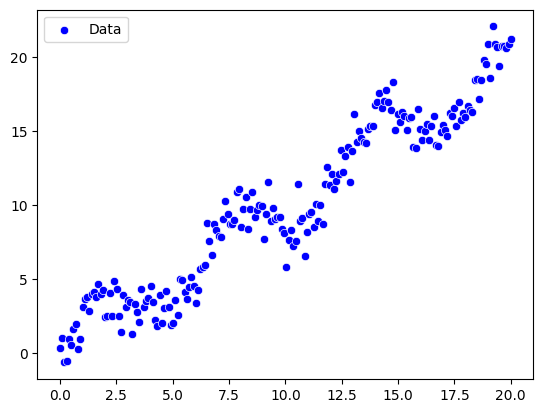

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([0.2942]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.9917]])]

In [21]:
class SimpleNetwork(nn.Module):
    def __init__(self, input_size=1, out_size=1):
        super().__init__()
        self.l1 = nn.Linear(input_size, 256)
        self.l2 = nn.Linear(256, 256)
        self.l3 = nn.Linear(256, out_size)
        self.act = nn.Tanh()

    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        x = self.act(x)
        x = self.l3(x)
        return x

In [22]:
# construct the model using Linear block
model_2 = SimpleNetwork()


In [23]:
loss_fn = nn.MSELoss()

In [24]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [25]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [27]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=200
                )


Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

18.04739761352539
247.82329177856445
299.9803581237793
308.81807804107666
492.40960025787354
505.98720836639404
552.1332769393921
553.1689741611481
553.2235409580171
626.2741925083101
663.0815655551851
669.2867662273347
694.2228910289705
739.1978589855134
753.914024528116
757.2729107700288
765.7303568683565
779.7895542941988
781.7125325761735
781.7624474316835
831.3974686414003
831.4920723363757
899.9178535863757
902.2633511945605
908.5512311384082
1004.038001768291
1032.2464940473437
1034.3850450441241
1034.7728225812316
1036.4334580525756
1055.5277402028441
1055.9875748381019
1056.4091474935412
1095.8446943685412
1099.2223908826709
1106.9900653287768
1213.2749469205737
1246.91070818156
1266.6524474546313
1280.5027062818408
1358.9717996045947
1367.6393697187304
1390.1916062757373
1431.2996232435107
1432.4134503528476
1440.4361783191562
1446.5303445979953
1469.676586739719
1471.5503598377109
1496.2805672809482
1513.8951398059726
1522.9282704517245
1531.486178509891
1548.4590693637729
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

24.069955825805664
52.594255447387695
66.5100908279419
68.8736023902893
77.87229204177856
89.89082670211792
100.5608983039856
122.85829973220825
122.86256431881338
140.68739914242178
152.57591175381094
159.30810188595206
164.59100364986807
177.6785128051415
226.4501879150048
232.669574492611
233.14629792515188
233.9159503513947
234.56530618015677
236.80354999843985
237.1400096649304
237.36962436977774
238.01135104242712
239.67727952543646
240.56033783499151
240.90493359509856
242.147041820921
243.78858234826475
245.88243415299803
246.80239435378462
247.00697661284357
263.41878844145685
266.42278958205134
266.4283378729597
295.38374596927315
304.574784100987
322.9453056463972
340.48942452762276
342.34944528434426
343.5008150944486
343.53596034739166
346.2136100837961
347.49264827463776
349.5975212166086
351.22947064135224
355.8199910232797
381.25009241793305
381.8618865320459
385.0794351408258
402.1405351469293
403.32705596182495
434.47776129934937
435.34341016504914
442.1982781002298
4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.874230861663818
9.47873854637146
11.97428846359253
23.018258571624756
35.07746076583862
35.34002152085304
60.184729009866714
60.5661204457283
60.625571984797716
68.20187832787633
74.31103159859776
83.40685679391026
100.74287440255284
107.98812081292272
109.53248717263341
114.27068688347936
122.50950791314244
137.10305668786168
163.14308812096715
170.63102843239903
177.38227536156774
177.9548544473946
178.04403368011117
182.40349594131112
211.01597038283944
253.4312688447535
256.8753763772547
277.84008852019906
285.760887298733
286.27450868859887
286.53991482034326
286.60962388291955
300.23378083482385
301.7133829332888
317.95860121026635
319.313765976578
320.8659310080111
321.25522557273507
323.3255352117121
327.01338044181466
327.32310647144914
331.8306490816176
336.473279658705
355.8812519945204
389.3140293993056
394.5300685800612
398.9504100717604
400.40658873692155
403.0907029546797
403.5064604021609
408.0995208956301
411.3007228113711
411.8847524859011
411.98418160155416
419.895

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.984773635864258
15.734833121299744
19.663665175437927
20.39676320552826
21.9003849029541
22.42560124397278
24.876514673233032
25.273224234580994
25.744901448488235
29.319854766130447
33.01887086033821
34.09795501828194
55.27236297726631
55.80379542708397
57.700052708387375
59.403374761343
98.01999005675316
108.70515450835228
109.5366727411747
132.96713081002235
151.73541846871376
152.13884848356247
159.24399107694626
159.24467808217742
159.89394015283324
163.636089267442
164.22798764915206
165.15911400527693
166.59303915710188
183.777847888181
188.48312962264754
195.09699928970076
203.2580767890904
204.4646905681584
204.8517783305142
205.56564384908415
240.38579231710173
268.3559804579709
276.7624126097653
282.10375696630217
297.52699667424895
321.34788519353606
323.1406969449017
329.58599561662413
335.27170652360655
335.2763904866297
336.216967278393
336.5125056442339
337.82085561123677
337.93492838856764
339.11477074143477
339.4067967545707
340.07259750482626
367.31533622858115
36

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1968255341053009
5.641626864671707
5.657615819945931
6.064306417480111
16.08035675622523
37.60087982751429
40.39796749688685
42.226690927520394
42.57598836161196
50.29060132242739
51.816049287095666
52.726542422547936
53.27212698198855
58.238672563806176
65.9170706961304
66.00137711502612
73.45026589371264
73.45033492340008
94.40453376068035
96.67312850250164
98.33095766796032
104.27997710002819
104.66716410411755
111.81535841716686
123.95324541820446
124.89241804374615
134.0538321901695
141.88520540489117
147.3699885774986
147.51607799722115
148.84383893205086
148.84394280723063
151.27694909385173
159.80332772544352
160.20157002023188
162.3790452342364
175.73120282700984
175.77179616427748
176.21898293233244
179.84415268636076
184.48799967503874
190.91918587422697
191.8823870990309
191.98397127276985
193.5015100587043
194.455280278984
195.35003409272758
195.67791727668373
226.8140828955802
227.23137784487335
248.391328101221
248.69243366009323
249.06203133350937
249.2472477007541
25

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

26.03041648864746
31.683507919311523
32.69607603549957
36.94700109958649
40.09063923358917
43.24299657344818
49.66943347454071
51.55354821681976
61.745890974998474
64.17060673236847
64.20250821113586
82.2081310749054
88.3284285068512
89.79446983337402
94.14298343658447
125.26073932647705
126.49875032901764
135.59747850894928
137.60209000110626
138.6391007900238
138.69329085946083
138.79828810691833
158.1350953578949
190.29573225975037
190.54347051680088
191.07147754728794
219.84146083891392
222.4414423853159
223.75273706018925
224.0277365297079
224.1074325069785
234.80844511836767
236.11887671798468
239.80948235839605
245.16320302337408
245.19034624658525
250.53963041864336
250.57613327540457
285.1537204030901
290.63143351115286
290.63247667765245
317.1541861197911
317.9157160422765
332.01802717661485
333.5926467082463
359.80708419298753
372.9234315059148
378.2448846003972
390.73867427324876
392.14449190115556
392.61615078663453
395.3946925899945
399.3664089939557
409.1687018177472
409

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.995691776275635
7.2455258667469025
16.092246562242508
16.79629197716713
45.66570916771889
49.49132552742958
51.546874672174454
51.55890817940235
55.94136734306812
56.87362690269947
60.17960686981678
61.0298982411623
61.50973106920719
62.76251210272312
67.19041623175144
84.42356099188328
107.11767567694187
109.83093608915806
112.33858932554722
117.73715604841709
118.46054519712925
126.13926042616367
129.35352124273777
132.09750045835972
144.2829243093729
145.60121811926365
155.06776036322117
156.4247175604105
157.06460209190845
173.14995212852955
173.22624004632235
175.35676825791597
177.14423692971468
223.072966940701
249.86758745461702
259.1548942402005
259.4774563089013
262.1139514222741
273.53204510360956
284.79359982162714
286.709939815104
297.5009668841958
303.67043290287256
303.6865736171603
303.69104721955955
325.1735053341836
338.9760499279946
339.13295423798263
374.0235143881291
405.8258463125676
426.54995405487716
434.21259987168014
438.16527068428695
438.4341948609799
445.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7210333347320557
1.1195151805877686
3.8553993701934814
4.935167193412781
9.26803195476532
11.32530152797699
11.340326110832393
12.85644547175616
21.44247070979327
38.3046666784212
38.848300377838314
39.05325117241591
39.082158331759274
39.126318850554526
57.41017619613558
60.846815266646445
61.86663357261568
63.11768595222384
63.59767205361277
65.77494985703379
66.66899473313242
77.67916185501963
80.70370847824961
87.24939329270273
88.93263632897288
120.03975302819163
129.6166783059016
136.92875058297068
137.6020143115893
137.7234022701159
164.52768350485712
169.0106237018481
170.15786255244166
175.13350666407496
175.31731895450503
175.976961591281
176.04837131593376
184.2005538949743
184.68058592174202
195.24150568339974
195.9625949272886
208.6760329613462
208.67916630767286
223.85020970366895
225.52649210952222
247.13880824111402
268.43363284133375
277.7630681898445
277.85799716971815
284.94434856437147
300.6911880876869
311.1533691789955
312.9655632879585
356.7111687567085
365.796

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1400359869003296
1.2376874685287476
2.3348690271377563
7.303871750831604
22.42604124546051
30.76779329776764
31.633403539657593
31.92944684624672
40.98399129509926
40.99227309040725
41.191373182460666
41.19557928107679
41.780909886583686
52.49736916087568
54.64327894710004
56.24518703483045
65.49940513633192
67.02401279471815
73.44159959815443
80.91668008826673
80.91736425930867
82.14784445340047
91.86167349392781
93.4115866618813
93.49612529302249
93.86035813117633
112.72215164924273
114.79144181037555
124.10704220557818
128.76743258262286
134.61459578300128
134.61512070021126
134.80620247742627
139.18722063919995
143.97345978638623
154.056686943979
157.97711617371533
159.77646285912488
174.7518933477113
175.90675324818585
175.9102031480288
175.92286094313022
176.38151934032794
176.98952027445193
178.4164871800458
178.43698656966444
179.36769634892698
199.98283726384398
213.99097305943724
217.11595613171812
219.40022331883665
237.141977850697
238.2788391750073
238.39635405351873
241

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.804136037826538
3.908029280602932
4.095832742750645
4.570930995047092
4.80066155642271
5.814722053706646
13.029915325343609
13.544529251754284
13.562227549031377
17.4575491566211
22.042131485417485
22.406429352238774
24.616361202672124
26.17560368962586
27.16230440326035
27.18430356681347
34.95850305259228
36.181361362338066
38.5163606852293
42.94884340465069
43.26389925181866
43.57765246927738
44.264434173703194
44.88861699402332
46.382910683751106
46.59234040975571
48.06603628396988
49.47318118810654
49.53958201408386
52.46373176574707
61.434099197387695
69.4207968711853
71.78525567054749
73.58720016479492
79.358473777771
79.68605560064316
80.73295098543167
82.9266408085823
85.02743965387344
85.10769887268543
87.5979530364275
96.49887581169605
101.15225525200367
110.67071075737476
125.01187534630299
125.02278360258788
126.88738616835326
129.66306408774108
130.3595113409683
130.50448612403125
132.81590084265918
134.36666301917285
135.7865522308275
137.39287618827075
144.821279088966

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6626171469688416
2.231629192829132
9.785000145435333
16.746210396289825
22.416827023029327
22.452241595834494
26.259670671075583
26.309655010700226
61.67600327730179
63.8312845826149
70.7449899315834
71.56253278255463
73.08922243118286
73.97709208726883
75.32429295778275
77.62493950128555
77.82960976660252
85.05458058416843
87.97805441915989
103.98792113363743
125.55538405478
158.48364867269993
159.86960305273533
174.69928540289402
174.78830742835999
177.9701738357544
179.84633994102478
180.79705679416656
182.94403755664825
183.24791792035103
188.30642345547676
189.95970538258553
190.44547271728516
193.30617952346802
198.58143758773804
198.60933512821794
199.03462997451425
199.2881393171847
200.22998920455575
201.603083524853
202.13299939408898
202.56872257962823
206.02848801389337
224.29956040158868
226.1168971993029
233.6648331619799
234.06210950389504
235.7818605042994
235.90477702394128
235.9237501565367
237.52239608205855
237.70194653607905
251.9488108549267
268.5218680296093
26

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.5235013961792
11.025468111038208
11.02822063327767
11.028357025206788
14.029788013518555
18.89049625021289
20.11970245462726
27.366398926795227
27.390403449506266
33.638009726972086
40.15949934718083
43.76638382670353
43.89834080633591
44.318523243040545
54.558008983702166
64.6131866723008
66.18434126672219
70.88239128884743
71.46793968972634
77.13736899194191
83.9671061783738
86.65586979684304
86.82024547454785
87.38714358207653
87.89602175352047
90.1188863813586
98.57957211133908
99.63476827737759
99.98942032453488
137.8996833860583
153.44153156873654
154.29654303190182
159.70698395368527
159.8855955004401
166.24227303263615
169.04670065638493
172.62742727992008
173.8213351368613
189.1616604923911
189.95538479086827
193.3320384621329
194.45443016287754
194.8495167195506
194.85561561674695
198.23179268927197
198.97071278185467
200.2356984624348
204.52069592566113
209.49293446631054
214.2621147641621
214.33598328472
216.015933045157
220.81224823833327
222.45187092662673
223.79237771

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.009368272498250008
0.9626421649008989
2.1938163954764605
2.888656945899129
8.355575891211629
24.614034982398152
42.798817010596395
43.520661206915975
43.92601126618683
45.15033799596131
45.34795975871384
46.073176922276616
47.74847227521241
47.78284508548677
62.484241073951125
63.233393197879195
63.91630143485963
64.60349023900926
74.26015317998827
78.99170005880296
80.31389427743852
82.69692564569414
84.49762988649309
91.1544330175966
91.60398892126977
91.91693923436105
91.92665732186288
96.82387984078377
96.87414259742945
97.04263057839125
101.93900909554213
102.26375656854361
102.3808830557391
103.61970491986722
121.32138414960355
121.32146326921065
125.00056116006454
131.5755333127745
141.84681169412215
162.18392984292586
175.7568191709288
181.75756112954696
181.87973650268395
185.1072898702987
188.77788313201745
188.80098407252808
217.39359729274292
217.39364581284462
220.30445223030983
228.11079578576027
229.4566526907438
231.05177228627144
240.0270587700361
266.73136251149117


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19321881234645844
0.33771349489688873
13.597565904259682
13.719597980380058
16.73295323550701
17.061275079846382
24.749512270092964
27.171662643551826
27.956240490078926
34.16350348293781
49.310077503323555
50.32968969643116
52.40819402039051
52.40965824807063
58.01408129418269
59.5108217545785
64.20334284985438
75.37902014935389
83.19292205059901
83.68940922105685
83.71640401380137
83.83032288448885
110.39820923702791
114.51782288448885
116.01543154614046
145.04674067394808
147.62653412716463
166.61092057125643
167.2485016216524
168.71641918318346
174.37660308973864
179.81166406767443
179.8249477543868
181.27107636118308
181.88685051584616
193.2911616959609
208.13630501413718
209.50216857576743
211.05952541017905
219.2736796536483
246.1006888546981
253.12955705309287
255.59254900598899
256.63737670565024
256.7638432481326
263.5750190713443
264.21103848004714
265.01433462882414
267.32375759864226
269.40888614440337
269.4104219486471
269.7894781937357
272.1321078648325
290.66851915023

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

16.358638763427734
20.97575855255127
21.00633390620351
21.212119687348604
35.75153409317136
35.94458483532071
37.09269367530942
38.25366984680295
41.065656054764986
41.36836927011609
43.66655819490552
49.54505102708936
49.58956899493933
53.13624443858862
54.12975760549307
56.38719245046377
63.02105351537466
65.5117609128356
73.63223572820425
83.21879597753286
88.06210251897573
91.37379332631826
92.8938819989562
97.09999629110098
97.67068805545568
102.94129600375891
103.14570014923811
103.92227106541395
104.98780208081007
106.0706440731883
106.54360231012106
107.76142903417349
107.80695796385407
109.41688585653901
109.85741216316819
116.46889526024461
119.08413511887193
123.69113737717271
124.94387573376298
127.14479655399919
128.04176545515656
128.14460242912173
128.3868565969169
128.86346546933055
128.87971990928054
133.55663126334548
134.19104992970824
134.2726187594235
135.3861087448895
157.18670879676938
157.5522902496159
158.08889620378613
167.75920908525586
177.50051252916455
177

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

27.990755081176758
33.43892812728882
35.117260217666626
36.01523423194885
36.24216042459011
37.54727850854397
41.368594750761986
53.873342141509056
53.879833701997995
61.040557865053415
77.04409027472138
80.33576989546418
83.65584159269929
83.74349401518703
86.49648998305202
86.49790322617628
86.73676252202131
98.6526036246214
98.946641711751
106.99118974641897
107.40861898497678
124.5571213348303
131.72907358244993
136.49914222792722
138.04748612479307
144.73857432440855
148.51610308722593
151.01192432479002
151.12763372645713
156.4502398131881
157.49583784327842
158.21606973395683
159.07408384070732
172.81809476600029
173.35364845977165
173.91707006678917
176.05767432437278
179.45721856341697
183.9476603625808
212.70729056582786
214.6545133946929
215.03194615826942
245.2606754063163
251.24633882031776
253.72881553159095
253.74000728712417
262.1867054759059
262.2147861777339
266.3602620421443
267.921403294662
270.52918398962356
273.12826765165664
289.10894048796035
315.16004026518203


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.236214637756348
8.585737556219101
11.166909784078598
12.013237565755844
17.246925443410873
20.250443786382675
20.88506904244423
32.290417820215225
33.04749956727028
33.310143887996674
35.54420202970505
35.98007881641388
43.98406708240509
49.802085518836975
51.12472939491272
64.41943573951721
64.49933538585901
66.26754019409418
69.83077905327082
74.50727746635675
82.9111118093133
85.91559360176325
88.78953263908625
99.26068589836359
101.73523614555597
103.13862595707178
103.13866705399414
111.81142038803955
111.82279275309702
117.2608268107142
121.69728778254648
125.3688568915095
126.94922231089731
127.28046922337671
127.28171795861272
133.9491254712775
134.7152975823119
137.99417197958974
145.43880307929066
147.07948839919118
147.22251123444585
147.51736253754643
152.42950481431035
152.5148037995532
152.69843009368924
156.56416490928677
160.67446163551358
161.37532064573315
174.98626634733228
177.77938220159558
179.63536021368054
180.14592966691998
180.97853437320737
183.293599995537

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.297946572303772
3.0932198762893677
4.1944228410720825
5.286943316459656
6.4745707511901855
6.558360159397125
8.051719009876251
17.471400558948517
38.564688980579376
43.50535184144974
43.689319118857384
45.29310582578182
46.93426261842251
47.995718106627464
48.3047298938036
53.866829350590706
56.54549498856068
76.97807593643665
77.0361062400043
84.98776782676578
91.29033483192325
93.35091127082705
93.3550909627229
111.4898336995393
126.37455545552075
142.46487032063305
143.0277823675424
149.94664471037686
149.95595814101398
160.42622257582843
163.47867394797504
163.48571867588907
163.7852362478152
164.27027253154665
167.8492012405768
176.8630886459723
178.14011172298342
180.844519414939
180.90076415333897
183.97880832944065
184.2511007944122
204.4807036081329
212.9771168390289
214.39984323177487
215.709936873056
218.7106325784698
225.56447197590023
225.72467467281967
225.93586123082787
229.5551429996267
233.04064190480858
262.50007259938866
263.40010058972985
270.00813186261803
274.09

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

15.267928123474121
15.778041779994965
17.812765300273895
26.1546670794487
26.87631517648697
27.595669150352478
29.78140962123871
35.86973178386688
36.99607336521149
37.50202363729477
42.06555932760239
44.73179477453232
46.67261677980423
46.68178426660597
46.68303806206677
46.707430968643166
56.52873433625791
72.44945634400938
82.1258374551544
83.8653336862335
84.3649908999214
87.30492944514845
87.3459918597946
88.08040792739484
90.11804230010603
94.64274675643537
96.89816243445966
116.59209019935224
116.83392609155271
116.84643859940115
117.77278537827078
121.18439908104483
133.92876191216055
134.98949439602438
151.0432816274697
171.80628211575095
173.96279866772238
178.28775031643454
178.47516982036177
179.08611307817046
179.58115251141135
181.06558425503317
181.09515642153565
181.14887576329056
190.17881541477982
198.9639583133394
208.70028548466507
220.27027182804886
220.73991688119713
220.83063252049033
222.42438657360617
223.03485323267523
228.60272337275092
228.60417303978465
237

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0003239187062717974
0.06918000901350752
1.909827706462238
3.4006319018662907
3.707011249905918
4.047817346698139
5.044847902900074
13.01440280402312
29.58119433844695
36.507212576514576
41.885715422278736
49.89897721732268
60.30826085532317
64.3068687292398
65.3771401020349
74.0522642704309
74.05232100325884
74.23489119249643
74.83511801201166
75.2825930877334
76.22687126833262
84.16662384706797
86.55805374819101
92.13159586626352
105.80304743486704
107.70851124960245
118.97080506521525
129.66102589803995
134.55292739111246
134.61912891405882
137.446633548916
137.62626342612566
147.55461387473406
148.10310731965365
154.01737485963167
154.1025499417192
155.81406536835493
155.91107716548504
157.84809925544323
176.81752636420788
186.93761303412975
187.21968837964596
187.81972607362331
203.26389416444363
237.54204281556667
237.56155875462355
240.19961455601515
255.1213589026338
256.4959997250444
261.6670679165727
266.638600738228
267.284866304577
267.35237520325245
268.2267712889916
273.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.649214267730713
16.232428073883057
17.53697156906128
22.720152378082275
28.986198902130127
29.06874518841505
29.822299234569073
29.930367417633533
56.45003408938646
57.385604567825794
60.95836562663317
73.1184884980321
75.5856069996953
80.70571560412645
85.69639153033495
87.10439009219408
93.2821778729558
93.29462603107095
93.51222518458962
93.785231474787
100.95603931322694
102.00252485647798
104.81710625067353
111.10059166327119
132.08991241827607
134.13228559866548
154.12667417898774
156.8137285746634
174.28204942122102
175.6141777075827
175.72292460128665
198.5881914012134
198.7558505050838
207.9849822036922
214.50353832170367
215.2568961493671
217.2760599963367
223.38834894821048
223.84284193441272
223.846652810229
224.45378697360866
224.80703533138148
239.55206478084438
240.38347125495784
241.1041783138644
245.08231199230067
246.52778697456233
247.6452519937884
253.58354354347102
256.4940261885058
256.9431870325934
257.2227136238944
259.351168070687
265.2815469845664
267.096529

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.789569079875946
2.3887407183647156
5.773779809474945
8.198157727718353
8.74983698129654
8.784727659076452
8.863969292491674
10.141940917819738
22.902164306491613
23.243474181741476
52.454186614602804
77.87235182151198
79.79744666442275
79.79886290279683
80.56143680063542
80.56145048194776
101.55438947730909
107.10896778159986
107.14850328543434
115.00134323218117
115.76780210116158
115.88534133562098
118.99315898546229
125.53559892305384
129.83455674776087
129.87985440024386
133.33392091521273
133.34497292206834
137.11473114655564
146.05273659394334
148.2057686583812
156.3899784819896
158.10794158146928
160.8125061528499
162.306086494189
162.81706626580308
170.39803559945176
173.7531057135875
173.95793780551503
175.91580375896046
177.71852478252003
178.49863597617696
184.84788486228535
185.871928660732
207.218327967983
212.2640447305257
219.04466244445393
220.0138800428922
220.0201511393043
222.43193793396676
225.3650941858741
228.88364601235116
245.79902267555917
246.57359075646127


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

24.416467666625977
33.57475662231445
35.522027015686035
35.57580406218767
35.61476709321141
35.8429129011929
37.724979508668184
46.45947276428342
47.34356151893735
53.76800190284848
68.38331638649106
73.04576860740781
73.99611543491483
82.21026395633817
84.6979138739407
93.39345430210233
93.51391220465302
96.19138861075044
101.52125788107514
103.0553684271872
103.45643708482385
105.31771907582879
108.27957877889276
115.46260413900018
118.78203806653619
120.51843390241265
129.55040297284722
130.79102179780602
132.7973971106112
132.97263990715146
133.00829474627972
138.79787938296795
139.51915042102337
146.29291121661663
149.53795735538006
149.53837394542643
165.24020767040201
169.09676289386698
170.9042496664042
172.7615426761622
175.72390782661387
177.22690629787394
192.23617982692667
195.06007599658915
198.11066317386576
208.75769877262064
210.20947766132304
210.21004337028717
212.69803613380645
215.7368699903891
215.7399665939447
216.09878014799324
216.11204636402545
236.494889381603

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2971685528755188
1.2234758734703064
3.344659984111786
4.581291973590851
4.931910693645477
5.289405822753906
5.370092116296291
5.674941472709179
8.5141107365489
17.74225728958845
19.03647881001234
26.196638874709606
26.31994690001011
26.829601421952248
27.938963785767555
28.953911796212196
43.310848250985146
47.45166875422001
56.47419072687626
74.09468747675419
74.54035644233227
78.20754699409008
79.4466151446104
95.8688906878233
96.14508773386478
101.47207309305668
103.42775656282902
103.50280965864658
104.10839326679707
123.56753404438496
125.46244676411152
125.49174829944968
129.6177405975759
133.15281530842185
135.95804163441062
136.84595039114356
150.82079723104835
151.64225485548377
154.2372834943235
167.68848684057593
174.4168865941465
195.37946822866797
195.8686258457601
197.78106006607413
198.02240047976375
199.44064519926906
207.40358398482203
212.49371622130275
216.20997713133693
216.3710758201778
216.50131563469768
221.09860376641154
223.2273323945701
229.16635827347636
23

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.09326457977295
24.485328674316406
26.95294976234436
31.14543890953064
31.266854777932167
36.654232516884804
36.654232970209705
37.54469256732045
37.71515848371564
40.736506721706974
47.560064575405704
56.78325774404584
57.218072375984775
57.29238115135013
70.81687627616702
76.4849046308118
77.32442961517154
85.21213017288028
85.55692078057109
89.51046372834026
92.31880570832072
100.59446050110637
103.37157489243327
103.63019184652148
103.99978659931003
106.09478686633884
106.63006703439532
112.87517325464069
112.9972439843732
114.10131083312808
117.59657703224002
119.52987919631778
119.58262238162933
119.62600555899917
120.29360505822478
120.40472295019208
126.23965670797406
127.96173097822248
128.07220573607265
142.41574688139735
144.0038320559579
145.81512184325038
146.03556603077232
146.6992871749717
148.08327412489234
164.02399563673316
168.44834446790992
168.85372853163062
169.46074491623222
177.6818590748626
180.20964938286124
180.25300991791664
181.2971700455564
181.319424413

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3335001468658447
7.723656892776489
9.232711911201477
9.294443719089031
9.94157438725233
18.83015852421522
23.235142521560192
26.2050104662776
27.2977781817317
34.19318061321974
36.99546866863966
38.9730506464839
39.25636854022741
40.91697635501623
45.79169072955847
46.63037707656622
55.55173995345831
77.6646836027503
109.12818839401007
111.54139568656683
111.84977152198553
114.34743573516607
114.57185774296522
121.87603598088026
122.69449787586927
125.59554200619459
130.7669091746211
134.4860404059291
137.00373726338148
139.46291404217482
143.82390170544386
144.65745174139738
145.03667300194502
145.0707673728466
145.77612254023552
147.08499881625175
171.07909938693047
179.11253997683525
182.62893435359
183.3255097568035
183.3863905519247
183.50422963500023
186.26069030165672
189.63176307082176
190.0460243821144
190.2803732007742
191.1180685609579
196.75478921830654
221.1807955354452
221.43664388358593
223.52603249251842
231.40078310668468
238.90499548614025
239.78428845107555
239.804

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0428284406661987
9.303102374076843
26.36482036113739
26.547255292534828
27.63468898832798
30.245418205857277
56.53690494596958
65.26432766020298
65.33738712221384
69.21307829767466
89.23230627924204
89.61567799001932
112.21691624075174
117.67978207021952
119.56625512987375
121.47436860948801
130.43019155412912
130.99940989166498
138.61663744598627
142.32572624832392
142.37366902083158
158.67383038252592
158.69957972504199
159.67291606403887
166.69707215763628
170.62106264568865
174.01227367855608
181.88375700451434
193.09379042126238
206.31665266491473
206.37478478439152
207.63546653278172
210.87059565074742
220.25989027507603
229.22342081554234
230.94058402068913
230.96396432071924
236.5964201465249
237.02340460568666
248.49811030179262
270.7384305074811
319.9146657064557
336.5550580099225
336.8274365738034
336.8274368947059
338.215214580825
342.11230835371316
346.42257151060403
346.94392040424646
349.5718963449508
351.5588234966308
351.56475332618356
360.0837648236811
365.594287666

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3008747100830078
7.3824143409729
15.723886966705322
25.805424213409424
40.51513624191284
40.52605804800987
45.35999998450279
45.39045971632004
45.58219404518604
45.81945639848709
50.37965661287308
58.52353364229202
62.8634107708931
72.05633145570755
72.52941021323204
75.56250438094139
76.40371838212013
76.40392320946557
89.24850862816675
89.40062748984201
89.86668747261865
94.08323305443628
97.28556793526514
101.54740875557764
104.63110726670129
104.64969213091535
107.0069971808116
107.38295669638319
109.2260415085475
110.99178440653486
113.19500572764082
115.64255817019148
116.34799499594374
118.87087578856153
123.68413634382887
127.6315681465785
141.57599945151014
141.9068622716586
143.28748990379972
144.7095031865756
153.91339398705168
156.78874780022306
159.58471752487822
169.43657757126493
171.72982026421232
203.0144920476596
203.02433046669466
209.46107658714755
209.48933720373316
213.92842983984156
218.6158072926919
218.62044645816786
219.27606983453734
219.9917127636145
227.8

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.226504802703857
7.780068635940552
41.898579835891724
43.88098335266113
43.90805121138692
44.16024713590741
44.95163666084409
45.15426868572831
47.48099798336625
48.75778264179826
54.5469610132277
54.55626140255481
56.73699961323291
57.038365823216736
57.08133286330849
58.13355296943337
59.38018733356148
74.44931918475777
88.16186076495796
88.80313772056252
97.00230401847512
107.71470064017922
109.07897585723549
109.86079579684883
122.86432343814522
142.35888940189034
145.00145489070565
145.04572028387338
145.45886719692498
147.90413129795343
174.82900274265558
183.578096752055
200.81524885166436
209.61329114902765
213.35697520244867
221.4537092493847
227.138901357539
227.26085415948182
233.7995380507782
237.97898665536195
239.37980857957155
240.10395125020295
240.13408331293613
240.15327407699078
244.17277004104108
244.19402173627168
250.64520982373506
254.6383118974045
256.13688472379
256.1368859224167
259.77482466028596
260.65204374121095
260.745533149704
264.97032324598695
265.050

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4159493148326874
3.5962593257427216
3.6200230214744806
9.506096610799432
9.514329010620713
13.695152813568711
26.133694225922227
29.777397925034165
29.82724973373115
29.86776207573712
32.68436144478619
38.35420178063214
38.3544107851194
45.67401518193947
47.649662393014296
48.47363116113411
48.60313102869259
50.467243286650046
50.68851012257801
55.99553507832752
56.98116374282108
56.99015146015154
59.270754868965014
60.840724523048266
61.806651289443835
62.52501880643831
62.89478939292894
64.18883627174364
67.1584240746306
68.28213816402422
76.43485956905351
76.59189007697569
77.93459759173857
98.08165417132841
114.70538769183622
131.36799297748075
140.26240692553984
153.22529373584257
162.5780082744168
175.5998359721707
177.7513514560269
178.72218600926863
179.20163245020376
184.76948876200186
184.7695263152782
184.77616282355302
188.8792702759456
188.95835708629602
189.54400985490793
189.54699713632726
192.5814650718894
194.2242246334281
195.0915037457671
198.8055514161315
205.7368

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.38901948928833
11.125068187713623
11.473039537668228
13.177713543176651
15.447589784860611
15.724209010601044
15.854928508400917
16.03686586022377
23.224922329187393
23.345061533153057
23.761314742267132
25.155929319560528
36.19194006174803
38.093122594058514
43.26214372366667
48.74301206320524
50.13712190836668
50.25408510118723
54.83149007707834
55.68283883482218
60.0650304928422
71.15146581083536
80.03200475126505
83.58009830862284
85.22607473284006
85.82652620226145
85.93349053710699
94.24286725372076
98.12382843345404
102.80299093574286
110.62996628135443
116.47411348670721
120.46016003936529
123.15869691222906
124.53749646991491
126.06777753680944
131.60805024951696
137.90227737277746
137.98228164762259
138.63477405160666
138.63478016201407
139.1379902297631
141.66861748043448
145.756196253933
146.48362212721258
147.59535222593695
161.1436720425263
161.14854919537902
163.17635452374816
168.70130407437682
169.24969303235412
170.43154787644744
175.42591452226043
182.0331022702157

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.342504501342773
21.592355266213417
21.615891344845295
25.247430212795734
34.50130022317171
36.58237303048372
46.04411829262972
49.61466611176729
55.35061562806368
55.41204734891653
61.533086739480495
62.6802464351058
64.79448302835226
68.6908779963851
77.05868919938803
77.0789628252387
80.06475117057562
80.08315659873188
81.34611798636615
82.11561311595142
84.12290967814624
84.32862970046699
87.31539389304817
87.42268831841648
95.82347185723484
112.21758539788425
115.50586755387485
116.82249481789768
124.66651804558933
124.72789919190109
124.84869709424675
126.61729243211448
129.05173876695335
130.98165777139366
134.50327923707664
137.97613408975303
139.55156448297203
140.0959481280297
141.4390443842858
146.83580055646598
146.88724440522492
150.7257685083896
173.60798400826752
186.99853652901947
195.55597061105072
199.91873735375702
201.76450711674988
202.17930829711258
202.18088973255362
203.36994660587516
209.24206031055655
211.97064889164176
228.81736481876578
234.0539676019689
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.233505725860596
4.305966325104237
24.3172063305974
25.76056546717882
25.760565611427467
30.683476301735084
31.135406347816627
32.430463882988136
41.53598794609849
43.46068582207505
52.66111383110825
60.22555217415635
64.09475001961533
67.05212125450913
76.77197560936753
77.1436221626455
81.78498721391503
104.31571650773827
108.48167538911645
108.70794809133355
129.1390680101568
137.4398149278814
139.45662153035943
140.00619262725655
141.3784825232679
145.99840611488167
156.88131493598763
157.34761452943627
161.9071843650991
162.07296657831017
165.25993657380883
167.47392130166833
170.47963881761376
170.49566596270148
171.99181144953315
174.14664357424323
175.40345197439734
180.0854421210343
181.37231283903662
185.0745871615464
188.81524759054724
197.1015701842362
201.60519557715003
207.31619888067786
224.99587302923743
232.53148895025794
232.65670172393862
233.05852208555285
233.27319348872248
238.00665725291316
247.4379860264117
262.88998759806697
263.81893921912257
266.537113915091

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5924131870269775
8.675102472305298
10.368549466133118
10.884552121162415
12.940905451774597
12.980209577828646
14.232757914811373
21.717115748673677
22.00390310958028
22.026892067864537
29.049091698601842
29.060756067745388
43.59482894372195
49.44571242760867
49.44755482976325
50.03297514026053
50.26925880019553
52.780740323709324
59.06347996299155
60.61107164924033
60.98957720701583
64.58189812605269
75.80226937239058
77.90472594206221
77.95637331833132
79.536415084498
79.98050145735033
107.22408513654955
111.47753982176073
122.64042358030565
127.39378528227098
130.59699754347093
133.45352010359056
164.7443812333513
171.28904609312303
182.90677337278612
183.11339235235937
184.51178634096868
186.8597151034046
186.97341776569374
192.48488522251137
192.99993473966606
193.6653767891694
203.68740094383247
208.47218192298897
210.66944277961738
210.689756346168
210.71677997638471
229.54390552570112
229.94014143873937
230.44677942921408
232.52720349957235
233.14785462548025
235.090065895812

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.12982919812202454
0.2574780434370041
0.8788401335477829
4.290344640612602
12.65544168651104
29.431026861071587
29.46063118055463
29.47576185874641
36.8663572948426
39.039820400997996
41.96352264098823
42.04448520950973
45.6325849276036
47.19078326039016
47.89963006787002
50.97327852062881
52.10446679405868
60.17634713463485
73.11588227562606
75.53141748718917
86.00579321198165
87.10882842354476
87.12232293467969
87.14320070948452
87.81668688263744
101.73999334778637
115.63983084168285
117.73532821144909
121.45225287880749
133.31455947365612
144.7244467874989
144.76778533216566
156.0518982624635
169.3062222218141
171.5395441269502
183.3633213257417
184.897186181508
184.89759683655575
186.23616981552914
188.9145162110217
189.7627120022662
203.64866495179012
204.37795829819515
211.59937143372372
215.84160184906796
215.90827508317307
218.07683129655197
218.959218934644
220.43018956528977
253.07094807969406
255.15483804093674
263.76764912949875
265.97111173020676
266.21384868072346
269.46

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5099372863769531
1.317519724369049
1.9696651101112366
2.287459045648575
11.803672462701797
15.873799473047256
16.87011405825615
18.02758213877678
18.051873866468668
22.229063693434
27.647413913160563
32.66002816334367
34.62772769108415
39.390298549085855
45.09865349903703
48.7035612501204
48.900094110518694
61.83399685099721
67.48264702036977
67.5135777592659
69.88473707437515
69.90626017563045
74.36080185882747
77.88833515159786
79.72477499954402
80.59633491747081
99.43453644029796
101.48776195757091
101.62242337875068
102.22167715243995
104.11666604690254
106.02569386176765
106.06157081015408
106.8099084366113
110.40451078303158
110.42906720936298
110.45024528354406
110.8609059676528
111.07904753834009
122.25205168873072
127.29849276691675
154.87360224872828
172.55931697040796
180.07279620319605
182.04564950615168
194.23586843162775
194.55070511251688
194.96402490884066
195.43208707123995
201.18948996812105
212.30486548691988
212.61615721136332
214.5313778296113
214.74468340724707


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.4262070655822754
2.7369483411312103
11.161549896001816
28.996991485357285
33.978553146123886
34.292814046144485
35.182263761758804
35.26670162379742
37.31333677470684
37.35127114504576
53.918373577296734
56.55826710909605
59.01154302805662
63.42032312601805
66.72340797632933
66.94388150423765
67.61847084015608
71.27808397263288
71.75484823435545
75.44465517252684
75.56969522684813
75.62624344602227
77.58211431279778
86.85871705785394
90.93193635717034
91.02119955793023
92.29458472505212
93.65847060456872
97.95421788468957
98.30609137192369
98.92654264345765
100.08223903551698
102.81679189577699
105.264235381037
109.3110636509955
114.03874433413148
114.21054292097688
123.92841172590852
129.44907355681062
136.81347585096955
145.8390429057181
146.58214033022523
147.1168073453009
148.21256792917848
151.81861746683717
153.41689193621278
155.09982073679566
171.18910181894898
172.24132979288697
177.27331173792481
180.6920279301703
186.6826399601996
189.97686517611146
191.17318761721253
191.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0521321296691895
3.806565761566162
6.186838626861572
7.989382266998291
24.288897037506104
26.262385368347168
27.53143620491028
28.433287262916565
47.217121720314026
49.038716435432434
49.09428469836712
50.761712834239006
54.03825359046459
54.728767558932304
63.320460483431816
74.65791146457195
75.02594740688801
79.25218041241169
93.67301781475544
94.65869756042957
94.65870250646549
95.53985746089893
110.4236446160503
111.76534862701374
112.68351502601581
112.68887665054353
135.555474779816
141.01115562698396
141.8333986618236
142.01053569397482
142.0310698014364
142.94823126612755
149.86865620432945
172.74441723643395
176.04067139445397
178.93020705996605
181.922646091567
182.2036398213968
187.68336327491852
188.83920319496247
206.93756707130524
214.13910420356842
217.07738979278656
218.1840196412668
218.2050248657033
222.2666465316579
222.49506459875556
222.53712476535293
222.58120996250364
223.5658749987051
230.8175634790823
232.35144252075406
243.9082881857321
255.58421820892545
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9311977028846741
3.8478923439979553
5.021166026592255
5.906410992145538
6.962524235248566
8.110617697238922
8.42352107167244
11.36901119351387
11.37747804634273
32.28650896064937
37.17797605507076
37.60699696652591
37.62221222463995
37.780980431474745
41.05344852153212
41.985741638578475
56.90646173898131
64.76982119027525
64.81750184018165
73.92736893612891
75.31945234257728
85.57387262303382
85.64826135803014
90.84274273086339
92.56175975967199
92.58299004938453
93.14537990000099
102.78997981455177
102.99104730691761
103.01327109802514
104.18706131447107
110.39345932472497
123.77071190346032
123.98066829610616
129.25139736104757
134.84709142614156
137.81433366704732
144.53165077138692
156.8784925835207
167.27544235158712
168.9380459683016
169.4300698535517
172.02325289417058
172.6495094196871
178.68025254178792
181.5608725445345
190.34175251889974
191.62165044713765
201.9445989029482
202.5836893217638
202.6321288915351
217.58226793725044
224.80074184853584
224.86526012141258
225.19

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2236122339963913
0.6695346087217331
3.49129955470562
17.73308078944683
23.083776399493217
26.068101808428764
27.1925777643919
27.50529418885708
31.162426576018333
31.549892976880074
31.55712065845728
32.87743601948023
37.76172576099634
37.78578528016806
38.571622513234615
38.6461633592844
47.133121863007545
59.508310690522194
69.69953955709934
70.70324517786503
78.03766204416752
78.13574134558439
79.49325286597013
79.84984650462866
85.63323273509741
87.31722571700811
87.71596347540617
87.72350924322382
87.72622178448364
92.8803708399646
92.96321824891493
93.15510385436937
97.25346057815477
98.90361802978441
117.89199083251879
117.93619946343824
118.2548541794531
118.3998098145239
142.74791238410398
157.37114617927
167.2853183518164
167.7893202076666
172.2349455128424
172.5746568213217
197.76048979861662
245.96126113040373
248.16054377658293
248.18281650124118
259.66114425240085
288.4226455646567
290.26910209236667
290.8495347457938
294.46269225655124
298.92560338554904
302.9204432922

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1770325899124146
1.569819450378418
2.941932797431946
10.673677563667297
11.930416464805603
22.804316878318787
25.725326657295227
25.873490527272224
30.194210723042488
30.719913735985756
33.75848151743412
35.053157702088356
35.31236378848553
40.1434461325407
44.02594058215618
53.03091971576214
55.4234823435545
68.82349912822247
69.62302343547344
69.71803706139326
73.23796217888594
73.988525621593
74.33568566292524
74.77770071476698
75.48300939053297
78.91904931515455
78.94575625658035
80.47962230443954
99.31639903783798
99.34883907064795
99.55567831918597
102.81035537645221
104.63918585702777
108.7771853916347
109.04024923965335
109.3403665535152
111.52920646592975
111.57084989920259
131.57922315970063
131.84880799427629
134.13679546490312
141.553033772856
148.75491375103593
156.55772966518998
167.61627096310258
170.1436132825911
170.15598887298256
172.28469318244606
172.46106520388275
181.00060930941254
183.28954020235687
183.94455215428025
191.30402776692063
192.3557686517015
192.78

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.641623497009277
10.418233275413513
18.107941031455994
21.333513379096985
22.83854568004608
29.733312010765076
46.61963212490082
46.830197244882584
51.48952713608742
52.2452310025692
52.7441186606884
52.745669375755824
58.03932095656637
61.84828711638693
62.13072700391058
64.41711921582464
64.42344996437896
72.76799056038726
72.88610775128473
73.15624148503412
73.17235954955686
82.8740979071008
84.2515120144235
85.68711861327756
94.27563675597776
94.28144341532607
94.42026713315863
95.83619132463355
95.96186820988078
97.67096535686869
107.85911957744975
108.1026926470222
127.16963104729075
127.28877470467705
136.982607102138
137.1708472428145
138.5759390053572
138.87712044094224
138.91165194485802
176.45548281644005
180.30474576924462
208.08215436909813
209.22400209878106
210.31002411816735
212.7810836789431
219.32931098912377
220.10365871165413
226.44098428462166
226.78254351590294
229.11910376523156
231.04401466820855
231.63491818879265
236.34838483307976
239.44017741654534
239.6166

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0065146321430802345
9.583930098451674
16.347375475801528
32.048744761385024
34.70118721667677
38.43576892558485
41.53444942180067
41.99678628984839
44.91887038294226
52.62976496759802
53.79613190237433
61.587209516204894
61.729577594436705
63.108403974212706
63.244503372348845
67.00811278168112
68.93674218002707
71.66146313492209
73.27596437279135
73.27966548805125
74.18936212663539
74.46391831641085
75.44790922407992
75.59101340477355
75.90682983701117
76.35200617020018
76.62726238672622
77.6600092977751
78.99884823267348
85.03411701624282
88.20414260332473
90.51474550669082
91.06045690481551
98.55918422644027
116.16313663427718
134.01262012426741
154.18976322119124
154.20228789304383
156.40327737783082
161.62363670323975
166.9121088788379
166.9185427094344
167.33036660798825
170.52518319734372
171.213497456396
171.59143131622113
187.04011219390668
194.3062869871501
196.36408823379315
208.92586725600995
211.33578818687238
212.16981023200788
212.30146979936399
218.15218495973386
225.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.39536353945732117
2.613007992506027
3.09650194644928
4.84138822555542
9.684178352355957
16.31215524673462
19.57039475440979
22.864285945892334
24.869057416915894
25.33636826276779
26.090673327445984
39.459489703178406
40.690558075904846
43.522172808647156
43.966793179512024
44.449542075395584
55.43534091114998
72.62470439076424
73.31867948174477
74.45083871483803
77.82804980874062
79.485621124506
79.54291711747646
79.69049014151096
82.92859949171543
84.03771878778934
87.66394545137882
98.89710833132267
99.40687127411366
100.4018954783678
100.40585835138336
102.73241336503997
104.74221570650116
107.16050870576873
118.79127462068573
119.11107028881088
126.11465705791488
129.12590350070968
130.56199981132522
130.68265506485477
144.7197253392078
153.11418220261112
156.53097674110904
166.58307024696842
168.25254818657413
168.53259864309803
172.86056151846424
177.60869756201282
184.9253298328258
191.59587970236316
195.89962401846424
206.1698972270824
207.76436045626178
207.9826361075975
20

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.15146753191947937
29.858300417661667
44.829043596982956
46.63400289416313
64.98186704516411
69.32085201144218
69.75196054577827
75.57204940915108
75.73983818292618
96.98127990961075
97.25946420431137
101.33250087499619
101.9265204668045
102.07914412021637
102.2282378077507
106.02841657400131
106.03631954547018
116.82362442370504
121.87729530688375
126.13974647875875
130.9620960270986
131.36927088256925
132.70075090881437
132.7744606276974
132.8404077803716
133.77316509839147
139.6578711187467
141.56107663270086
148.99918698426336
172.60101651307195
175.77124451752752
176.2123375153169
176.32806476112455
177.55908020492643
177.99226384516805
184.0867572342977
184.40869348403066
186.1680994546041
187.08074008580297
190.25225030537695
192.69772779103369
200.857547394
206.75510131474584
207.70640688296407
209.2570953881368
209.43910037633032
210.69005250092596
210.77425594534725
211.4055276652798
214.30463750567287
215.28875185456127
217.41280366387218
220.19091631378978
229.191099419258

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1237585544586182
1.7056168913841248
2.8553776144981384
3.3167572021484375
6.738288402557373
7.831648945808411
9.503668665885925
10.660306334495544
15.534590125083923
15.639408834278584
29.4995811060071
31.226983316242695
31.236007099039853
31.781377558596432
32.12198743689805
32.59346163738519
34.05477285850793
38.91443825233728
44.01312876213342
44.154102300293744
55.904099439270794
58.261342977173626
58.36664513964206
59.57402579206973
59.739439320750535
60.63155372161418
66.93733270186931
69.1033085109666
69.47202078718692
69.89185403008014
70.61027978081256
72.11742458958179
78.68620882648975
79.71690796036273
79.72296967543662
88.87645401991904
96.58126416243613
96.60332079231739
96.95113630592823
104.58251495659351
109.86376304924488
111.43472404778004
142.66790123283863
143.4903656989336
143.60349410772324
145.2803402543068
156.07765489816666
181.45886904001236
181.80024993419647
181.816248357296
181.87081181257963
189.44477164000273
198.4965161010623
201.100057952106
206.9680

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.978753089904785
9.985812152735889
10.587015057913959
10.615119735710323
11.787381212227046
11.791351168882102
13.25565668893978
14.67952999426052
14.754022679757327
18.730684123467654
19.926770887803286
21.099145970772952
22.673350296448916
22.701832508202642
25.302395795937628
29.178346132393926
32.811795686837286
32.85522704711184
35.64556794753298
35.978104883339256
35.97819610586157
43.623707733058836
46.11580582609167
49.88175602903357
52.54241033544531
62.21790739049902
62.82994093646994
74.77784075489035
80.05715288867941
84.66178478946676
84.93061452260008
85.11539629747858
85.14243011822691
94.58483867993345
94.6085443412303
94.89921419968596
98.6026410376071
105.6340073858737
107.45122330536833
107.48219380801311
107.9937197965919
109.10472653334728
109.22467739408603
115.49290592496982
117.6087222797214
118.19277233903995
118.61988393490901
134.87393705075374
136.53180543606868
158.7954544228851
158.82216167537263
174.0284242638736
176.30167841998627
176.8006627568393
178.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18766027688980103
0.8376525640487671
2.303749680519104
5.3348811864852905
6.519296169281006
12.499012470245361
18.993401050567627
19.149786934256554
20.167457684874535
22.515284165740013
23.014958903193474
28.827007338404655
30.445876643061638
35.48263458907604
37.11347918212414
37.27941752970219
38.70125223696232
38.95505554974079
45.654005363583565
50.712785080075264
52.14652355015278
52.24580657482147
56.76731860637665
56.78294324874878
78.29001951217651
78.84514236450195
79.16153681278229
82.87593185901642
84.8019769191742
88.50506234169006
88.89169692993164
90.87618899345398
93.98371410369873
96.48959159851074
107.70665073394775
114.54086494445801
114.55447552911937
126.79798768274486
127.18995134346187
129.11374239437282
131.53246240131557
131.6151941474527
132.22259289585054
132.26755221746862
152.03941234014928
153.07664450071752
155.02754898928106
155.6379735674709
156.40081067942083
156.4860152658075
158.19706601463258
158.35560137592256
165.77415091358125
168.7012441810220

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

18.584020614624023
18.88810694217682
21.136682391166687
21.162581980228424
21.31961679458618
25.97244930267334
41.87032508850098
41.880569831468165
44.21070446167141
46.886835233308375
53.78676618728787
54.37004979047924
64.89963753614575
69.89039881620556
69.90411988273263
75.29700652137399
76.70902350917459
82.18241742625833
83.71990099921823
83.77111193537712
84.36051395535469
84.37981426529586
84.69639113359153
85.1179142575711
88.40615850500762
88.66850086860359
93.51208826713264
95.15526398830116
104.40203389339149
104.72500991635025
106.94855928234756
120.3709712009877
130.4284892063588
130.44386451505125
131.44020383618772
140.44229810498655
143.2297364976257
144.00180034898221
146.89264612458646
148.81001990102232
154.1697773244232
155.99620847962797
156.83069693110883
168.64731298945844
169.9790675546974
174.8341300394386
175.03071110509336
176.27325945161283
177.8384738471359
181.28681092523038
183.69799785874784
183.7059665862471
183.7069148949231
183.9262285909499
184.6878

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7788313627243042
1.253708928823471
1.2750307507812977
1.3804443515837193
8.739671532064676
10.873747888952494
12.655142966657877
12.720997121185064
12.76451587304473
17.473886009305716
17.72313078865409
19.863034572452307
26.651824798434973
28.672987785190344
28.90547027811408
32.490477945655584
33.94620778784156
34.15116938576102
34.63858636841178
47.39195665344596
48.66732498630881
49.63087722286582
59.27433940395713
60.05506857857108
60.09106828644872
63.42289354279637
66.44335581734776
70.97918393090367
71.74361653998494
72.269759375602
77.89519901946187
79.02730544283986
79.53877891972661
82.24339999631047
83.5106594748795
83.52416678424925
86.40563984867185
90.11342307087034
90.80096533056349
96.17893078085035
121.80640842672437
126.8318557953462
149.19101335760206
154.0972686028108
154.5460453843698
185.76598366256803
198.99137409683317
199.24439679738134
199.90398906823248
200.17259418126196
200.2453859364614
200.30108241643757
200.7567347129807
201.99468003120273
211.3822036

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.83819055557251
16.00279474258423
19.565295457839966
20.28176474571228
23.63080668449402
29.501816034317017
31.01842212677002
31.13610588014126
33.76214347779751
33.824506878852844
34.209196507930756
45.525886952877045
56.56927436590195
59.537873685359955
60.18121927976608
60.25237883627415
61.3996896892786
66.11329318583012
96.65906573832035
99.97547532618046
110.63060952723026
113.19768811762333
115.07883907854557
115.23330916464329
123.74241961538792
125.66745628416538
128.90095438063145
133.15412105619907
136.58699382841587
138.30758346617222
144.6763445287943
146.23383308947086
156.20306278765202
157.30234111845493
157.34812374785542
158.0005287118256
158.2928377278149
168.06550942733884
168.58921186998487
168.8382181711495
169.32876681163907
178.91226576641202
182.91944836452603
182.92209397209808
183.1224631066434
183.8590735788457
185.6658969516866
186.18908876134083
188.09150105668232
188.81986135197803
188.97060598386452
194.3624164010398
197.43275822652504
197.4327948815807

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

20.22049331665039
20.31965272128582
23.917380020022392
24.049242451786995
27.212508633732796
27.222722029313445
28.29789755307138
32.58974811993539
32.92113417945802
33.25535002909601
39.3859676476568
42.311653053388
49.67728224955499
50.61297265253961
60.62212792597711
66.31311551295221
67.4310685750097
68.32037643156946
74.10076764784753
79.62267354689538
83.31522968970239
96.81933525763452
102.92828253470361
110.31592158041894
117.88805464468896
117.89786602836102
123.40891720633954
130.65757014136761
131.32518603187054
141.32379271369427
142.64942373614758
142.70949682127684
149.8168209446594
152.57179364096373
154.58591398131102
154.75797593127936
156.08062862884253
177.68640064727515
182.52238487731665
182.52390636352357
182.6823321863776
182.6909603442764
184.77301066776272
185.87880199810024
191.78170364757534
208.3072201575851
212.5049559440231
213.39511990209576
215.12366413732525
215.24197232385632
215.3136855106568
216.7626373510575
217.2580982785439
219.9279758076882
219.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.12599606812000275
2.485064223408699
5.669137433171272
9.635410502552986
10.403616979718208
11.157286062836647
11.460191860795021
11.829110339283943
21.714188769459724
21.743790792301297
22.301233934238553
22.626736449077725
24.42584710009396
25.63041059859097
41.58480398543179
42.21378265507519
43.456783877685666
53.9298139680177
63.087107287719846
67.1683393586427
67.30945402570069
70.01352936215699
70.02511229924858
74.70163884572685
77.70604124478996
80.50552192144096
88.09918942861259
88.17995836399496
89.64401461742818
90.18384947441518
96.31497730873525
98.36086024902761
99.09457405470312
99.9025336112827
101.37160917185247
102.56552322767675
102.93483482860029
104.33054374717176
123.21490119956434
126.15867542289197
131.63283895514905
131.6766133327037
131.8525028694421
142.73996167071164
152.55620579607785
164.4552565086633
166.1883470285684
178.53181092627347
181.87125556357205
181.9052788298577
194.8646704237908
205.49944558553398
210.11998382024467
211.09529772214592
212.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.752548920805566e-05
21.5893152562021
23.60812672051179
23.742638399922726
24.249718060815212
25.357582202279445
30.105601897561428
30.42138483198869
31.243858357989666
31.25552890832114
33.72549722726035
33.94061956937003
35.549481015750644
35.733355861255404
40.94197497899222
41.36009429032492
50.650350790569064
53.49940727288413
58.52429769570517
62.282839518138644
66.1993827634542
69.33424280221152
76.24223707253623
76.68998489911246
82.3064099364965
82.7930069678514
82.98766295249152
84.40646879012274
87.36106221015143
95.63652817542243
96.43569777543235
108.33353159959006
108.50378732020545
115.95217112834143
117.35334519679236
119.01038853461432
120.93357710177588
122.32154075438666
123.05108497674155
127.00903223092246
146.67154405648398
147.59634939963507
149.06971697146582
155.06195978457617
162.89320997531104
163.7780969553678
163.89184593046593
169.02635454023766
177.2643649467318
179.42187165106225
180.6520556100695
184.98814092958855
189.52132498110223
190.43045954788613

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5552914142608643
3.7688307762145996
13.5660719871521
32.27889013290405
35.01368594169617
40.5726797580719
41.48637390136719
47.35656499862671
50.185877561569214
50.54871600866318
50.79970020055771
50.97908642888069
51.765251725912094
54.562500566244125
55.91676506400108
57.961728662252426
61.07328471541405
64.54447993636131
73.78543624281883
74.38363036513329
74.54978866875172
75.6843845397234
75.74959260225296
79.7632263302803
79.76365689467639
84.15137652587146
110.50954608153552
119.96678332518786
120.99623135756701
121.0474263234064
121.61392275523394
127.67762057017535
127.78893517237157
131.0936598656699
135.6819338677451
136.9435055134818
139.7244372246787
142.83644245844334
142.86629622336477
143.63251548167318
144.19989263173193
144.3107804870233
144.39958383794874
145.82703437563032
145.92005490418524
147.99896215554327
149.57204794045538
150.74359344597906
166.12085937615484
166.17708692606539
166.98609093483537
168.11542276199907
168.29015890415758
187.9829613333568
222.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.1679813861846924
5.330116271972656
7.327689290046692
10.389735341072083
10.593995288014412
18.781624987721443
18.801297783851624
22.025912642478943
22.936761617660522
24.633649826049805
26.596790313720703
27.990293502807617
29.414249897003174
35.08511209487915
38.37535309791565
48.74563717842102
49.228663086891174
55.018380761146545
71.01627504825592
71.34154772758484
74.06565809249878
75.52537298202515
85.35134553909302
96.82219743728638
97.09874755144119
97.73646867275238
100.9560352563858
104.12883079051971
104.62295827269554
105.17639276385307
105.55315145850182
108.40197214484215
108.994161516428
110.15496399998665
110.5214963555336
111.19267958402634
111.70556312799454
114.63305312395096
114.72775188088417
114.75145621970296
117.70947333052754
122.60818596556783
122.7041201479733
128.90367268398404
131.45891546085477
132.47058223560452
133.7571500428021
134.46866666153073
134.4998870640993
138.35793979465961
143.8493414670229
147.12790663540363
147.7015953809023
154.87797172367

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.09729738533496857
0.3637303560972214
16.568283960223198
22.27177993953228
29.02816240489483
35.558365270495415
35.56573250517249
35.8528437577188
36.819630201905966
40.67735606059432
43.647161539644
46.43666058406234
46.613857831805944
52.74011715874076
53.009361412376165
58.15980878099799
59.81445672735572
67.70112350210547
67.75999235734344
68.42357480153441
70.31724321469665
70.47709722444415
71.45874763652682
76.35557771846652
91.77078081294894
96.61872650310397
96.65284094959497
110.78794703632593
114.27906117588282
114.94884935766459
115.32235292345285
115.91448137909174
124.75817034393549
124.86412463337183
125.83973900228739
127.14031413942575
153.50626949220896
155.21567586809397
159.417541064322
165.58706382662058
168.06442979723215
168.4866677597165
169.2446127012372
172.55883003026247
172.89493600279093
172.91188789531589
175.0583927743137
175.62174279615283
181.34595830366015
182.6420422308147
190.0862150900066
202.04506881162524
203.8901723138988
206.4519468061626
207.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

26.966543197631836
32.14336395263672
32.424574345350266
34.72519275546074
35.55503949522972
38.414978355169296
38.69994333386421
38.808245837688446
39.2731229364872
39.91259232163429
40.806799560785294
40.81114729354158
43.06632002303377
43.81928720185533
45.13833167264238
46.03739502141252
47.6166827888228
50.568832418415695
50.61585491010919
50.622534840833396
60.1377297337167
71.83324345899746
79.09174403501675
88.05747851682827
92.38318976713344
103.85811194730923
106.0751338894479
106.3895193929784
111.77399557782337
111.83323477534577
112.91316913394257
113.2091774228029
115.61883180169389
116.7090130331926
118.79168348340318
119.90884416131303
121.5269526722841
121.63940272806212
122.0800220775418
127.87815974233672
129.7489158916287
133.25968502042815
149.3474440383725
166.06084392545745
169.8281545448117
171.27677522180602
171.28836842486635
192.09689160296693
200.44276352832094
202.98605628916994
205.59904190013185
208.0029410929419
211.25491066882387
212.83623059699312
212.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.062903881072998
35.18054151535034
39.70887804031372
40.46718442440033
50.05656850337982
53.061708092689514
53.84330374002457
53.875149734318256
53.9153345040977
54.87152598425746
57.39863799139857
57.539228569716215
67.17554868385196
70.12042916938663
74.34654868766665
75.54452289268374
86.59625018760562
88.08402026817203
88.1259841658175
89.40005287900567
89.78896910324693
89.81005083210766
90.81266080029309
95.67884980328381
97.83051692135632
97.86729414574802
105.86873037926853
110.10935051552951
116.66332848183811
116.84436648897827
116.93493225239217
117.24991371296346
119.05528046749532
125.07437541149557
125.40806712768972
127.22463013790548
127.36680037342012
128.18143427930772
141.22320807538927
145.0920757111162
152.49386919103563
160.31164777837694
160.31338335969485
161.7531883905176
162.93068458535708
165.2862856576685
173.86661650636233
183.60582472779788
185.9258904645685
190.6491847226862
194.34668948152103
194.3786482180003
195.05915420898236
207.78926628478803
208.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.661240816116333
9.922652006149292
15.86249852180481
15.887241585180163
20.067971928045154
20.412384076043963
26.208898587152362
26.224560564383864
32.56371099315584
33.50183374248445
33.51604232378304
33.533948792144656
35.75049556605518
36.29284287802875
43.96740437857807
46.099801076576114
46.11222838796675
61.24870871938765
71.7142705861479
73.20829617418349
74.84002625383437
81.70190703310072
93.96812140382826
97.14762865938246
97.21641498245299
97.26649211533368
97.31203081272542
99.04540385864675
103.00666536949575
103.62931360863149
104.48847474716604
107.96364035271108
116.37227739952505
116.74864517711103
116.90664804540575
116.91486833617091
116.95375046506524
120.88688597455621
122.98716268315911
125.33599743619561
125.34303454170004
130.64017084846273
131.5523523450829
131.55356269190088
159.17645697901025
169.1875796825625
171.96051030466333
181.96298699686304
184.0660009891726
184.2829400212504
190.42916165897623
191.09641598770395
207.88778065750375
229.11328648636118


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.307223916053772
6.44177782535553
8.775078177452087
8.776501890621148
13.045929666957818
21.71871733327862
32.209828134975396
33.225533362827264
33.235417097224854
35.62898299039807
35.67967770935502
35.98035795928445
37.198153092875145
37.54711808206048
37.9260058546206
40.49688126088586
46.0973069811007
46.60249067784753
47.043129041208886
52.72116763831582
55.50235064269509
56.38663847686257
59.027875735773705
61.85789854766335
62.58191426040139
68.34335882903542
71.03250320197549
71.29574708582368
72.32775275351014
72.69034077168908
81.90069939137902
88.14482618810143
91.06200458051171
103.74749614240136
112.47763873578515
112.52707916067448
115.97145038412418
123.57175784872379
130.69444900320377
131.6674210386118
137.199889357551
137.9675267295679
143.97536831663456
146.68105607794132
146.70417666377034
147.3518912786385
148.61765360774007
151.35424447001424
157.3037569517037
159.44512319506612
162.90630435885396
167.36722516955342
171.59781455935445
174.8458333009621
179.084601

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.2403767108917236
3.3662145733833313
4.25469183921814
4.333174355328083
4.507475443184376
8.281867809593678
21.38486558943987
47.370098896324635
47.599381275475025
48.78227109462023
52.50236243754625
53.981583781540394
61.12013787776232
62.75584179908037
73.80916363745928
74.14539320021868
76.26385290175676
82.16564590483904
83.07866192609072
83.14171747863293
87.50639443099499
94.4384398907423
94.58930191397667
95.11014553904533
98.94967862963676
99.35716998577118
101.89279401302338
109.3886045217514
113.59821689128876
113.85839688777924
115.42590534687042
122.26568520069122
123.45342803001404
126.43741798400879
131.3684573173523
143.70459127426147
144.2678611278534
146.54778790473938
149.49240827560425
149.52532403171062
150.82287518680096
153.3991665095091
160.96276132762432
161.2590889185667
161.25932012224803
161.6303643109859
170.02972306037555
171.35110594058642
171.88546897197375
190.3546519401134
196.5948567512096
210.53234435344348
214.71495867992053
215.18683765555033
222.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.154868125915527
5.8784027099609375
13.995546340942383
18.38795757293701
28.60727024078369
28.943937927484512
34.24348226189613
35.10982021689415
35.473129868507385
38.06529939174652
38.95027428865433
42.20016676187515
46.72669130563736
46.872190088033676
47.246462136507034
47.31386948376894
48.54590309411287
48.54859026428312
48.54859926941663
51.39421847107678
56.904864337470826
56.990571018483934
58.23070728423863
58.40660223009854
58.41470277233839
59.81686711235761
61.137070655066964
61.148829561833736
65.98738537466943
67.0058548275274
69.81492875254571
73.94619534647882
74.05527002847612
78.684323621158
79.25329662597596
84.8014352444452
89.05571533477723
89.09946277848303
89.55872589460432
89.56200684578016
104.31052292854383
105.5037514117439
106.19883604318693
106.70028670103147
111.50389797956541
112.50031156808927
112.50452440342724
113.41191940865338
119.19615870079815
124.05757790169537
135.31679993233502
136.80876761040508
137.05960180721104
138.60092618427097
147.41981

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4422273635864258
1.5618976354599
4.53647768497467
5.985626935958862
7.316362142562866
8.114874541759491
8.184931255877018
10.705943323671818
11.013905145227909
14.824540711939335
17.81475529819727
18.32295749336481
21.655339933931828
22.36387238651514
23.307915665209293
23.428137190639973
23.428395539260237
24.35093060109648
41.60486546132597
47.210128694510786
48.58369913671049
48.7553388622764
51.07886882100138
56.07707686696085
66.02358527455362
66.07783641267451
67.94876708436641
73.53353633332881
76.49072684693965
76.97689222145709
80.64540551949176
86.53283714104327
86.66365355599555
91.04566592324409
102.34269923318061
102.42195456076297
106.60199301291141
106.62037522505852
112.30380780409905
115.38486439894768
117.11161048125359
117.26353227507207
117.39160465609166
117.50872200142476
118.88123195778462
120.28204088818165
122.6235120834026
132.36709576260182
136.3394945205364
136.970089012495
136.97223481649416
137.60043355936068
151.78042242044467
151.82981450969237
158.870

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.197970390319824
12.280643463134766
15.25369906425476
15.965551972389221
21.32431137561798
29.612456440925598
51.90223038196564
52.06844136118889
52.495824187994
64.58436045050621
67.75368556380272
68.44015201926231
68.76840010285378
71.56244364380836
71.56938561145216
85.68997391406447
92.19301470462233
98.70832356158644
99.51671006623656
99.59787139389664
99.87095791194588
101.00772255752236
117.85791367385536
118.28223762009293
119.04146400187165
119.26926533970982
153.20193211827427
153.31712856236845
156.58825364056975
173.88983788434416
175.14712109509856
175.14815153332893
175.43151460739318
178.51150308700744
181.8279715642566
181.87636203097645
181.89063138107304
194.0541865263367
195.1333008442307
196.9142313633347
197.00519362429623
200.69882646540646
200.7133224994177
207.8855351001257
208.1116250246996
209.41670889558736
222.59926027955953
232.36377997102682
236.7308878392214
236.76670664700214
241.60145777615253
243.13273710163776
252.44233697804157
255.9249548331136
259

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2072877585887909
1.9818948209285736
12.432376235723495
13.376887947320938
13.408434756100178
16.547990687191486
17.02945364266634
26.84000051766634
29.91216791421175
30.519094057381153
31.165979214012623
31.192744242027402
32.20717357285321
32.69494481571019
35.51067824847996
37.72848458774388
45.46102471835911
45.46287860523444
52.3139418567298
52.35182850609999
68.94519703637343
70.10791664372664
81.84767132054549
82.20401670585852
83.63138570438605
96.4788588489173
96.63681282650214
96.85549980949145
101.13990885566454
105.37578541587573
114.73367459129076
114.9629585648654
128.8829843903659
129.24546762357932
142.3979734982131
142.40740955329966
142.85257602191996
144.62429786182474
149.03432059742045
149.0493741844548
164.38739450916182
177.26997049793135
184.3381033752812
192.7582102630986
193.7232580994023
211.92687901004683
216.60013206943404
219.2295955036534
225.31798108562361
239.52378114208113
241.4237364147557
243.98107942088973
247.65770467265975
250.78045614704024
251.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0826317071914673
1.9997274279594421
3.191060483455658
6.061977803707123
10.658022820949554
13.700455129146576
13.73673203587532
16.27056148648262
16.69057023525238
18.227266311645508
20.229460954666138
41.195063829422
48.73288941383362
48.73351647070376
51.906558291229885
56.75504995993106
64.56301905325381
72.19956232717959
72.20242990477709
72.22247780225007
77.78559149167268
77.81222118547885
77.86650653666584
79.73338290042011
79.76394091284601
81.16148243582575
82.74541590845911
86.1004581276211
88.01063118613092
88.15033502614824
94.66469450033037
97.48720927274553
98.58143599069444
99.07232399022905
99.46458147204248
99.59369793272344
103.04186835623113
103.63312419987051
108.50274309254019
108.64050374663202
111.07312021887628
129.71461115515558
135.81535683310358
137.05534873640863
143.4985121313366
151.1189774099621
153.5190735880169
156.0048736158642
160.00372634566156
160.47631440794794
161.34307847655145
161.4199414376053
163.61088777816622
171.45844770706026
172.5356335

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.40624430775642395
2.4949906170368195
4.735816031694412
10.6539526283741
29.420826941728592
30.570437341928482
50.026459604501724
50.080869905650616
55.59893058985472
61.33028578013182
61.658132933080196
61.659561724518426
62.76926156983245
66.93900129303802
67.4314045618521
70.77423355088104
73.74245831475127
82.40179249749053
82.42583574831951
85.85143055499066
87.38085045397747
87.76007466495503
87.8253865140723
88.82898746908177
88.83025365427602
89.8101511533605
89.8806085299002
90.19727286801208
93.4293909977423
93.42941022591913
93.50061125980938
112.46149916874492
118.90807624088848
126.92263407932842
128.17187161671245
136.37900777088726
136.64256979452693
139.3980553291949
139.68065617906177
141.2600688778075
145.61513183938587
149.37658260690296
150.81921087133014
150.85629911648357
174.15896864163005
176.54522557484233
180.3736648105296
191.01108355747783
191.05957645477974
193.21973151268685
195.71528905930245
215.32753652634347
220.77147192063057
222.85442513527596
225.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.267193794250488
14.236830711364746
14.252506954595447
14.93922702781856
19.201610965654254
24.87270919792354
31.79228393547237
31.833891848102212
36.05179069377482
38.58050082065165
38.654881881549954
39.33479945547879
39.33652153494768
42.38987937453203
52.216407923726365
62.40598693373613
69.54931941512041
70.80445411684923
76.02729108813219
76.381997077493
76.38290520507144
81.23174973326968
81.56698243814753
82.53227757412242
84.20297681289958
91.48679744201945
92.19314449030207
92.6558643479948
94.32930408912944
94.4090187822585
94.40951279219007
102.80637863691663
102.81917478929972
105.26548721682047
107.11841037165141
107.13255332264816
110.12048147473251
114.00707529339707
115.26746998581802
134.2878957823268
136.23719082627213
138.26133094582474
138.62579576525604
144.04731170687592
145.06069235358154
145.2877137348405
148.7787911579362
149.03624427173054
149.9405187353841
152.16887867305195
153.24935018870747
163.1943279490224
169.42828810069477
175.29135095927631
175.4649

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.225966453552246
14.22298413515091
21.138560593128204
22.270703494548798
22.605215460062027
25.86522141098976
26.16238060593605
27.400018721818924
34.880341082811356
34.9812631085515
36.42165870219469
59.85453528910875
67.02971858531237
70.08547324687243
76.35783309489489
76.75101424008608
76.93311286717653
83.29568649083376
84.10516662150621
86.72869581729174
93.28526682406664
94.42221552878618
98.83670813590288
98.85463675111532
100.48534735292196
101.20893301814795
101.4455389752984
112.14309547096491
112.21867817640305
120.31472367048264
134.62006253004074
151.23077648878098
151.6663032770157
155.4704874753952
158.91490471363068
158.96171516552567
162.51883048191667
174.25727767124772
175.00606251135468
183.18905926123261
185.10914767161012
202.81036150828004
202.9945047236979
203.0143123138696
203.02272253017873
204.9933073995635
208.3507781503722
208.84635721426457
212.9082478163764
212.91919141076505
212.97495092637837
213.172877850011
213.36832840926945
215.94278486259282
218

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.09103187918663025
0.47492340207099915
15.886524468660355
18.266865760087967
18.515305131673813
21.09085187315941
21.091186904872302
25.405391597712878
25.437465345079545
25.608598922903184
26.260348414594773
28.22588536661351
28.34452657174552
29.32572726678336
35.92973355721915
35.96394292410696
36.44605062302435
39.885382869804744
41.43383000191534
41.434525456803385
42.673778381722514
49.78131612815196
49.86241877503926
50.09021100826794
50.68596581049496
64.49621323175961
67.06760099955136
68.31456307001645
70.48421767778927
70.54208108090097
81.59772416256601
92.7426445116871
93.96437259815866
95.43547400139505
97.05435415409738
111.14807077549631
111.41242947481805
113.93347778223688
114.15464795433218
114.85425723396474
126.02038443885976
132.75131762825185
132.96500039898092
133.81766075693304
134.0004649242037
139.85150767170126
144.72142554126913
145.37366414867574
149.05768252216512
174.7360901912325
181.25915194355184
184.0697348197573
184.5294517656439
185.27269718848402

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.588608741760254
15.334670305252075
18.26755380630493
19.24411791563034
29.125406444072723
29.220707781612873
30.735272772610188
31.212739266455173
31.821724392473698
32.10895422846079
32.90652356296778
32.907023931038566
33.40025335003156
43.411055619013496
43.496004575979896
46.84844445635099
46.94247321982402
48.34358410735149
48.365485496935435
49.070822246489115
49.8863998131128
50.77394915383775
51.796671278891154
58.18688095372636
76.52231109899003
79.99899161618669
81.89502764504869
83.43661249440629
90.2097624615999
116.41427028935868
116.4680360556813
117.6146253348561
118.10782259714324
118.13396802556235
124.70812335622031
125.18949002039153
130.8997685314389
131.16168025147635
134.12301805627067
134.54114571225364
135.41064658772666
139.16050735127646
139.47186985623557
140.82714620244224
141.1216216684552
144.59558206808288
147.00187712919433
147.53566426050384
148.0500552059384
150.67398208391387
150.67406368267257
151.16478222620208
151.23756667983253
151.246354311821

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.829082489013672
27.336143493652344
28.931301712989807
29.03625075519085
30.007649645209312
53.78904651105404
54.71067129075527
54.77005146443844
58.723960384726524
58.74656109139323
69.97376064583659
71.88049642369151
84.7349647693336
88.32818857952952
90.36131803318858
92.344418566674
93.64865712448955
94.83475307747722
96.50357548519969
96.84416894242167
97.77948389574885
98.76333711668849
98.80771514773369
107.02296802401543
107.11293666809797
107.16972183808684
107.4881666265428
109.73199683055282
111.1472471319139
112.18905704841018
117.64566105231643
127.65764683112502
127.97416680678725
159.15285485610366
159.66238498315215
162.5020694695413
164.875617261976
166.90858101472259
170.3228499852121
170.41193063929677
170.41964735649526
172.20897223614156
177.4097979273647
180.41353251598775
184.65747239254415
188.40608479641378
189.51314558647573
197.01044716499746
201.17769493721426
204.77627982757986
215.2458404507488
227.43856277130544
227.46841340512037
229.04485612362623
229.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.21212100982666
10.632840394973755
10.667790308594704
10.82236199080944
13.356932207942009
14.97168879210949
17.22699098289013
17.440902829170227
18.822018027305603
19.98909568786621
22.141384840011597
22.376525327563286
22.568383917212486
23.31891517341137
23.941392943263054
25.001198455691338
36.218972846865654
36.97297315299511
37.43444441258907
38.322648391127586
38.98402325809002
38.98507574747782
39.13117974053603
42.61884229432326
43.07119684468489
52.79146509419661
55.63183741818648
58.75502710591536
71.22818880330306
76.96454506169539
76.96600688190665
77.13580093474593
86.15556392760482
86.15635918948101
87.92309450480388
88.45107590529369
88.93782796832966
100.27357664081501
101.9253683325951
102.20754220458912
108.90534951660084
119.2463710543816
119.25049188855337
120.16558310511755
120.99347457411932
123.26277050498175
126.08386120322393
128.77112612250494
131.18215164664434
131.2876532015507
140.54376053187298
141.06531738612102
155.70705437037395
160.41662525507854
161

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.007383346557617
7.0464607290923595
9.722986798733473
9.762371506541967
11.988101448863745
14.892746176570654
18.311123814433813
18.88553222641349
23.92040666565299
27.618762340396643
27.68519275262952
27.71111107058823
38.07490730471909
38.25479312427342
40.55649061687291
40.816408978775144
40.91973430849612
47.232298681512475
47.467787289991975
47.52725697122514
51.2257118280977
52.97348225675523
53.067705592140555
64.53666540049016
65.50141342543066
66.17990799807012
67.13080157898366
70.97876705788076
80.85464825294912
84.82721438072622
90.76312174461782
91.85584261082113
92.66991539858282
94.27318974398077
94.29177805222571
94.37003804184496
94.3787268763408
100.49089757259935
103.13410202320665
107.20497766789049
107.54915142711252
113.98777867015451
115.35496640857309
118.48100758250803
118.87985402997583
121.97436386998743
126.48996884282678
126.49840987287462
129.19857538305223
129.93599641881883
130.25599623285234
143.81402731500566
146.5676262434572
175.81950498186052
189.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2268844097852707
5.29979233443737
5.512132212519646
9.552857920527458
18.66631083190441
22.49098353087902
28.57367567718029
42.41086821258068
48.63608793914318
56.08657459914684
60.40827040374279
60.94525717198849
62.83643816411495
63.62729154527187
63.628080352325924
64.36858223297168
64.45460693456698
65.16643492795993
70.24998538114596
74.36892907239962
77.44449059583712
77.49407489516307
79.3824896357255
83.03850884654094
83.56825639226008
84.34786350943614
84.44740512885619
87.75945380248595
92.30652478255797
97.46334364928771
102.73342469253112
103.99162772216368
104.7598417691188
105.18255051888991
105.30186195590068
105.80283524014521
107.07429481961299
107.39848168112803
108.54405875422526
109.82901962019969
115.73960502364207
119.9046026013093
124.15690000273753
124.20786907814909
125.34763934754301
127.39341380738188
127.41709201887716
129.14425914839376
130.9408597286092
130.96994137496222
130.98677897744346
134.63302064232994
140.8856985598104
142.2316721706884
142.23771

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.2814927101135254
9.405760288238525
9.561177492141724
25.002864122390747
27.266164541244507
37.6852662563324
40.444799184799194
42.599764823913574
42.60084521735553
44.621480822213925
49.890239596017636
53.45408332312945
53.667277037748136
53.675463123829104
53.67614887980744
53.68047554884106
55.4257360259071
55.787659362889826
56.31602926645428
61.060983375646174
61.35152344498783
61.91315780673176
79.92498527560383
80.43495796713978
82.1542187789455
82.43251367006451
83.80468280706555
84.06164379511029
84.61768759880215
90.18373288307339
91.44374217186123
92.25128688011318
94.8449522415176
97.77631701622158
97.87917922530323
107.84886668715626
108.41020427737385
108.826714114286
110.22361536417156
119.96685953531414
121.24582751188427
136.12485011015087
138.62216456327587
138.63191548921168
138.65431106835604
138.83019580692053
143.21063508838415
148.8992022499442
151.00661363452673
154.7039388641715
159.7095908150077
161.64384248107672
163.86989118903875
169.36669924110174
169.503

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0192433595657349
2.706908941268921
2.7849668338894844
6.110204823315144
8.391471989452839
8.705286122858524
10.95495281368494
11.099898464977741
11.827490635216236
12.98169369250536
13.263107188045979
13.438034735620022
13.439637814415619
13.809872363461182
18.06375286425464
19.43141481722705
19.583168645156547
19.64323986019008
20.97542763198726
20.97910956805572
32.44535998767242
33.29846428101882
38.9161095446907
39.874815923627466
40.07444722717628
40.9179825312458
40.98217420047149
41.14242575829849
42.57276330655441
44.296123129781336
46.602398020680994
47.41888360446319
47.959474784787744
48.022199337836355
48.572447245474905
50.618687575217336
51.18572283303365
54.442464833613485
54.77039927756414
54.77471709065139
54.97829380445182
55.42638215236366
56.09026297740638
60.07121500186622
60.37668916396797
75.70898458175361
75.77647440694273
75.92841998301446
81.86230603419244
86.08057538233697
99.51575032435358
100.89177182875574
103.60241249762475
105.62798312865198
105.630079

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.928807735443115
13.974206447601318
14.179038107395172
36.9786120057106
45.584119856357574
48.39748865365982
51.80651694536209
53.88818746805191
54.14106148481369
55.60368722677231
55.76169274747372
56.82948134839535
58.331649765372276
60.85792802274227
61.08768601715565
62.08838804066181
62.0959702199325
62.59522203262895
62.59570751618594
62.88470221590251
65.01029993128031
65.49879477452487
73.30744049977511
73.49755402933806
81.25634929072112
81.39188353251666
81.41676795948297
81.97762692440301
82.63634503353387
83.94613087642938
87.89275181759149
88.14875939954072
107.72404435742646
107.83582111913711
108.32761659938842
108.44236162025481
108.53316654730588
108.70399490464479
109.5669320570305
110.38072953093797
110.56563717592508
114.06847602594644
114.49375346768647
122.36448768246919
123.95041123498231
123.9514165869914
125.0993486396037
138.2856050482951
138.548096423503
139.17831689631566
139.484397535678
143.73042595898733
147.239755039569
147.68790689622983
147.6888175258

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.73079776763916
11.300192832946777
12.290254592895508
12.291903558070771
12.292698779609054
14.011547008063644
14.38104943325743
28.277214327361435
30.81496480992064
30.86975706508383
30.872262928867713
31.691175256157294
33.92918065586127
36.44377950229682
37.44296715059318
37.96324792900123
41.13797513046302
46.85226050415076
46.87848000251688
49.36036638938822
59.48132185661234
59.976052686804906
60.41359578096308
69.25693570100702
73.48884068452753
80.30042134248652
89.85085354768671
90.7215669604484
100.9022891970817
101.02825699769892
107.83882676088251
108.47232966148295
112.42126993858255
124.24846415244974
129.05318360053934
129.8758388014976
132.42034725868143
133.9542593213264
134.749854788417
142.25066112005152
142.88552688085474
147.98490212881006
148.1057368295733
154.53862056904472
155.73074505501427
156.0028026776854
156.55830783420242
159.47917670779862
159.49434095458128
164.851599274436
164.87468948983587
165.2772156300489
177.95317617082037
180.7475673260633
184.70

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.000317250844091177
0.008673765230923891
1.30393371777609
3.246659376192838
24.757548429537565
35.83630094723776
36.03937303321436
36.71399997966364
38.95839595096186
38.96549312537536
39.32078723376617
52.77015761798248
52.88626865064725
54.545333301182836
55.649250065442175
56.1142643741332
56.462545757647604
56.468879390042275
57.42544673709199
72.50062392977998
74.81367992190644
80.61152862338349
81.85012279776856
83.88473759917542
84.54864560393617
84.87426482466981
86.76344500808045
88.35219513205811
88.60810815123841
90.88911615638062
91.42099677352235
93.16989766387269
95.67413889197633
100.19717203406617
105.83420978812501
119.73992191581056
120.54520754842088
138.72552065877244
139.98407666711137
145.92556207207963
150.30757014779374
150.30811211286345
151.45346864877502
152.79095145879546
153.0337729883031
153.36826564191142
153.75898720143596
154.26407767651835
158.03645898221293
167.4657611977891
168.76414193032542
170.04422761319438
171.4306289088563
179.8272458445863
18

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9261429905891418
0.960013035684824
0.981164263561368
1.8878689873963594
9.545747863128781
13.787719355896115
18.47363959439099
19.154678808525205
20.52785133011639
21.118425058200955
22.020263420417905
25.784479843452573
25.789421344641596
28.866411472205073
44.48181846225634
46.11257782066241
46.165732903871685
53.04755882779136
61.66800121823326
61.67193565238267
82.29608497489244
82.38341863173991
90.5201364280656
90.98224506992847
103.80563793797046
103.93293334264308
103.9459877545014
113.36669354978949
115.23213284555823
118.44775050226599
123.49281638208777
130.11979430262
130.33501308504492
131.10541194025427
133.36787169519812
137.89447920862585
143.5700511271134
150.01155608240515
153.30049198213965
153.86384844128042
154.59594445768744
157.01989989820868
158.37781148497015
159.70036547724158
159.82328233215958
160.16758704278618
160.7998510012403
161.1337068984285
161.93919441197067
161.93933185286005
163.3515159720846
164.7139371270605
169.20029767698725
171.6491330499120

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.95703411102295
18.876267910003662
19.118825167417526
23.17679950594902
23.723732441663742
25.282768934965134
27.47689101099968
29.53238007426262
37.776484459638596
45.28797718882561
45.72561556100845
48.358899891376495
51.000777304172516
51.0082855084911
63.12842844519764
63.21848807577044
63.5722266221419
65.89761481527239
66.64113650564104
68.32121787313372
74.05791650060564
74.05800003611512
74.69476235711045
85.77092469536728
88.08214510285325
89.28312218987412
90.06325990759797
90.3200507541842
90.87039766513772
94.35761318408913
96.92379484378762
99.9203701993174
99.92694516439951
104.61700339575327
106.06422169466532
107.29352994223154
107.3276969004146
109.37127504830278
110.10282282118715
110.12432493974484
110.18058822636522
117.32721183781541
121.66148994450486
129.2208328056804
138.22625825886644
159.26818178181566
195.6266641426555
195.6344216284997
196.42387668469019
199.76198212482996
199.79209506937332
200.68949217029876
202.18107611366577
202.51775595971412
207.0033

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.190771222114563
1.5289587378501892
1.6065430790185928
1.6065789023559773
2.2995608607452596
3.216557935826131
3.2170279942947673
3.6428529046970652
3.780531453390722
4.785555052061682
11.193122076292639
12.214178251524572
18.9906546347338
21.081038641234045
23.752138065596228
23.753827904889476
26.11688504142512
27.00794050616969
27.08003328515042
33.76838873101224
45.522479040155304
46.27861074877728
46.70378215385426
47.07064945770253
49.773759914169204
51.56783289981831
54.669100476035965
55.476794315109146
55.8307824559306
56.239531291255844
56.601262462863815
57.5917959339713
58.60513819528569
62.52827872110356
65.4620100386237
65.82254628611554
66.18225039316167
66.57069451881398
66.89731637907971
75.32782594634045
76.62289814425458
76.98894797039975
79.78058992100705
80.57477353287686
85.73569749070157
90.96014760209073
91.91590921355237
93.28182844592084
93.44057860744942
100.74587550533761
101.87409081829537
101.99533660484303
102.13601006341923
104.35598434282292
105.831591

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.132996082305908
6.78298282623291
7.075727164745331
7.086580359376967
9.25088342372328
13.107468687929213
13.517281555570662
13.579385456629097
13.585973883979023
27.76813235413283
39.19642081391066
50.46648039948195
52.47577729355544
53.321807648055255
53.612827504985034
56.85910364519805
59.67031022440642
61.31725093256682
71.35980388056487
75.29373475443572
108.88048097025603
110.82465585600585
124.98061593901366
126.8098333729431
127.834093417041
128.00174091290683
129.60593591164798
132.2388714356348
132.64616433810443
133.25456688832492
133.68282354902476
133.7233047997579
134.30744229909033
139.21584378834814
139.31627182569355
139.94313226547092
142.7746697505936
142.77515263203532
142.86964489612728
143.59538032207638
147.72470666561276
151.34691740665585
152.24434883985668
152.95399715099484
155.64425136242062
155.6701807351783
171.38919108826667
181.7816204400733
186.10922616440803
186.52047744113952
188.40267041046172
192.19771602470428
192.9187453063205
195.38731100875884

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.972409963607788
1.9922866020351648
2.000513119623065
2.006269490811974
10.28988746413961
12.997639215085655
13.619145608041435
14.722661590669304
19.1749173165299
21.447021341416985
27.10097203264013
28.67644021520391
34.28952977666631
35.265032982919365
45.08499739179388
57.263737893197685
59.29608843335882
60.18855146178976
61.82228676090017
72.89884201297536
78.65873924503103
89.38278785953298
113.62901321658865
122.36810699710622
122.69334212550893
134.41492263088003
141.11154786357656
160.2607025266625
162.20805410156026
169.29421523818746
169.3141290047206
169.31684874021448
170.07785277091898
170.37091557704844
170.9220704289619
170.9964312093798
172.79136846237816
172.79260751081165
173.11576294375118
173.30589542759117
173.3407341077691
174.98103092459496
175.45557011512574
177.66081680206116
180.50107492355164
183.12960494903382
183.22818306682166
183.29421011952218
183.44405355898198
183.47563272935804
196.29043394548353
196.92043483478483
196.92626651970204
197.0921495094

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.403693199157715
8.93907117843628
9.854071199893951
23.68199497461319
26.611185371875763
26.957204550504684
27.276937931776047
33.74715229868889
34.340396732091904
35.515633910894394
36.89908692240715
37.31259846687317
46.03154015541077
49.11875653266907
63.38920617103577
63.78261339664459
69.22722542285919
69.71858394145966
75.38737046718597
82.28108012676239
99.35954082012177
99.55831083655357
101.67159327864647
123.76923808455467
128.82913359999657
139.02159842848778
143.451395124197
145.87437662482262
155.67811426520348
156.31594052910805
159.71299877762794
166.36295118927956
168.23291304707527
169.51689091324806
177.04276075959206
183.27341118454933
187.19375649094582
190.79611244797707
190.80287666711956
192.23862333688885
201.77927942667156
201.8790311748162
209.64931964222342
216.03000068012625
220.07477616611868
221.6072351867333
224.48011850658804
240.47323774639517
244.88634800259024
248.45401119533926
250.8017001086846
253.27895879093558
253.28276037075557
253.407074082875

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

23.088285446166992
23.487948566675186
26.3438278734684
27.125701755285263
27.13082510093227
32.44644552329555
34.51122480491176
34.861286936793476
35.06969229737297
35.09257055679336
35.09603795525618
36.0700007986743
38.763950498076156
40.22106030699797
43.17771294829436
43.23985012737103
45.34169133869
48.331427895696834
48.4485558506567
48.5498634588439
48.74830430862494
48.81053375941701
49.383434352697805
50.63262122613378
58.321112093748525
66.83216994744726
67.35863172751851
69.8323274825234
81.35694372397847
81.93840056401677
82.46965676289983
83.27851664763875
83.35628172499128
89.03078695875593
89.10468140733428
97.62469521653838
97.97694215667434
98.64261916768737
105.4869141925592
110.29352334630676
115.28359845769592
116.80880371225066
118.36324480664916
121.47564057004638
128.23770073545165
131.5539296020288
134.6877186645288
138.5774698604364
141.5644514907617
142.45910969865508
143.63991454732604
144.10877305758186
144.15715764951892
145.72717212629505
153.5601384539622

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3443170189857483
0.972213089466095
5.3054311871528625
5.580925136804581
13.831822544336319
13.880038652569056
13.993407126516104
19.170419093221426
26.852675791829824
26.886555906385183
28.544851060956717
31.588980432599783
32.50046252831817
33.06229751929641
46.89965694770217
48.65143459662795
54.415686305612326
92.48663586005569
97.36374777182937
97.4188265837729
97.42939347028732
100.58279889822006
102.3873763680458
103.34272968769073
104.7329660654068
111.80888998508453
125.43786299228668
125.66094429790974
126.58010150492191
127.35688485205173
133.50771798193455
133.6356279551983
136.32531973719597
137.10477617383003
141.80546405911446
142.31467565894127
142.87878611683846
153.90196898579597
153.91374651435763
158.74474064353853
158.9342945003882
162.6386609459296
169.39944652561098
169.4257965972647
169.95932128932327
171.12132111098617
171.80025055911392
173.25979152228683
183.7076770355925
184.13975009229034
186.5763605525717
187.87881347443908
189.986414401792
190.7637630989

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.32050174474716187
2.164314925670624
7.582971274852753
10.208872735500336
12.079157412052155
13.493942558765411
14.1478990316391
14.319229692220688
15.389433950185776
15.608273595571518
17.969539493322372
17.96953972872376
18.122142147980924
27.812929463349576
48.82185585495114
50.21322150226712
56.943890047036405
57.31204430457234
61.54394928809285
72.06062714453816
73.42251793738484
75.22981242533803
75.25717038359522
76.12058866467356
76.44983959641337
77.27599651064753
78.26007110323786
78.3324095576632
90.22399109300255
103.88780563768029
103.95062552835822
107.4570475712049
108.0409576788175
110.12251542951941
116.31666015531897
116.43912905152916
122.50609606202721
122.690804463588
127.44678257104039
129.54682396050572
134.05965278741002
134.693233114444
134.74032408442378
135.2651230141151
135.29102935712814
135.68001576583862
142.90193387191772
142.90365868318855
143.00719504315435
143.02897241037368
156.15173699777603
160.95756843011856
169.0399973623085
169.10372258048534
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6214402318000793
2.2586947083473206
3.2682542204856873
5.813060462474823
9.282113015651703
13.371146142482758
13.888640522956848
14.360418617725372
16.718121826648712
16.92772528529167
18.654905647039413
18.66360522992909
25.09466172941029
26.359711783006787
36.94980253465474
37.22453315742314
47.97061069495976
48.080336989834905
48.085328561253846
53.67084596771747
55.30088256020099
56.314916116185486
57.60206161160022
57.7641854705289
60.180369895882905
60.231170744635165
64.18636736366898
72.51222452614456
82.53677305672318
82.54149809805676
84.54193941084668
84.65786074427888
85.28498702077195
85.87280975608155
86.81112651852891
87.0529818716459
87.12344253389165
96.41298568574712
96.43146033352241
96.65994676714763
104.84133371477947
104.98690944677219
108.01062685018405
108.17855316167697
108.95965271955356
109.55741357570514
110.02370664244518
111.02317550545558
113.13075998192653
113.13323697517626
122.40402516792528
123.80376038025133
124.87221130798571
136.47725853393786
13

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8023390769958496
0.8074405337683856
0.9897777135483921
3.5039865071885288
6.510508447419852
10.542617231141776
11.582595020066947
11.608823785092682
20.848516473080963
20.899428294505924
23.254374192561954
23.848065303172916
24.77823464712128
24.787620696704835
24.793259266298264
24.840626921039075
29.681603636126965
29.766634325962514
30.579635362606496
33.344472150783986
51.084515790920705
60.32955382345244
64.81662533758208
72.00618527410552
82.02301190374419
82.98709497926757
84.56291983602569
88.11227105138823
88.35427368758246
88.35590904927813
90.67572826123796
90.8586082754191
92.94827201939188
92.9616428471636
93.49891899595968
99.435687527759
99.55159977148287
114.82505539129488
119.71513059805147
120.79042580793612
121.67233690689318
122.77233132789843
122.8991746015381
132.33328619669192
132.4788533754181
141.61444011400454
141.71323738317005
145.72608432988636
146.5325255773496
146.55242104525678
146.69172522122972
148.28815683419816
152.67625984246843
153.2874028950464


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.16235587000846863
0.9526055753231049
1.500690907239914
2.6377870738506317
2.7532251104712486
11.780287526547909
11.795774668455124
13.968582838773727
23.0111081302166
23.11942145973444
26.15185806900263
26.47495875507593
29.21079883724451
34.9847122207284
35.04372091963887
36.133072812110186
46.51786704733968
47.7930178232491
55.42327972128987
55.58908328786492
63.32722530141473
65.99050602689385
66.27301156893373
66.99715710058808
67.77065956965089
73.9502488411963
75.52497017756104
83.76254380121827
83.76329325616825
85.7315521138953
85.7771592187928
86.1712968397187
86.59915605664719
87.80447856069077
87.80578062834684
87.94951032998506
87.97685330512468
87.97722450719448
88.75784919486614
88.76978649181547
88.8656963033718
89.24480658007087
95.31902485323371
105.12568264437141
105.13004237256246
108.66573744855123
110.10245436272817
110.27506118855672
110.27640954969684
110.6423174571828
110.72899062751094
110.81958107469836
116.5354066324071
121.58975176332751
121.69847554533044

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.479889154434204
3.6448042690753937
3.66882586106658
10.276832338422537
13.148291822522879
18.393951173871756
18.577123310416937
18.953962799161673
24.452738758176565
25.734378572553396
32.96823954209685
34.82942854985595
34.912522096186876
34.9570667296648
34.95715885616664
36.255872659457964
37.17042755342845
40.11225175119762
41.29361938692455
41.646838538421434
51.84180676199321
54.05904232717876
54.05907493815175
55.359995901439106
55.367239077429986
58.82334073339007
60.85059197698138
64.58639009748003
64.59347911909572
64.61685599185876
67.95350159503869
71.10020006992272
74.59408630229882
75.32500292159966
75.91813535787514
78.0882002840226
84.07875652410439
84.0978433227574
86.85907522201887
86.92955196261755
100.24268043399206
101.84393191695563
109.1565406358277
109.37246610582224
116.8051476663386
119.49684192598215
121.29480220735422
121.96692647397867
124.20860280454508
135.44676579892985
157.81653966367594
161.64723243177286
163.94694818914286
174.44044413030497
176.130

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.9155871868133545
5.197655439376831
9.167222738265991
9.381900265812874
11.648634627461433
11.64919418352656
12.75140172499232
15.438994946656749
22.492764535127208
27.106343808351085
29.047472062287852
29.65242165583186
31.346002044854686
33.26573902624659
33.84650957840495
33.90956680732779
34.71060799318366
34.71171996067278
39.00391432712786
41.634713859064505
41.76273469696753
46.36073045502417
51.85831432114355
54.65843801270239
62.61879901657812
63.99529437790625
68.74864797363989
69.52109067211859
72.34105698834173
77.25567643414252
77.74016906390898
80.32171823154204
80.45079220901243
80.80058132181875
92.16015754709952
100.8202603913378
100.92108548502438
101.05093804816715
101.1045482500922
102.87631574715488
106.18445316399448
110.05767408455722
110.06182159273885
138.0223661789205
138.73991109221242
140.03484762995504
143.11284149973653
161.02702034800313
161.70349086611532
161.71068008732982
170.93340977025218
173.03863437962718
173.25782840442844
192.1562868852634
198.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5646520853042603
0.7851466536521912
1.2977529168128967
1.8254152536392212
8.860140442848206
13.240611672401428
13.845233857631683
13.905471611768007
14.13713725283742
15.545318562537432
19.53257628157735
19.93735759332776
20.84536312893033
20.871634539216757
23.301238354295492
26.84000402316451
27.91369181498885
28.567107018083334
32.25469570979476
41.75541668757796
42.07242914661765
44.57250377163291
45.93206950649619
50.48327752575278
50.60954472050071
51.89057406410575
57.298016633838415
61.56006392464042
63.892528142780066
64.9294762276113
65.19280427321792
66.03896575793624
66.28809390589595
67.75000522658229
68.26096318289638
68.26605347497389
68.38768544001505
74.06478562159464
82.77352013392374
85.7171126822941
85.7338743894361
86.62633425882086
95.27698714425787
99.22924835374579
106.83818180253729
108.74354226281866
110.55084700277075
119.79052729299292
122.82533592870459
124.67565102269873
125.93283791234717
142.52671951940283
142.5690874136053
142.88630366092548
143.38808

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.040325019508600235
0.2456343211233616
0.6497781910002232
15.04255086556077
15.79657268896699
16.312212351709604
24.59653604403138
29.59613836184144
33.1858388222754
37.2650886811316
37.40215166285634
41.22139151766896
41.3447638489306
41.394900754094124
45.509394124150276
45.52681194804609
45.56261198781431
50.7769960667938
62.09442465566099
62.10306876618415
62.359747496433556
62.37335685733706
64.75931838992983
95.26045326236635
95.74286560062319
96.60924730543047
96.75074627343565
107.89073898736387
108.03349163476378
125.75621082726866
126.0007393443957
126.8402887666598
133.40867484454066
134.46873951796442
135.24061317089945
140.67334003094584
148.649432846345
155.75327415112406
162.13574761990458
162.46344516519457
163.65754888299853
164.56372878793627
164.6244355784729
164.80935860145837
164.8128435430117
164.83005331130698
164.8561136876233
166.04637302504852
166.05477069551125
167.86358355218545
174.24653862649575
175.7358128898777
181.0496318214573
181.07378136413172
181.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5081800818443298
4.234075248241425
9.2061225771904
10.628053963184357
10.773517102003098
10.776526734232903
13.171923205256462
14.012105211615562
21.31770108640194
21.362312771379948
25.744852043688297
31.497482754290104
36.672316528856754
41.99508998543024
49.21618793159723
49.75417099148035
49.888193272054195
51.44967295974493
57.83728864043951
58.485695742070675
60.6581636890769
60.78151039034128
62.87398532778025
64.8765287771821
65.39823994785547
65.68773127347231
81.0580802038312
81.05951841943897
83.07488950365223
91.75820668810047
91.75857435245416
93.54717086334131
93.55163057133905
95.67626626775018
98.87061937138787
99.35841758534661
111.36933620259515
116.56847865864984
116.56920182265458
129.32821213759598
142.31074654616532
142.47649614073453
143.91287247397122
146.77775041319546
146.84167705036816
149.46665463902173
159.7864655063313
161.74134085632977
163.42243419148144
164.18841306425747
166.14845208384213
170.24026612497983
170.34672919966397
170.52653170682606
172.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5395678281784058
2.1705482602119446
4.355265438556671
4.451633736491203
7.273739859461784
9.78552059829235
10.534850999712944
10.86602820456028
12.35672415792942
12.503746747970581
13.919367671012878
15.164973020553589
15.165018314524787
15.504437053605216
15.562320990517037
24.449796004249947
24.55342364127864
24.602163719042437
25.761499928339617
26.663864122732775
27.492844091757433
32.991673456534045
35.76796792636742
35.864977942808764
36.955188022955554
36.965505337371724
36.99472889120807
37.05345021377434
40.18543182502617
41.0934401024424
48.00657896886696
48.33327876220574
66.8877602685534
67.76836250911583
69.3310580123507
69.50924962948193
71.74085372875561
71.8140220810019
71.87222872491111
81.72874651665916
82.0047342311882
83.68634195442428
87.10512776489486
87.11313126425375
88.49449251036276
88.51759606043925
89.03266059796442
89.9794444386207
90.48971276919474
90.74813189546694
93.53256812135805
98.00254120866884
98.1415124181949
98.24816756884684
99.35354822318186


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2112122774124146
1.3058030605316162
13.007595777511597
15.248666763305664
17.158105731010437
19.268300652503967
19.321238834410906
19.434529293328524
21.771037090569735
23.732633221894503
26.457730639725924
32.51178013160825
33.91777299717069
34.50617532804608
34.664293084293604
34.84528401866555
34.96364223584533
35.81186306104064
36.551930006593466
40.373014982789755
43.7064455114305
45.971971806138754
64.43769675120711
65.75107484683394
65.76159702893347
75.9554933225736
83.05849587079138
83.07825463544577
83.34778821002692
84.0678452802822
84.41623922716826
84.66654449235648
84.75047363620251
84.77960596513003
84.9990617139265
88.40089930128306
88.40205779392272
93.27470364887267
96.37557926494628
96.3767508349847
102.6971911273431
109.22943390230648
110.22849667887203
110.57304874877445
110.62155172671191
114.51346251810901
114.65820636297576
117.08079614187591
117.08500418136828
117.08894627611153
122.2670130066108
123.21476959506981
129.0788438252639
131.58205150882713
143.973

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.045257169753313065
0.5148120410740376
2.7761013992130756
6.581245947629213
8.422183442860842
9.553973246365786
9.842156577855349
10.049089092761278
13.346327681094408
15.918651480227709
16.798957962542772
31.46078695729375
38.496544022113085
42.790587563067675
44.750394243746996
45.63211192563176
46.13367058709264
53.01229454949498
55.06524135544896
55.52622078731656
55.53752055298537
56.8737052930519
57.2481331480667
58.54266175162047
58.55655022058636
62.084552959538996
71.49710579309613
72.81761951837689
72.9186130547896
76.92031440977007
82.50771198514849
82.71229683700949
82.72640465199947
84.31296955049038
89.61100135743618
93.08992992341518
99.13790355622768
111.30211101472378
112.26888881623745
113.91900335252285
114.70849274098873
115.73738883435726
115.90637275576591
117.72687873244286
117.84136481583118
121.36893029510975
122.82678957283497
124.81973560154438
131.87458904087543
133.07921631634235
133.7011926919222
133.90963876247406
134.74192851781845
145.21768707036972
14

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.111677169799805
10.856547355651855
16.043888568878174
22.470489978790283
22.92176255583763
23.495286256074905
23.674381583929062
33.91833624243736
34.13036993145943
42.50478342175484
42.5171405589208
43.36006986256689
43.37124386802316
43.98296711221337
64.20837566629052
73.01287910714746
74.55495426431298
81.99287340417504
82.22735421732068
85.78111951425672
85.89590718224645
98.37730862572789
98.46952695026994
111.00711602345109
115.52141160145402
117.82328576222062
118.95506137982011
118.98038892820477
120.48287766054273
120.73998029902577
121.0715066678822
124.05768745020032
124.63867609575391
124.68414155766368
127.81299750134349
129.44838790223002
129.44974842469674
130.02877601783257
130.99480214517098
143.10158791940194
143.71935584943276
145.79118063848
145.84913997526746
156.0824993121205
156.501933323103
157.2452708351193
158.07516448374372
158.29866038437467
159.1475136744557
159.63329945679288
159.8372466134606
160.0608940141974
160.37828272755723
160.54665015812498
160.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.2079126834869385
3.325119733810425
3.8401787877082825
5.120078861713409
5.8614262342453
7.332583069801331
7.332583977477952
9.796087815063402
10.890861346023485
12.586534811752244
13.061171873109743
14.748449070947572
14.887645064490243
14.90308441464822
15.842553454088375
15.845975933233603
17.270369348684653
17.29828011021982
21.1358629368342
21.17264766023527
26.80529803560148
26.805306880475655
27.23928052067913
27.251978959629014
34.16436060864635
34.53820395071216
34.55280304767348
34.83411232449271
35.04447596587397
35.20944994010188
47.42216127433039
47.42732267800875
50.44886475030489
50.53511336419888
53.429994612673
55.11918929193325
55.396043926218226
56.373194306829646
57.84645137164898
71.4789453444273
75.00981458995648
75.73841175411053
76.10355424855061
76.10406013558077
77.70062180588411
78.51981719563173
84.3811434132831
84.40758676061796
88.45121163854765
94.41401881704496
96.01385683546232
101.13887447843717
116.6507572604196
119.33888835439848
119.46713706085848


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8210669755935669
1.1205294728279114
4.358999073505402
4.840006858110428
11.718440562486649
12.626052230596542
13.86780759692192
15.704862087965012
16.053509384393692
17.62831202149391
20.430146604776382
20.484797976911068
22.1896817907691
22.33484100550413
27.272608511149883
35.139822237193584
36.58286976069212
37.073146753013134
38.08667903393507
39.0911108776927
40.879113130271435
41.75683783739805
42.72787015885115
49.01704137772322
65.04164808243513
68.43842165917158
68.60717868059874
68.69150061160326
68.75967720896006
71.03275445848703
76.13963560014963
76.68496487289667
81.07998678833246
85.36224863678217
85.3683571824804
86.08341932389885
86.2777783581987
89.39619013760239
89.43470231536776
102.8361238623038
103.1305967355147
104.33051643613726
106.09189508203417
106.69787392858416
109.62812862638384
110.38380096200854
111.10700217727572
113.5103055620566
115.22319487575442
116.0939523363486
116.55565620306879
117.79297281149775
119.73771942500025
119.74179410701618
128.14720

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.091367721557617
9.260876059532166
10.881397128105164
10.939891271293163
13.082307033240795
13.150010339915752
13.570253513753414
14.780246995389462
14.826545480638742
19.23168158903718
20.412342432886362
27.81766116991639
27.893898356705904
31.12081443145871
32.141626346856356
32.43512864783406
32.578430596739054
38.06256813183427
38.71667731180787
38.71816077909898
39.01596704206895
41.8066832133336
46.56881919584703
47.14365342340898
47.636671543936245
54.03265380940866
54.243521869997494
56.16928762278985
65.89453023753595
66.15196955285501
66.76500475488137
68.788683772902
70.17187881551217
74.42478609166574
80.28110361180734
80.38591182313394
80.53817504725885
81.59975630126428
81.65095536864828
83.29915933765005
83.32322211086284
92.140108059044
92.14010818104276
93.80426592926511
96.08457965950498
96.16603630582819
97.86017519037256
99.58196979562769
109.16656356851587
109.69481426279077
112.08367281953821
112.19115272711048
115.35305610845813
125.15828720281849
125.3838647807

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03762832283973694
1.859070211648941
2.0806882083415985
2.268387943506241
3.831598550081253
8.05302980542183
16.530977994203568
16.890991032123566
18.401849567890167
19.621548235416412
21.19651848077774
21.216157849878073
21.64882319793105
30.971212800592184
43.33166354522109
44.16143035516143
44.8708200417459
46.278894420713186
46.51314138993621
47.879608031362295
50.91235029324889
51.69252675399184
52.53579932078719
63.92621832713485
64.04766443744302
66.07560542598367
66.43759301677346
66.7168295122683
77.4218609072268
92.94680235162377
93.91164443269372
93.91165687694684
96.67655374660626
97.93868567600384
98.24084608807698
103.21972601666585
105.81070106282368
106.04049148216382
110.66230907096997
110.67730304311499
112.12957152436957
114.74848326753363
125.80588301728949
150.703897085893
162.11847457002386
162.38498040746435
164.3451449544309
174.83206721853003
178.43065568517432
179.32096048902258
179.88008418391928
183.65641846965536
190.24777760814413
190.2520511675766
190.51

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5598951578140259
2.655582904815674
20.115965366363525
26.14965057373047
27.648326754570007
39.881242632865906
41.00339233875275
41.114531852304935
41.27634481340647
41.92368225008249
44.871499575674534
44.872432776377536
49.998953410075046
51.94362825958524
52.764322408125736
62.799152501509525
62.93317007331643
63.0217527380446
66.89656152634416
74.82813634781633
77.67132677941117
78.10251202492509
79.53208889870439
79.98883300332818
81.51043873338494
82.96299450902734
83.5304233363131
92.55930822400842
93.07866209058557
93.38585224060807
93.85343890695367
93.91702649800573
93.91827476152685
96.3777080787113
101.60291683801915
101.92692968377378
102.5959883047035
104.83906415232923
105.24374231824186
105.79326036700513
106.42083528765943
108.77749326953199
123.49653414019849
123.73650963732507
127.58623011538293
131.64726956316736
132.3171112103155
133.0726492566755
143.77635790535714
144.0343050522497
153.86424775549676
169.4540237946203
169.47039321565535
172.7273745884886
176.672

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4288560152053833
0.43922138400375843
8.37814617343247
16.08743047900498
17.91946923919022
18.739939155057073
19.04520464129746
32.85056925006211
33.462894381955266
33.88047397322953
35.7038853187114
36.16090595908463
37.133722783997655
39.9599990863353
57.048305513337255
57.9743714351207
59.23883366771042
59.24317846912891
59.77148596663028
72.09379069227725
72.52176283020526
73.39351324457675
76.03648356813937
77.48590235132724
77.58962475974113
78.60803746897727
78.96089482028037
78.96177290938795
79.37358303926885
81.21139176748693
81.82465698383749
110.10824348591268
110.1486464869231
112.64909519068897
112.79955373518169
121.13359056226909
126.36370979063213
130.26196251623333
133.97365627996624
133.9756156518124
134.4288651063107
134.46459174295887
141.38326335093006
148.75629115244374
148.7734405468218
148.77953274268657
149.58547223825008
151.04230226296932
151.5486745359376
152.0707990648225
152.07350039226003
152.13804773730226
161.54579691332765
162.12747196597047
179.0565

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.546409010887146
2.0580148100852966
7.468247354030609
14.692528665065765
17.659761130809784
17.68725428171456
17.87983244843781
19.84718686528504
20.459521116688848
22.47155767865479
23.639691652730107
31.08257276006043
31.084845496574417
42.21863169805147
43.25046486989595
43.36217102245428
50.68266042903997
63.479531614342704
63.51130351261236
63.836560962954536
64.28790008858778
67.37027251557447
67.69037160114385
73.46262606815435
74.28431448177435
74.63222676352598
78.90748721198179
78.95331127406098
90.64920265437104
90.7857040411327
91.05424805940129
94.8094033843372
95.4051493650768
96.21653714240529
100.40220036567189
103.77285280288197
103.89800822199322
120.92565714777447
124.28913843096234
139.84967576921917
141.22680949629284
141.28400520817377
162.4634333087597
164.66814474598505
164.79697950021364
169.67336900369264
169.6735653225478
170.27240096965397
170.98967933097447
171.0072319619503
171.26410691069032
171.38045008854533
179.43161566929484
180.02456190066005
180.76

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7674782276153564
1.0426046252250671
3.152888238430023
4.7800909876823425
13.112211883068085
13.952495515346527
14.813705563545227
15.617526590824127
15.622274998575449
15.84403869882226
17.104808185249567
17.675579521805048
17.679428997682407
17.69237489090301
23.938350862124935
27.822521632770076
28.71958268270828
35.16216958151199
56.794768458465114
58.93061173544265
59.658215349772945
70.29287225590087
72.88999444828369
73.14849696145393
73.21948286728002
80.72550579742528
80.82935355440713
80.89010640815832
80.91993562714197
81.71652363077737
81.71725476684514
81.73398660647217
83.85626672732178
84.13206659781281
84.14896935562138
84.21691184083465
91.41982083360199
91.42396699043456
92.45637951942626
94.44655047508422
101.97760687919799
102.01029498653952
108.07880790310446
108.27061991172377
108.27676028863061
109.6302133287536
109.65658430301119
110.89158145629335
111.96260277472902
128.07608429633547
140.10121933661867
141.16225437365938
141.99730614863802
169.3943303033011
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18973098695278168
4.392241343855858
5.925907716155052
18.10703144967556
20.321725949645042
22.162482365965843
23.985681280493736
26.360498651862144
26.366537075024098
26.56235271273181
28.92942839441821
28.929439510277007
43.449851955345366
43.45116329641314
45.61218452901812
47.28433001489611
47.43182085902663
47.570305441331584
47.98863846511813
48.89329386205645
49.118955467652995
54.67130455822917
54.709022008639295
69.77597662137123
70.84154113457771
71.11079727933975
71.79544477985473
72.84518163726898
72.84923576918663
75.7959952315432
84.14497804251732
85.280297275458
94.13619136420311
95.74216365424218
96.31980567780556
96.83679663744988
96.9265105163795
98.1661583816749
98.29190221783938
98.38606482354226
98.47196034697117
98.66176963952603
101.56741882470669
102.04372094181599
106.03053782490315
109.59707162884297
110.25378577021183
111.71573571470799
112.632814984594
120.69962368515553
127.40485439804615
135.60537491348805
136.71323905495228
136.71624387573684
138.0932209

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.806820273399353
7.940885424613953
11.99172818660736
14.055549263954163
15.191576600074768
18.40144908428192
20.440740704536438
20.497143421322107
21.520538840442896
25.983747992664576
27.654822025448084
28.48284885659814
28.50506056472659
37.07585180923343
48.21762694045901
48.23832260072231
48.61129413545132
49.26885096728802
49.317520432174206
58.03984194248915
58.72552555054426
61.07315819710493
72.29286854714155
75.77514188736677
75.80195100978017
76.62672938778996
76.73926004394889
77.02379551157355
79.58828487619758
82.6173213981092
84.70049753412604
86.92175092920661
87.13883590325713
88.5747802220285
91.94171475991607
92.05131196603179
95.24211907014251
95.44369898363948
95.85217471048236
97.33484263345599
103.39322466775775
104.09228922054172
104.18141655996442
104.99068306759
105.60493563488126
105.8451877720654
106.05512582138181
110.25888358429074
110.29753137752414
111.32887638732791
114.53552020713687
114.53570489140111
115.87031034679967
122.15031055660802
129.41713289

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.49279916286468506
3.9965966939926147
6.247429251670837
6.261184299364686
9.35892447270453
12.308788860216737
21.518814647570252
22.16837033070624
25.008795583620667
25.224669644609094
26.98421604372561
27.593742379918694
27.95004449225962
28.808129290118814
35.56126211024821
35.57227730285376
37.34668111335486
44.590117926709354
44.80112088751048
48.29575956892222
49.44628835748881
49.46774547081441
50.51059143524617
59.46425716858357
72.36711208801717
76.42531340103596
77.86301355343312
79.64504771213979
86.9058661935851
99.13898234348744
103.22206644993275
106.02302007656544
109.92636303883046
111.99132471065968
114.3964188573882
119.22728710155934
135.799590873532
135.8630700511858
139.434587280266
139.5388817517087
143.42220685165375
143.53152971249074
146.64697842579335
146.99186422210187
149.15104390960187
150.11894001346081
150.8169632134959
154.5080819306895
156.57629062514752
157.48970766644925
163.79229374509305
165.15375335793942
166.8252305565402
167.8201406178996
168.177

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.247627258300781
16.749496698379517
19.651681184768677
23.751455068588257
27.553824186325073
28.043087869882584
31.321423441171646
31.688556522130966
32.21476438641548
34.519074231386185
37.9083152115345
38.38725036382675
39.335243701934814
40.83063805103302
42.27689051628113
51.56880164146423
56.03529143333435
57.25519073009491
57.271060584113
57.39787803404033
57.92101608030498
58.76633386127651
61.88264421932399
71.26194147579372
71.33096483163536
74.79937103204429
75.32416650466621
75.82278880290687
76.85769125632942
79.52784773521125
79.54785001650453
79.86255482211709
80.24050042405725
80.84886429086328
82.45921084657311
83.73547968640924
85.14394840970635
99.33654579892755
99.97972789779305
100.3363386131823
102.9009104706347
103.12197704985738
108.8387429304421
108.84645730257034
109.98609322309494
127.86067169904709
128.04333563148975
128.54682238399982
129.75871224701405
131.73603005707264
141.311205342412
151.6641172915697
152.03949926793575
164.86257742345333
164.94963060

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.041770029813051224
0.6267139799892902
3.294416654855013
8.012684095650911
8.017191184684634
8.021039477083832
8.348010262940079
12.628180226776749
18.540812692139298
18.996641388628632
19.000315227545798
22.278923549689353
22.764938005246222
24.125610359944403
27.139215477742255
27.38098665419966
27.42556903604418
27.926251449622214
27.933725729119033
27.96767673222348
31.204571101348847
33.7225011321716
36.98425683705136
40.51223621098325
41.32021162239835
43.95199820725247
56.25107333390042
56.26352824876085
64.02161159226671
70.82053889939561
72.2267331094481
72.55837889621034
88.47508307406679
96.91962595889345
98.65021332213655
103.75652130553499
104.21151336142793
114.68214782187715
127.74600013205782
128.0237577171065
128.5040808529593
139.3420410961844
139.49027948686853
139.4911054018885
142.54605993069708
142.79514239169657
142.86336830444634
142.8790379203856
142.89012278616428
146.04050268232822
148.70597828924656
158.80555619299412
176.08952416479588
176.77480353415012
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.3150129318237305
4.445387691259384
4.547185353934765
4.99673169106245
18.61470787972212
18.89751484245062
22.77356269210577
28.4267742857337
29.05878271907568
29.923383556306362
32.98390444368124
34.660650573670864
34.76247197389603
34.965754479169846
37.41288611292839
37.58075459301472
39.31090910732746
40.67695041000843
41.092452093958855
52.48862652480602
52.507864348590374
53.24121593683958
57.715664617717266
64.46758579462767
82.43480991572142
82.43957753200084
87.12389559764415
89.3992034913972
100.30011577624828
101.92342550773174
102.23801128286868
108.00553743261844
114.90129033941776
116.44536511320621
117.63193635363132
121.67288092989475
122.02050076145679
122.02273510722443
126.86292742518708
129.20677493838593
129.3421508851461
129.37403703434393
136.2689383099787
137.91235578758642
137.91343674529344
138.49120089877397
143.62834641803056
145.08621034491807
154.34149370063096
157.54145226348191
157.57390415016562
163.65877448860556
165.2663533622399
165.28347891103476
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.941702365875244
14.607874393463135
15.690885186195374
15.893454536795616
20.811026081442833
28.048016533255577
36.90685652196407
36.99441523104906
37.71600545197725
37.881576500833035
39.63800474256277
39.83685929328203
46.035557337105274
59.98942048102617
60.86285639554262
63.442708022892475
72.84981346875429
78.29561854153872
80.64611697942019
82.82027054578066
85.53827548772097
85.73032084852457
87.4135502949357
97.82922927290201
97.83940424863249
97.83940564256409
98.79107551437119
99.28129957776764
99.29506072189906
99.35014009636143
103.16869783561924
103.17567281771699
103.2810669128994
116.20872117925683
117.93885566640893
118.01736129421988
128.6786285747985
128.95185590882102
129.277094851921
136.59990931649008
143.41919280190268
143.7210241069297
164.9502034892539
166.31534595389166
169.3280488957862
172.61263484854499
172.6662644853095
174.08589513201514
195.1867175807456
199.69589049715796
200.73171098131934
204.59664971728125
204.73021484513083
205.17917628187934
206.95

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04306039959192276
3.9630545154213905
4.659153021872044
4.923124857246876
7.296408005058765
9.10353583842516
10.415575928986073
11.762705989181995
12.243408240377903
18.43757203966379
19.513509191572666
20.573937214910984
20.573946815537965
20.592125814961946
25.6988648591514
25.704038088298148
25.920963351702994
27.143577043986625
28.008087401366538
30.856281285262412
31.679756646132773
32.66818696734936
42.84422380206615
44.02118713138134
44.522960607981986
45.19204223630459
45.203485699458724
45.210884482222355
45.71971640046195
54.25047239716605
55.69926068242148
67.13132187779502
89.86274239476279
94.33870169575766
95.05047693903998
115.07991305049018
128.954397112685
137.78601446803168
139.3373716181095
142.8061399763401
153.94256117995337
154.04176008011655
162.99044954087094
163.0305842352982
163.79718710910038
165.26900972853855
170.23649467955784
178.005547185051
181.51051582823948
187.07420982848362
187.28005032669262
190.34733491073803
190.37149838599817
190.45867541674033

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2520928978919983
1.1398332118988037
8.891245603561401
11.148865222930908
21.470465183258057
21.72394597530365
23.591765761375427
37.03893315792084
40.134931206703186
40.36915111541748
40.51460388302803
40.62966377288103
44.586241312325
44.94982577115297
46.646435745060444
48.0334310606122
48.323281683027744
50.82635656744242
51.292802043259144
51.403620675206184
53.68904967606068
58.464435055851936
58.822583958506584
58.99504251778126
59.014245172962546
59.38436250947416
59.62668520770967
64.2955480273813
80.26435906253755
84.01100355945528
84.09160535596311
87.54082792066038
89.03787117265165
91.15289836190641
91.2789077218622
91.46793442033231
94.95199136994779
97.63638835214078
98.3008271958679
99.27565657161176
100.16744898818433
101.39853321574628
101.49973476491868
101.60640860162675
101.83577409945428
101.83578204118476
104.4903979202436
109.3526854416059
111.91091393434272
121.89401768647895
126.83663510286078
128.25318466626868
133.88967024289832
134.88209341966376
136.78542

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.9182024002075195
4.002494841814041
4.916020303964615
5.0189609825611115
5.270909309387207
8.248477220535278
12.686856985092163
13.61914324760437
14.381017744541168
14.889379024505615
16.53829562664032
19.322572827339172
19.336874491535127
19.556361279450357
19.557250708865467
19.74602188222343
21.633472219633404
21.718133450078312
21.73350946843857
22.609600293042604
30.26533101737732
30.948488342168275
31.083844991924707
32.568592282535974
32.56907399112242
36.64148886615294
36.708103754761396
37.65714941287297
39.008848407509504
39.774730422737775
43.91299269461888
52.48605082297581
55.529067018273054
55.90249882006901
55.92076400780934
58.27490285897511
58.51685131454724
58.52528008187073
72.40699013436097
73.45692487919587
84.20121999943512
84.8110784527089
85.54544099533814
90.11144813263672
96.4854820605542
96.95509445035714
97.26399215424317
99.89172228539246
100.56707479918259
100.73348509633797
103.57586848104256
106.97395693624276
107.71774672830361
112.27707623803872
115.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.42327967286109924
0.607186421751976
6.14575968682766
6.184517048299313
7.558966182172298
10.034924529492855
10.12071443349123
12.766939885914326
12.98029986768961
13.636653937399387
15.155187405645847
15.471805043518543
17.25076598674059
19.840616412460804
19.842543479637243
24.54757487459574
27.378667947486974
39.59204590006266
39.71489823295269
39.71945733122993
39.73861600377131
41.667347683687694
44.7783403537469
46.04549147107173
48.008934631128795
57.44876159646083
58.916983618517406
59.03662502684165
63.774060844560154
84.8864322892623
85.14692467369605
95.39620941795874
103.83922833122779
104.3805820933776
109.4415156833129
111.72684955515433
111.72726266825339
115.70694344484946
115.78092502051732
115.79422976443311
115.93426671990892
116.09596614906332
116.60815601417562
116.69644033530494
117.67240517953178
120.87567203858634
122.81978302815696
127.57957583287498
133.3462684712722
134.1645923219039
134.82984923938056
135.2384066543891
136.67852067569038
136.80225034424802


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05819559842348099
5.655301578342915
7.0424743965268135
10.655492432415485
11.936851628124714
11.964771313592792
13.434306902810931
13.5232088919729
13.577089821919799
16.05130628310144
21.34461978636682
28.899725949391723
29.481545006856322
29.67447299323976
30.077354377135634
31.698730295524
31.770570976659656
39.621069652959704
41.13646577112377
43.28392098657787
43.51854474656284
43.57905947975814
43.62078578956425
43.67668946646154
43.68275994621217
44.37620765529573
44.377182192285545
44.88889849849511
45.23123735853005
49.87766594358254
49.935465133865364
51.396319783409126
67.50745908089448
81.44921246834565
88.25000993080903
96.348193562706
96.57587747939397
96.58889818855096
96.71381350525189
96.73057336092461
101.21679133654106
109.52987403154839
109.72396828711499
110.82519378245343
112.56545867503155
112.63190530717839
112.65067720517982
112.92263409600127
113.31334641680587
116.10396054491866
116.15116105705965
117.68689499527682
118.28664611012209
118.7177264514612
123.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18548578023910522
0.19818051159381866
1.1089084297418594
1.678613618016243
5.18188638985157
9.715939238667488
16.467771247029305
16.643955290317535
20.518647730350494
22.630050003528595
35.935398399829865
35.93814012524672
36.18237587925978
37.74701997754164
39.282711358042434
43.650437207194045
47.111735434504226
50.406917901011184
50.40712723652541
50.86173630277335
52.42369986097037
52.61186098078906
53.60111158112704
54.37746714572131
61.431140413085814
64.87400387744128
64.88094874568924
75.75845309444412
81.3256570930098
81.34701708801731
81.69455931433185
86.5840270305489
92.03002760656818
95.01361320265278
95.13582241632685
95.3901198516105
95.40122048747435
104.16804425609007
109.91841523539915
111.9380885828723
116.30786387812987
117.27972714793577
123.16364686381712
123.49149619233503
127.40808092248335
127.43404163238301
129.04983152267232
131.0496766698052
131.2441694271256
136.94829626199498
146.61777849313512
146.75070987459912
160.97020087954297
161.2463504504849
161.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.56789779663086
13.482062339782715
13.65051156282425
30.582659542560577
36.89982968568802
37.83330553770065
43.69907492399216
44.4620486497879
44.562640108168125
45.28456047922373
45.91532764583826
46.48602405935526
48.603454031050205
48.708507522940636
49.57120017707348
49.599800888448954
57.53662997856736
64.60175639763474
69.98961240425706
76.90500337257981
76.97790953889489
78.30186555162072
80.76641580834985
81.45020386949182
81.49166301637888
83.86121896654367
83.86145750702417
90.8008395832876
92.19369272411859
93.31231145084894
95.15227727116144
96.45309821785486
104.55053798378503
117.15572063149011
120.86364142120874
121.5628080767492
121.87121514500177
142.01937226475275
146.01711324871576
154.89367441357172
155.99481538952386
158.28681997478998
165.11911968411005
169.92817119778192
169.93780118403083
173.31138187822944
173.8959786909545
178.22461629089958
178.28696593818313
181.61685571250564
181.93840786990768
182.38955864486343
185.90931901511794
185.95879506868368
188.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7936682105064392
6.720902860164642
6.746556244790554
9.853630743920803
11.663403116166592
14.462307773530483
14.732211582362652
21.514293186366558
24.190104715526104
24.355682350695133
25.597133852541447
25.783100210130215
26.621780835092068
26.631706662476063
26.642700145952404
27.362541149370372
27.70239312481135
28.359487961046398
30.101534674875438
31.18427355121821
31.419635142199695
34.43016346823424
34.43046193831833
35.74423080199631
38.0029423784581
38.25811102503212
40.366654897865374
40.760980839666445
40.79993747064145
46.88483594247373
56.81218312570127
57.796847685065586
60.82657800504239
73.7473896581796
74.13333193847211
74.19015682750614
74.8038721185294
77.40428782516392
78.95817853027256
85.51998139434727
85.6008041378227
86.06724311673315
93.25355054700049
105.99449922406347
114.51990796887549
117.707215088245
117.81976942234905
121.94634250813397
122.91448901110562
122.94566730113002
123.80702558608027
125.85125819296809
127.35232106299372
127.71044943184825
129.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9281530976295471
3.719914495944977
7.329800665378571
8.333929598331451
9.730136811733246
10.07433632016182
10.316286414861679
11.328308314085007
14.639787405729294
15.243019193410873
16.540355294942856
32.51050814986229
33.01226642727852
36.763403445482254
52.08431103825569
78.01840832829475
80.12491372227669
98.14825013279915
101.31884697079659
101.35900153964758
101.3593306626135
110.54843188179075
112.06273544681608
112.06794055234059
124.64695723782643
129.73920663128956
129.96495907436474
131.5255165589915
131.79666935335263
134.4897609842883
135.51653682123288
135.56510745416745
137.3295453680621
137.36504335384234
138.86906964759692
139.96743626575335
144.51280302982195
144.78406707625254
145.55576561074122
145.60266854669317
147.02249922658666
151.42552628423437
151.4300402906665
156.87985651762574
157.0243319925794
157.8303074297437
160.70216125817387
161.9928754028806
163.1817796883115
166.09170920224278
177.51953322262852
177.7817778942117
178.52286580772488
178.5580101218

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04582202062010765
17.606273528188467
17.609276153845713
21.091449835104868
22.06508330325596
22.832787551684305
23.332153596682474
23.484132268233225
23.614202805561945
23.614433806273155
28.740738432738
28.79559544462245
29.698944188538007
30.687127031269483
30.71301434363704
67.93429348792415
68.2049079927383
74.54868851031642
76.15760503138881
76.41518516268115
76.43413688975852
76.96120157081168
86.18369378882926
86.30411313462537
87.51176844525617
91.94619666028302
93.04088638711255
94.43652997899335
95.69624815869611
96.4143257586984
99.93653945613187
101.82721166301053
102.09843008208554
102.88737641263288
104.79156874108594
107.62136386323255
110.92154429841321
112.1905543653993
112.37399354565423
112.65882718551438
113.96192240703385
114.17618660617154
115.45574466872495
117.3550657479791
120.39703147101682
122.07798688102048
122.07817568344763
126.9681769804447
134.00043835205724
134.0729112745612
135.55989922297886
135.5877856136649
135.90117142809322
151.12762711656978
16

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2432798147201538
3.4369627237319946
5.52029550075531
5.903309464454651
6.267367631196976
7.669918209314346
7.740219734609127
10.467639587819576
10.763076864182949
12.965534530580044
13.239074252545834
16.459192775189877
16.49574849009514
18.369326442480087
21.315157026052475
21.32066884683445
21.841740996111184
29.882108122576028
30.24050933169201
30.240519282664536
32.516143557872056
32.59202138080764
34.952970897104024
35.02718611552882
35.24802899851966
37.31248355403113
42.70679212107825
49.61800027384925
50.76808727278876
56.15759504332709
57.16861582293677
61.630882268096684
62.28918481364417
62.61899412169623
62.95097914829421
63.138295864011525
63.52002189054656
64.03295937671828
64.93113175525832
69.66410199299025
74.62527695789504
76.78887859478164
77.69264522686171
77.92378832891154
77.92454952586013
87.47642273295241
89.38568777430373
90.60462612498122
107.88449520457107
110.18882388460952
113.81649083483535
113.83933565791267
113.86519566576499
127.22014084856528
138.838

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.855667591094971
4.887620188295841
5.003908723592758
8.986448854207993
9.055549405515194
9.064079690724611
12.527660060673952
12.560674168169498
12.717740960419178
20.0866212323308
24.680286832153797
24.741506472229958
24.783583167940378
26.56513798609376
27.752034906297922
30.569071296602488
31.846184972673655
34.16185689345002
34.42944398894906
36.65879217162728
36.759422425180674
40.25300920382142
41.74115860834718
42.94696903601289
43.059916611760855
43.6449962221086
46.14862972125411
47.372728522866964
51.54116743430495
52.557559069246054
52.64045589789748
53.49149316176772
53.60487383231521
53.94035064801574
54.79040836915374
55.87447142228484
55.98340032622218
57.49690340086818
67.11621473357081
71.1698756031692
71.23204987123609
71.30291793122888
71.41316901519895
72.34684525802732
73.33233188465238
79.377885568887
80.83140705898404
81.58178131654859
83.08139805868268
84.40766387060285
88.19118480756879
90.74537568166852
91.29808108881116
91.33506875485182
92.46184807270765
92

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.729389667510986
17.851484775543213
17.89772132411599
25.79920581355691
25.817890267819166
25.85042303428054
26.06219155713916
27.96602864190936
46.98692936822772
54.53645844385028
54.55403230898082
54.88295607082546
57.71832065097988
58.328075213357806
68.6479804944247
71.70033673755825
74.73106293193996
85.55868916027248
86.66332344524562
88.63035826198757
93.94635252468288
93.94794909027405
107.92763773468323
117.63476816681214
124.75278488663025
131.73693148163147
133.22817698982544
134.23213938740082
139.51290110615082
139.52896832791157
139.5671006788034
141.38338211667724
145.5480292190332
145.65652168286033
148.56569326412864
149.69966137898155
150.31961399805732
153.83529812586494
157.41537076723762
158.38227445376106
161.57851893198676
164.7800553489942
174.16993457567878
175.91617793333717
176.5620977927465
181.81242347252555
182.35285860789008
184.18290740740485
186.09517413866706
186.8214377213735
190.1371594716329
190.13961042859592
199.38723577954806
202.46457375981845


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.4030113220214844
6.796905994415283
6.79833453358151
7.91473119915463
8.192562693962827
8.194142082007602
8.805519261630252
9.329287925036624
9.46222470072098
11.674007871421054
11.708309994312003
13.29053305205889
13.294454814633355
13.303096797084436
13.461745422100648
13.683830570196733
19.21500427625142
19.224267890444025
21.306695392122492
21.313565873308107
21.39412408391945
21.527516060275957
27.656255417270586
34.86212842981331
36.417703562183306
39.15536730806343
39.30951184849255
46.068405338330194
55.5617849312257
55.61979387025349
58.15719506959431
58.16921853530221
59.88595687854104
60.21035986649804
62.01662080991082
62.1934729765635
62.406654367921874
63.516225109575316
63.623176033375785
64.04092943179421
67.88243758189492
68.1415882955771
73.0994830976706
85.77143629896455
90.43668755399995
91.13288893806748
91.16184200230055
91.28300212952308
103.06738876434974
117.22771953674965
117.48109372588806
125.68475469085388
126.12091084453277
126.80894782277755
126.93075812

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.11207396537065506
0.3159623369574547
1.2709707841277122
1.361917369067669
18.715713374316692
18.93641196936369
19.3077594563365
22.281296901404858
22.44623524695635
22.631899662315845
22.645507520996034
23.29799801763147
23.33042877819389
30.30898159649223
30.33472885284573
42.48791565094143
42.5958460951224
45.92990700248629
46.055636637844145
46.10020854789764
46.193770286627114
48.18062424380332
48.69368397910148
59.973273632116616
61.65135240275413
62.38477867562324
63.79012363869697
64.95500451046973
78.69766503293067
78.69808697345434
79.75830971839605
79.92016757669626
85.69638217630563
93.92227710428415
94.02086899074493
94.553901288833
100.72851333412109
101.22987214120803
101.55413499864517
103.81165138276992
109.3893190959352
109.39471625321312
110.13477747672005
110.1348472412792
133.49122579657706
136.0735350426403
140.45342310034903
151.8964954193798
180.18846281134756
183.62536891066702
184.79852576815756
184.89573252463015
192.31324351095827
196.62391531729372
207.806

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.008632011711597443
25.719390220940113
26.409276731312275
26.460730098187923
28.271685503423214
28.987190447747707
30.2547070607543
34.78392621129751
50.51734562963247
55.92549344152212
56.133317552506924
56.215088061988354
67.91986577957869
71.67181747406721
80.33535545319319
81.8692486807704
90.70601301640272
98.6823647543788
98.71594547480345
100.229381673038
101.39775990694761
101.399093478336
103.93995341600385
106.07557091058698
106.534311979427
106.54534767509904
108.26637206913438
110.71340833546128
113.16920052410569
113.19677952618804
116.11146787495818
118.76102832646575
118.91187997849192
119.08983194024768
119.79141580255236
121.15932201535907
130.80633854062762
131.46084659488406
141.7610775748035
150.21474044711795
150.4074649134418
150.63755970390048
152.0033107319614
155.17958097846713
155.19346809887793
157.41626668476965
158.92826712632086
159.63821566605475
162.17392170929816
162.30152796709444
163.19232415163424
163.5829974313965
169.3186455866089
173.077942719100

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.359203815460205
9.155458569526672
9.37383359670639
9.902603209018707
18.263477385044098
23.295159876346588
24.83002406358719
25.90114015340805
25.930451810359955
26.40215128660202
26.496170438826084
26.642032496631145
29.677209965884686
29.77514536678791
38.02352221310139
41.69324953854084
42.43182738125324
42.438083834946156
42.57200785726309
42.57375793054234
42.80207869305741
45.13179251446854
45.68099954619538
47.948040514136665
48.28323790326249
50.148298232699744
50.16725527762901
50.735079998965375
54.584145541186444
71.12251948833
78.50820540904533
89.75518035411369
90.11914214014541
90.50149890303146
90.77803650021087
91.04875221371185
100.01620617031585
100.05559452145826
100.14437541633379
101.78768191009294
104.71850475936662
122.08736881881487
122.23209597438108
136.39991309016477
146.6130554851843
150.83570172160398
151.89598049491178
152.19073136418592
154.78279026120435
155.8833266076399
160.33156259625684
160.87977429002058
168.08556576340925
169.759386378224
169.760

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.09210135787725449
2.170084021985531
2.3297314271330833
3.1616766676306725
4.367590211331844
4.369729945203289
4.499535778304562
5.734793761512265
6.089365014573559
7.1190757842268795
7.690878281136975
17.51371801807545
19.927045235177502
20.155314737698063
20.46879225387238
21.773384744068608
22.639625066658482
40.18586110486649
40.2281849400606
43.54611945315264
43.97776603861712
53.529209138592705
66.58710575266741
66.60690502240323
73.10398391797207
74.15843347623013
74.96045140339993
75.00505271344446
83.27716079144739
83.91948255687021
88.78904232173227
89.34926441102289
91.54857685952447
91.6860451081302
91.76643720804714
97.64034906565212
101.3352247828152
103.69402877031825
116.4425429457333
116.45715933176689
117.04926430317573
118.06657337280922
120.5890755567234
122.84711073967628
124.40082549187355
124.48968043061905
127.05655874940567
127.0578942935681
139.6647229831433
140.6157246272778
141.68797117879149
142.84022742917296
143.0704439174151
143.07140859536594
150.21116

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.41522216796875
9.482320785522461
11.760014295578003
11.766780828591436
11.970548634883016
20.95957184350118
29.047039037104696
29.63662958657369
31.605359320994467
31.751615738030523
42.33232328807935
42.55094171082601
44.550974374171346
44.68362512206659
46.06970860576257
46.083950855303556
57.97996888356283
66.76608357625082
67.4024072070606
69.07553199725226
70.95309547381476
78.64726261096075
78.96678761439398
78.96888247900642
82.90621797018684
83.81152293854393
85.14594719582237
85.1537341082003
101.70109929679893
101.92498671053909
102.59012072323821
103.17034923075698
107.0606421136763
108.72390984534286
108.82072806893848
109.05133192776702
120.35171835660003
123.77082245587371
123.87379495589994
123.9150981248822
124.02105490281247
128.74098555161618
129.99406806542538
130.21250371052884
130.9218323023524
132.99890706851147
138.24979255511425
138.32927061035298
138.67416314198636
140.56249145581387
141.70528964116238
142.03877315833233
142.84294138266705
147.81370840384625


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8932420015335083
14.375964283943176
24.683316349983215
27.610546708106995
29.840797781944275
35.33958899974823
36.5686514377594
37.46888029575348
37.49433754757047
38.37232672050595
39.33941422775388
40.04186712577939
43.07703362777829
44.185243118554354
45.13293098285794
58.83168910816312
74.12945483997464
74.60932432487607
97.13648687675595
100.25074373558164
100.28823141008615
100.37980403006077
100.68188266456127
106.45958690345287
107.22000788152218
109.75019000470638
115.05879901349545
120.98407910764217
127.77352546155453
129.65017686784267
136.28431306779385
138.57254420220852
138.90122954547405
139.29341773688793
139.75323556363583
140.53849802911282
141.767973408103
142.78419576585293
143.60145150125027
144.14695785939693
146.1840572208166
158.39479540288448
158.41623435914516
178.49490295350552
178.56407822668552
191.2948712259531
191.29513237191713
191.4380982251314
205.79613331271685
206.24008986665285
206.24664860250778
206.34433957221336
210.06343790175742
210.20558980

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.01338864304125309
0.2976647112518549
1.3167372439056635
2.4983542654663324
3.4860176537185907
8.634426543489099
9.950320670381188
11.429750511422753
12.182909676805139
20.22346086241305
22.57191843725741
22.763352224603295
23.52003670670092
24.579123625531793
25.03419158793986
25.76853005029261
25.974407548084855
25.97801816347055
26.098766847280785
26.108402565820143
33.34937031636946
38.53859837423079
40.207586840493605
46.020150259835646
46.39353893767111
51.4239892817568
58.630106911761686
58.65665585803799
62.394048045156524
66.56734449672513
66.65044936048798
68.06599804270081
70.36331077921204
71.23046555626206
71.24022335815243
72.12859816360287
78.42425246047787
78.94483728217892
79.28994042682461
79.42351497220807
90.97112906980328
98.35487664747052
99.57235504197888
101.06964624929242
101.42850093054585
107.05501059698872
108.69210640597157
110.97438208269887
115.42132250475697
120.58823839831166
126.500864187954
136.59216992068104
145.55882374453358
145.78702581929974
145

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.677241325378418
4.949394464492798
5.808408498764038
6.652914583683014
7.270507097244263
18.773986101150513
18.857335224747658
20.14447857439518
21.76164521276951
27.043787851929665
27.31446708738804
31.810638085007668
32.99791945517063
38.06888569891453
38.4150945097208
42.90556062757969
43.3618256598711
43.362870509619825
43.366468671825714
43.39098864805419
43.99410510074813
47.172676324960776
58.71466565143783
60.92562890064437
61.05907173466403
61.679023221251555
62.10138760518748
64.06111751508433
64.202412784216
73.62454718363006
76.67911499750335
76.71524419647176
77.14690329891164
77.14775853516767
80.57600336434552
81.98247688176343
82.3210735237808
89.93819569709012
100.51184414984891
113.02335785987088
119.42553519370267
125.90779446723172
138.43265008094022
146.4334978974075
147.18813597323606
167.49374853732297
168.40968655707547
175.72989987494657
183.63769578101346
183.97588800551603
199.6038396275253
209.23814844252774
209.30528987856815
212.60841454478214
214.7740169

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.0910072326660156
4.477376937866211
6.852867364883423
7.149263352155685
9.0611911714077
11.987056106328964
25.996463149785995
27.018939346075058
32.77670368552208
33.2816016972065
34.138195902109146
35.33631733059883
37.13991621136665
39.8456988632679
39.90548828616738
40.26240176334977
41.36694389954209
41.367389352904866
49.86530938922078
50.51056489525945
55.42795047341497
58.97826466141851
59.909758718597004
61.04884496508748
66.05307594119222
79.12306419192464
79.46675333558233
79.75365615068586
79.77259278288693
81.58645749083371
82.81302869311185
84.1633185147366
88.89016997805447
89.24108579746098
89.50264501562924
89.53498087069602
90.06686846158118
90.31872872254462
91.73551098248572
91.99747247240157
92.11947490266175
92.85353387883515
92.87515755361528
92.89889714485616
96.545381043019
96.54570400124067
99.56551563148969
102.00077449684613
103.60608541374677
103.61183632319444
104.59052158301347
110.14079452460282
111.4686573833751
113.03862822955125
115.83986342852586
115

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.000614416494499892
2.1116573928738944
3.8375582813168876
3.856677242263686
4.719117470725905
5.935589619621169
13.546127625450026
13.692596384033095
13.700095666281413
14.315948022238445
16.059024585119914
18.74688364350004
19.16393096529646
21.259523225657176
21.879543376795482
21.89793114893837
22.56218265526695
22.598637425980996
22.978313380561303
23.23728525050683
27.300394648395013
30.688389176211786
32.53183268912835
33.063798183284234
34.9084269941668
35.644084626517724
38.05129402288003
42.177820855460595
42.19401917204959
44.129844281531405
51.18626842246158
52.23681351885898
52.58251861081226
52.74878460512264
58.04160219774349
58.04235011310084
58.19368812412722
60.39804765552981
60.93016961187823
60.95770705648465
61.18894692667527
61.21105429128511
61.84588130906923
61.926042649603914
62.11418019578559
62.39614539191825
64.72892861411674
78.67381577537162
79.0960661356221
80.44180299685104
80.97221984312637
81.25070770428283
81.50797914311988
95.01221727178199
111.53503

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8749377727508545
14.012975454330444
14.390828430652618
15.381935238838196
15.73806717991829
15.740607125451788
16.167242688825354
22.4992300698068
22.61840928136371
23.225686138262972
23.339330604067072
24.152020385256037
24.881007542600855
26.56861208914779
27.633302559843287
32.6478298807051
33.68015908240341
33.70614653616212
33.72630030266009
33.77393431938253
35.05698676384054
40.46031852043234
40.56408454454504
40.62100128806196
40.76387394941412
41.239270850783214
42.44711582339369
43.65322570479475
43.78153710043989
46.29024080908857
46.47240048623644
46.512190498178825
58.58081976301037
58.75026012188755
60.21893859631382
62.798845298355445
65.00232196575962
72.38780046231113
72.67526749498211
78.6784208191093
79.84143248922192
83.48224226362072
83.48306184599642
87.1368866522098
92.52764182875399
94.55509119818453
97.37838321516756
104.36714511702303
105.77749162504915
106.40754592011217
107.30667930433992
111.54166465590242
114.1900191862369
120.95239692518953
121.49109160

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.059473633766174316
3.6608160734176636
3.8510704189538956
7.694356694817543
7.701946931425482
12.851818757597357
15.441857533995062
15.44185818186088
16.71103907575889
16.782988691833452
24.41413559963985
24.758582437541918
28.72007092287822
28.954760277774767
31.65157648375316
31.67190881272836
35.127957301345305
36.829813437667326
37.035550328102545
38.0417056997685
40.83333239158674
54.18114790519758
54.35412170192285
55.54805244704767
79.32263244887872
79.48158017000242
80.15391865572019
80.75391057333036
81.90707031091733
83.62968400320096
83.68737777149363
83.72773363268061
83.72774251730698
85.61584802897232
86.3430742266919
87.83725597889679
93.15332081349152
93.53429892094391
107.57711508305329
134.98561193974274
137.2678799870755
156.1964402440335
156.19644088195878
158.11589641021806
159.43684632228928
176.6299501125725
177.38527429746705
177.40354863824564
185.05237809838968
187.13732759179788
191.77886525811869
191.80657166140395
194.38598817484694
211.134050308636
211.96

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18826580047607422
8.910441398620605
8.928006161004305
11.148446548730135
15.470284927636385
16.500566232949495
18.469091285020113
20.743843901902437
27.86135135963559
29.265629280358553
30.186564791947603
36.21610866859555
37.04248445108533
41.75300757959485
43.16166930273175
57.015075255185366
61.17655425146222
61.233715526759624
61.807657830417156
62.405295602977276
62.87662573903799
68.45060463994741
72.6340868100524
73.36102672666311
73.64061104506254
75.52055620402098
75.9741572663188
78.8453354164958
79.91671650856733
81.1364046856761
82.33583026379347
84.40838556736708
85.48793142288923
98.72391622513533
99.61051570624113
100.31603603810072
100.71157591789961
103.87617032974958
104.05749898403883
104.05843514413573
113.72170227975585
113.87030385644175
114.23809133679606
114.72676615626551
114.81590004474856
116.95177121669985
118.17769189388491
119.50727434665896
119.83424540073611
122.766122298548
123.25722147733904
123.25756578915752
124.18098502629437
126.54347925656475
12

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04923759400844574
0.12388575077056885
0.17277384921908379
2.7052340619266033
5.428450357168913
5.597773175686598
11.15764818713069
14.491840463131666
17.598360400646925
20.83311043307185
20.937113139778376
21.310424897819757
21.37135700136423
36.77159408479929
39.91600493341684
50.46801928430796
50.686878345906734
50.86126624792814
50.95726539194584
51.1038049608469
51.12012122571468
51.35329443216324
51.70591050386429
51.97328698635101
52.45171803236008
53.267909824848175
58.33749324083328
58.37223835662007
60.30640645697713
65.81311507895589
71.11381669715047
81.31748910620809
86.46650405600667
88.91796107962728
96.2176708765328
98.26515932753682
102.37051554396749
105.41425891593099
108.24037666991353
109.84020443633199
112.16161843016744
112.16434230771847
112.27012810227461
112.95556143042631
114.68200484034605
114.98148873564787
115.76847443100996
116.21278706309386
122.97466889140196
125.63516607997008
125.90225219842978
126.6113976847846
127.64620000240393
127.887463824125
12

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18707120418548584
0.7722252607345581
0.7765528550371528
6.894600569270551
6.9433318031951785
8.480429853312671
8.778157527558506
8.817972439341247
9.248338657431304
10.311583119444549
10.896587985567749
14.098407643847167
14.274718004278839
18.096671777777374
18.319293874315917
18.323455089703202
20.099937791004777
25.954918736591935
26.963424438610673
28.790408605709672
30.08399331010878
31.449771041050553
32.73458265699446
34.75240230001509
37.87677859701216
38.31652479805052
38.333284528926015
38.394444251433015
38.53182517923415
51.036411399021745
51.11541509069502
52.55177771486342
66.26578127779067
66.55194284953177
66.55268237739801
98.42816684395075
101.2642235532403
101.2799873817712
101.71664904244244
101.74718971922994
102.39588214829564
102.72537498548627
102.72575582217542
103.61401827287045
105.03693635415402
105.25084842395154
105.50102345299092
106.66837624859181
107.12557483863202
107.17580339338747
110.79007956411806
112.42834219362703
112.82769623424974
112.9849815

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5626859664916992
3.268045663833618
7.301934480667114
13.702085256576538
14.425781071186066
15.836749970912933
17.836457550525665
24.925396263599396
25.02601797133684
25.52485866099596
41.11401767283678
41.20512264966965
46.61967295408249
50.71982115507126
57.52275770902634
70.79157084226608
72.73235100507736
76.62901085615158
76.63272323552519
76.63288578965876
76.64022211513657
76.64297388696286
79.52790735864255
86.74506949090573
88.13702915811155
89.44695089959714
89.47232855686161
90.29722381957981
105.20919205078098
107.97216416725132
107.97668253180746
109.80145024058584
114.31013106105092
115.66005085704091
115.66023411843344
128.14766755196615
130.85615458581015
137.9145242223458
137.92860503363772
151.53447718787356
152.74373228717013
153.27937324214145
153.63179848957225
153.68926341700717
156.75346596408053
158.69686432051822
158.69815327585093
161.22938444078318
161.29658594340435
161.81453463048092
162.13612845152966
162.3878245613014
162.85849037379376
162.8603312002669

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8360366821289062
10.822875022888184
12.968639373779297
17.89121150970459
19.973583936691284
20.193570747971535
20.66888101398945
25.272100999951363
30.00262315571308
33.3016587048769
34.41273732483387
35.17050941288471
35.43530763685703
40.796526566147804
40.80182399973273
40.802519530116115
40.90533234929899
45.25072457647184
53.7967021689401
53.837345141975675
54.478769857494626
54.48890317423502
55.31048739893595
55.312651442189235
55.69256131519796
57.60745196213247
73.7049823271227
76.02590803970816
76.09411800821545
76.70932615717174
76.73827808705391
76.74954730813624
77.29329491202952
77.99858117644908
78.86929190700175
78.88363597245188
78.88599915691884
79.10385841020616
79.96017420181306
96.34087526687654
96.3991859544185
96.86683848389657
97.01910914370092
101.4609068770078
102.82361246534856
104.94371057936223
110.3726990360883
110.65494890400441
110.72104299702914
113.81478989758762
113.9614740673569
114.97316575684818
115.0671527076629
116.45034322032006
116.5299557585

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.241398811340332
9.755274772644043
10.244003593921661
11.030153632164001
14.046081900596619
23.71391522884369
25.106512308120728
25.16286215186119
26.052072197198868
27.39468875527382
33.19470515847206
40.005115658044815
44.53194251656532
47.42019763588905
47.98897859454155
49.586291164159775
49.97239935398102
51.73530983924866
54.3642258644104
58.44690704345703
59.97204637527466
63.625288009643555
63.74192087352276
66.69049827754498
66.69397219340317
71.22655924479477
71.69395353714935
72.62459912220947
72.63906004163437
74.96193482610397
77.77212121221237
78.24957056972198
78.55056937667541
80.1436179492157
80.14506485802121
80.21690911543556
86.2039086271543
86.25423383829184
86.25618233415298
87.20087709161453
87.8704034301918
91.06824483606033
93.65069951745681
93.7261811781209
95.9985553312581
98.5376338053029
98.75328062358312
98.76854697871022
99.07453371095471
100.12860156106763
100.32713162410073
100.40488500404172
100.6956407527905
101.72190160560422
125.70188779640011
126.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.21100011467933655
6.146182686090469
14.096784740686417
14.315727904438972
14.353299364447594
14.8260867446661
19.964468702673912
21.242119655013084
21.558388575911522
22.461524352431297
32.13366352021694
36.604596480727196
36.8057497292757
41.411998584866524
43.268849804997444
49.20215077698231
51.7043184787035
51.82770822942257
61.14392565190792
70.0518312305212
70.22230815887451
72.99129152297974
100.82754755020142
101.48026603460312
101.53422923386097
101.59768402576447
103.85386526584625
128.28804647922516
133.5560108423233
133.56294903624803
133.79563758242875
133.7999535156414
136.17752295266837
136.2634704662487
136.8739764643833
137.53825866710395
138.6746674729511
143.8212934685871
144.04248964320868
152.3839622689411
152.53417159151286
153.67017174791545
153.99009821843356
158.96808455418795
159.0358270732686
160.00643280427903
160.579571637325
165.4250611392781
166.46471515577286
167.1580691067502
167.99972227495164
168.24247072916478
169.15435897093266
169.16457872837782


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.10807884484529495
0.8967608883976936
1.4600737169384956
1.5313676595687866
13.117955565452576
15.33585011959076
17.1151762008667
17.876102030277252
19.277943074703217
19.288487058132887
19.293149702250957
21.90170668810606
22.215193949639797
22.231120079755783
22.311395406723022
22.35670503601432
22.35761310608359
25.22818710358115
26.414791007351596
27.959896941494662
29.666190047573764
45.53398599178763
49.902780433010776
50.337620218109805
52.12349923403235
53.88713153154822
56.33350547106238
75.87132247240515
76.77100851089926
84.2957587435958
88.3512630656478
89.59889163525077
91.85059775860282
95.82322849781485
97.61592664272757
102.82475461513968
105.73639573605033
105.85958122165175
106.02542654128047
109.81003085226985
113.21491542906733
116.1028918370721
120.65728655905696
121.69132188410731
123.28234175295802
128.64264467806788
128.9319846376893
131.61418983788462
137.7252571329591
140.01584765763255
146.62669322342845
152.4734043821809
152.62972823233576
152.6439144274336

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.447497367858887
17.623725414276123
21.330808877944946
21.37784367799759
31.0657976269722
39.27136594057083
39.42598111927509
39.96742804348469
40.56965847313404
43.15225429832935
50.748676493763924
51.729860201478004
51.83533449470997
52.56079210340977
59.44014658033848
59.59391038119793
59.79595170915127
59.802448188420385
66.34965029871091
66.43739026552066
79.26355641847476
79.29405652685091
79.81122033996508
80.0817934195511
80.09658036427572
80.55665818648413
80.85959915118292
81.94109884696081
83.09120420413092
94.50135568575934
98.36711195902899
99.03877029614523
99.0398700220976
99.35939070419408
103.33380457595922
110.35092064575292
128.70919319824316
129.10647645429708
129.10810672922526
129.20153564645443
135.34122413827572
144.25287574960385
147.56147975160275
150.02771419717465
156.95986265374813
157.13782105280552
157.19305216579232
158.92785119323526
159.0494858181337
164.3752957737306
173.020087376819
183.92840017436538
184.46039696095977
185.19970031140838
192.73637

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.465928792953491
3.97499680519104
3.9761444815667346
5.603926349547692
7.623925615218468
7.991437841323204
9.757449437049218
9.813816599664278
9.92381133895833
11.273979328689165
12.243097387370653
13.5869278536411
14.417059563216753
15.184661828097887
22.95973344903905
22.96395135403145
23.100093145971186
23.766165454988368
24.419594545965083
25.215827663545497
25.440817465190776
33.03994189680088
33.309149523382075
33.757817079429515
35.40317933738697
36.709121753578074
40.10753374279011
42.226357271079905
45.67480759799946
45.693530398537405
45.80285878025461
46.241272877086885
60.94704241596628
62.26460320793558
63.62174148403574
71.1847450240748
81.34026927792002
83.04439289413858
102.47549564682413
107.50774271332193
108.38014013611246
108.45045329176355
108.60512996756006
109.95528687082697
110.82615245424677
114.80757368647028
115.07673431478906
120.03611160360742
120.05804348841775
126.60030270472635
126.61288850021083
127.29737852525432
128.5209646077128
128.87206913542468
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1310177594423294
1.026287630200386
2.310532882809639
2.3180424091406167
2.3194548457395285
8.217697796178982
8.528131869388744
9.01355078513734
9.581840601516888
12.508054581237957
12.825012531829998
19.543936577392742
19.65371634508483
20.11081435228698
36.3003208830487
36.52399400318973
50.29059270466678
56.2427249297034
57.11167547549121
57.37689370359294
57.94202316249721
58.57312971795909
59.26022053207271
64.98309898818843
65.21128009702079
75.10096477414481
75.84318857337348
76.46156417275779
76.64963387395255
83.3034944429528
83.33726206491701
83.34978086757474
83.35738706518896
87.4319190972019
109.91561698843725
111.55717635084875
114.48997497488745
114.81888151098974
125.41622018744238
133.27645921637304
134.43335795332678
134.6344220333267
135.04529389669187
154.1566983156372
154.1847199194599
155.0877344601322
165.49069905211218
166.9132946722675
169.55845296313055
173.5802606337238
176.42066991259344
176.92422944237478
177.64113712240942
179.5031386606861
188.7567330591

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5549607276916504
2.1380611658096313
4.083321213722229
4.3923085033893585
4.493222951889038
4.847522407770157
5.082803502678871
5.33490215241909
5.734194114804268
8.87297947704792
8.876127852126956
12.025202883407474
12.035935156978667
12.25659612659365
13.537568249739707
20.732360997237265
20.916389965452254
21.075523369945586
21.155177892185748
22.748101294972003
23.01439941022545
39.22057998273522
43.608217597939074
47.411503435112536
52.51401484105736
53.17346811387688
54.44423103425652
55.78029286954552
55.86831442359835
61.222279706038535
62.46044091228396
63.42243043426424
64.83030454162508
68.26765624526888
68.78296450618654
80.47170809749514
80.47982908133417
80.55118695739657
81.1699747228995
83.57980386260897
83.72948435787112
85.0162208462134
90.75179556850344
90.86951290164143
91.60722057614475
91.964475707151
91.96466809068806
98.26983528886922
100.74872356210835
101.66831606184132
112.55472391401418
112.86400919710286
112.86833600723185
112.89251786866225
113.1060322711

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.025220206007361412
0.8412870671600103
1.748923709616065
4.050205400213599
6.980898788198829
7.0822112541645765
9.456522224470973
19.80410218052566
22.294978139922023
25.56897067837417
28.342097518965602
28.606858460232615
28.65030482597649
28.65560184326023
32.32475457992405
34.87413440551609
35.78428040351719
35.86565814074129
49.925754881463945
49.929877675138414
53.07127562817186
55.46675983723253
57.94477740582079
77.5805729990825
88.08336917217821
88.4374421602115
88.62654309626669
90.48741333838552
91.63811807986349
91.73749969061464
93.09369156416506
94.16640124376863
94.21055374573916
97.75699124764651
98.04897655081004
98.05633462034166
105.8401681240648
105.97000006400049
106.41401017270982
108.01868594251573
109.21263027749956
117.46036053262651
132.36564255319536
138.9654955919832
139.46185407601297
143.89196166954935
144.13606876693666
144.7900322135538
146.34516305290163
147.9108212646097
155.9405377563089
161.4139607604593
163.3994310554117
163.5499754305929
163.570224

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.805619239807129
2.880099169909954
2.9106270149350166
3.2852095142006874
5.1261651292443275
6.165968872606754
13.309084869921207
13.839885212481022
15.867427088320255
16.006225399672985
19.53565412014723
19.605408512055874
20.876687489449978
20.91516187041998
27.59368970245123
27.632103871554136
27.64812781661749
30.936942599713802
33.03641416877508
33.429406963288784
35.03712125867605
35.11235997080803
40.249159783124924
51.768752068281174
53.01722976565361
55.68651482462883
59.781794518232346
66.61918017268181
66.7836929410696
66.78757193987258
66.78763839510793
67.7731837323081
72.4667905857932
72.48617285957152
72.58745952417667
73.94513328840549
74.11712167134101
75.37617144455726
76.73408756127174
79.98704442848975
80.37916812767799
80.46160101612622
80.54550751020724
81.0231255786639
84.090582539342
87.6759621398669
89.60391884019191
94.04595785310084
94.64460163285548
94.70351909195597
99.73708175217325
101.07729540859873
101.9896492818516
103.15914927517588
103.16758172029222

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.08459784090518951
0.13808313757181168
1.032934345304966
1.063469022512436
4.331272929906845
4.35964622348547
7.527060888707638
23.12970294803381
23.212158016860485
23.248413491994143
23.376088563352823
23.670590940862894
23.69856084510684
24.668902587145567
34.465003203600645
34.70320576056838
40.79056042060256
40.83219334483147
42.02212604880333
42.788435488939285
42.87275446206331
45.5239015892148
50.99654830247164
52.31526089459658
54.56325579434633
57.648723132908344
57.990357615053654
58.8352370634675
61.2873330488801
62.55384007841349
67.32524577528238
72.7668275013566
74.08413926512003
75.8528539314866
75.87473218142986
76.3433837145567
76.53968073427677
76.58089024573565
76.94243759661913
81.09747595340014
82.85378856211901
82.85388824270194
84.36900851056998
85.1279075436396
85.17240539119666
91.23125711009925
96.58942046688026
98.772864251594
99.2606757275862
99.28233033531433
108.43029958122497
108.43060246662208
108.85586622909614
108.86317872202926
108.96780531055265
108

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6980825662612915
3.290596127510071
22.064329266548157
22.51185154914856
22.56001989543438
41.26223699748516
42.33279459178448
46.98623172938824
47.97750471532345
51.31766317784786
51.317961961060064
53.21376755836536
58.888436347275274
59.198775291471975
62.68968176844646
63.09411308172275
63.11617311093141
65.84204825016786
69.01113661381532
82.74592169377138
87.69150360676576
90.67502506825258
101.15137585255434
101.65278276058962
104.95036157223512
105.43785177919199
106.45105075094034
107.80280267450144
108.45812457057764
108.48598246093024
108.93876172418823
109.25400282259216
111.9615230690979
120.69163133020629
122.97652984972228
124.3509341609024
125.12317235584487
125.26049673373927
126.0069866758131
127.85041457231273
129.5396068673872
129.82062387283077
133.92377376373042
137.10826730544795
137.28365465815295
138.25964584763278
141.03615060265292
143.04467692787875
147.28202596123447
150.80560198242893
150.8506284635805
152.61272355730762
153.1420005839609
155.010026363685

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.485164165496826
4.498836159706116
5.287809610366821
9.774115324020386
12.27387261390686
13.065341889858246
23.783519685268402
23.90909381210804
25.794804647564888
30.386541917920113
30.405766516923904
32.00433161854744
34.69783881306648
36.72943618893623
36.85292662680149
37.91887320578098
38.57139100134373
48.42591466009617
50.31464399397373
53.657639637589455
58.08113397657871
66.13852514326572
71.5362407118082
71.53654290048871
73.66230464784894
73.85980539827142
79.99363976030145
84.82043819932733
92.79007940797601
101.15712576417718
107.3262317707995
107.70646970777307
107.73704697808716
109.76008298119996
110.28903534135316
110.65226795396302
121.42752697190735
121.5243487568805
123.68062283715699
128.09366919717286
130.32656933984254
130.3470955012599
132.48953367455397
133.89604176266585
134.09891147597227
134.20405648334417
134.45482574088965
134.46703242941294
136.94568943663035
140.61814307852183
150.90172481222544
151.81999081058893
152.80060970468912
153.58804428263102
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.409004211425781
12.481749534606934
12.769562304019928
15.99273806810379
23.745430290699005
25.670641601085663
26.027207911014557
26.525020748376846
29.256058126688004
29.423764884471893
29.67320205271244
29.80045050382614
33.05043238401413
34.784440100193024
36.41752177476883
43.886835873126984
43.96485508978367
44.12003928422928
44.280024871230125
44.98842529952526
45.35283915698528
45.519246339797974
46.47232657670975
46.66045252978802
55.75719039142132
55.91156247258186
63.673800975084305
63.69897606782615
64.34853634051979
68.22454485110939
69.21859326772392
72.37162104062736
72.45782764814794
73.74500771425664
73.75900947768241
73.82442251313478
74.14262113440782
74.4909689174965
78.37873790133744
82.08366606105119
82.44595867861062
82.64246955979615
82.80718334484845
85.63894875813276
85.64413839392364
85.70635071583092
90.00550642795861
97.64048949070275
106.04431525059044
106.18057617731392
106.79053887911141
113.72852429933846
114.40687903948128
121.67869481630623
121.85934

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.236196994781494
7.309779405593872
7.368297077715397
9.188504554331303
9.189222355489619
9.248261173372157
9.25291945564095
9.85410900937859
25.735577782266773
25.7425736078294
32.85980926838238
32.95511516567785
36.90968975063879
38.106548395124264
39.88468905922491
44.673463549581356
45.05430745717604
64.76652288076002
71.20197581883986
71.20285304624122
71.39121154684108
72.87881413835566
72.8863161461195
72.89781629981007
78.6004081958672
90.69907915533986
105.53537619055714
106.31473576964345
106.9800611132523
115.44827705563512
130.56851059140172
138.01925665081944
138.4055604034802
139.8023172909161
140.56345155776944
140.60750111879315
153.63732632936444
155.7418201857945
156.2134188109776
156.84595009626355
157.87596675695386
158.79392936767545
163.76783969940152
164.4801207476994
164.8420509690186
165.7027579540154
165.93063303770032
165.9418144033989
167.26748714910354
168.4920524166664
168.4931640025461
168.74312680924777
173.04554980958346
174.31672662461642
176.525430142

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.09312178194522858
10.641803041100502
10.70957162976265
11.623439222574234
14.758177667856216
21.458633333444595
26.847742468118668
27.652785807847977
28.17340162396431
28.832244366407394
28.97897456586361
29.646203979849815
30.018722519278526
38.32702158391476
38.47723090648651
47.98484981060028
48.735062181949615
51.353375256061554
54.46241360902786
54.625963285565376
60.74625690281391
64.87890012562275
65.29403887689114
90.09461413323879
90.76850341260433
90.77601178223267
94.06848724419251
95.25464029842988
96.85096462303773
96.85810992307961
98.60989508219063
100.90841064043343
104.69385370798409
107.65188726969063
110.54165634699166
111.53563627786934
115.40324720926583
120.41326126642525
120.75139221735299
120.91336634941399
127.72440436668694
127.73226720374078
131.67777043860406
131.70007562544197
137.1422047605738
137.63792481925339
137.91572162415832
137.9159883321263
138.4906728924252
138.9476719261147
139.12288198480383
139.43222320685163
139.69823742518201
142.6573469699

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04925018548965454
0.04971435680636205
2.786964684870327
3.433978706743801
4.1007454694772605
10.434163361933315
10.462991772365058
13.810685692500556
15.592174945544684
15.592374888801714
18.896035043144366
19.959992138290545
22.747554747009417
29.739254442596575
32.50843140258803
32.5887407787086
43.125333262229105
43.5418375559093
49.22878442480578
49.40224244966521
50.43815222158446
50.48649570866837
57.048845981800696
74.13113663121476
95.87054512425675
97.50956830903306
98.0562089435698
98.43279088064446
100.38642895742669
102.08147168680443
102.8378807954432
113.15969533249154
115.44422478004708
115.60512601360097
115.92173077687039
117.5544301472546
117.57692202329054
119.1420623898448
120.00576426982298
120.29088147878065
120.52552833556547
121.11887266635313
124.40473248958006
131.08932950496092
131.38641073703184
131.44747544973507
138.96242381780758
142.77549697607174
143.71756155937328
148.14399655311718
151.06526644676342
155.32764656990184
155.35314636825933
155.5176728

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.061468124389648
7.132343292236328
7.22767348587513
7.9303683787584305
7.939757939428091
13.037298794835806
13.07142698392272
13.630017038434744
13.744522485882044
16.95637384429574
24.812618885189295
28.12642041221261
33.94700184836984
34.26813233271241
34.45999613776803
34.461710488889366
34.494584216270596
34.494595977143035
35.86038038380502
37.10658666737436
37.62585535891412
38.48097881920694
38.82639071591257
39.43401542551874
53.47207847483514
54.060667725876556
54.866768153980956
59.24824932463525
62.04530027754663
62.49716428168176
62.63400280721544
64.68588102109788
64.96449470765947
65.00295599423407
69.61865576230048
70.6304894300556
71.6549309106922
75.46907504521369
75.78196775041579
76.66434460006712
79.36946134887694
79.36951555330597
79.98853327352845
80.59228034336411
80.75785042364441
101.76059509832703
112.34138371069275
113.22032977659546
113.2661024073168
114.56944796834432
123.30654570851766
123.44010562096082
123.44463886991434
124.90629937425547
131.646083138

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.342782974243164
3.594431161880493
3.944997936487198
8.067666679620743
8.863513082265854
10.346673339605331
10.404621195048094
19.02541072294116
19.58086122199893
20.096100997179747
20.383614044636488
20.42981604486704
25.962506093084812
25.9629223717493
31.32084301841678
41.20061425102176
41.929614461783785
41.93029996805126
45.70015904359752
45.93639218859607
47.15944457106525
47.25278678588802
57.81062617950374
59.18531957321102
61.58834424667293
62.76643553428585
69.7066616123193
69.7845884715789
70.45454795710975
70.48474527947837
70.57218775950605
71.07462082110578
71.07488388157799
71.40130955315544
72.69622439480736
73.77319950200035
75.17385584450676
79.57809168435051
80.31718594170525
81.52265030480339
81.60325396395638
82.06517720557167
84.12382603026344
84.78465968705132
87.46198779679253
87.69570517874672
88.62353581524803
97.46339673138573
97.52351435236051
102.12007483057096
102.18222532383515
102.89146397224977
103.66524831167771
104.83926168791368
105.37857005707338
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4465317130088806
2.789085805416107
4.119113624095917
6.465905606746674
21.655029714107513
22.69396036863327
32.306292712688446
32.393649481236935
34.49863328784704
36.176589868962765
36.22108409553766
36.559291161596775
37.301482893526554
38.082533575594425
38.208774007856846
40.27349153906107
40.456270419061184
41.57586570829153
41.90360339730978
42.97808738797903
43.106453619897366
43.206108406186104
43.545653834939
43.70623770356178
47.47323742508888
48.148207515478134
49.41387543082237
49.422440455295146
52.25450770650059
54.39955417905003
63.80939762387425
64.45288013014942
64.98013071808964
65.19360546860844
68.2057786444202
72.48081640992314
72.48177724104607
72.54296007897938
72.62508330639685
72.76248898502672
72.7646750889835
77.25659412966343
77.42592322156997
77.81345700548263
77.83957537711831
78.2358293205616
79.88906916679116
80.49245062173577
80.49451773060719
81.3622783292667
81.36228168464777
82.32639098621485
85.9393727824795
86.06741922057745
86.08815743296918
86.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2298624515533447
1.2583350874483585
7.605892155319452
11.092601750046015
11.234476927667856
11.2387027409859
11.238929026265396
11.536839388747467
11.873056792159332
13.681041144271148
14.646522783179535
16.789854310889496
17.09169607653166
17.749155454774154
19.238899045129074
19.743404083390487
25.396552257676376
33.43177717222716
41.981245212693466
43.294472508569015
43.30773149660672
53.914438115869416
54.636387633596314
54.726981671963586
54.74342634200002
55.77433945654775
56.39485682963277
57.9264134359255
61.9594248723879
62.507343549717916
68.52384163855459
68.69876359819318
77.51204465745832
77.71615010916139
91.86962682424928
108.84630567251588
109.13890660225297
110.06753617941285
114.87832385717775
117.2289741676941
117.25420073463465
126.72350672676112
127.91995278789545
128.0005700145557
128.65654249532963
128.66135486212443
129.66851826754282
131.28415294733713
131.3786299675412
132.6255108564801
135.45732133087586
136.48152534660767
154.1799143999524
161.793847009510

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.234138011932373
2.8920475244522095
8.286258816719055
10.505956053733826
17.377118468284607
18.70368456840515
23.50149130821228
24.318388879299164
25.77954787015915
27.170654714107513
27.53716167807579
27.631006591022015
27.643956147134304
27.6996674798429
27.76683511212468
28.92891313508153
29.36127020791173
34.60470177605748
34.64318139478564
34.65394787956029
40.294563819654286
40.31378980819136
40.403163307346404
60.56290184799582
62.367059224285185
62.634900444187224
72.88459431473166
89.12999760452658
89.76822304073721
91.60166322533041
93.81098186317831
99.37580549065024
101.06051384750754
102.91476165596396
107.69613420311362
112.79296886269003
117.46938096825033
117.52295937854797
117.92310934979469
120.49414854962379
121.5783187719062
121.83334099967033
131.01338994223624
131.11235026735812
135.5084960879758
135.60966168809682
135.8472023801878
137.2381720142439
139.550901372917
144.6951737003401
149.21001239586622
151.5092582302168
151.5104724287521
152.14393736119382
160.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.74340057373047
32.3641471862793
36.28643774986267
37.18667656183243
39.85406690835953
40.68551117181778
46.394581854343414
48.1045418381691
48.11012554401532
48.12018674844876
52.478976192418486
59.77395576471463
60.61538672680035
60.65695390710607
64.57726154336706
69.63364372262731
69.69448405364528
69.71751778805628
70.42457037651911
71.71064274990931
71.900845924858
75.07655374193564
75.07658446407004
75.43195048546477
75.43285707612813
75.43932821410999
91.73012830871448
92.2343868221651
94.8397871460329
110.6677662338625
120.6683365311037
120.74681624579534
129.06875476050482
129.4734541754733
133.33695405531034
133.5514304171811
137.3540794383298
137.365172539794
137.60583124026016
138.48781040772155
138.4890116146562
141.29887995038007
142.17585608277295
145.792130439615
159.190173118448
165.86281201157544
166.03546388361428
166.56656648132775
166.76651833865617
166.81869458693836
167.60907566089008
168.63663732547138
184.23111307162617
184.94422941941593
185.04010098714207


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5658566951751709
1.4626671075820923
2.8832433223724365
11.137773275375366
11.521543383598328
12.395828008651733
12.606604978442192
15.88395969569683
16.294468536973
20.936708584427834
28.69499410688877
32.601951733231544
32.76012334227562
39.538675397634506
40.53034672141075
40.56162630021572
40.725354969501495
42.86527568101883
46.63737827539444
52.7531972527504
55.19209510087967
58.46669679880142
60.02212077379227
60.022769714239985
60.208669463638216
60.660395989660174
60.662434408208355
61.11651731445454
61.719466576119885
67.08153809024952
70.99394167377613
71.62336743786
72.07733080699109
73.12134275748394
73.2821812571492
80.02400540723465
83.54793953313492
89.8858029784169
89.94512251554988
91.46273592649959
91.84225324331783
92.89705613791011
92.92866124375723
96.79859818681143
98.38419570191763
98.54693298204802
98.61191378696822
98.77533851726912
98.79848158522509
98.93898148997687
99.8610226677265
99.86133100476582
99.94213301327545
101.69879633572418
101.9063292631181
10

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0039534796960651875
0.02625581854954362
3.4083022796548903
6.913135262671858
7.043909775558859
7.365253227297217
7.365416097716661
7.371401059703203
9.920628774241777
10.502446401194902
14.332372891978594
15.769259083346697
16.155395704583498
20.29142351754126
20.93773050911841
26.29504604943213
35.19002266533789
36.305214005784364
37.205164152459474
37.77787818320212
38.00272687085089
40.6304739297193
40.75913673944888
40.834381210879656
41.23073299534735
43.14505096085486
44.2414815009397
44.36053103514132
44.45161816783366
44.83423501558718
55.39788800783572
56.59417707033572
57.01377368278918
58.370227697567316
58.7692985565227
61.190760377125116
73.15326190300402
73.42809200592455
76.72052240677294
77.01967239685473
86.27935409851489
93.44586181946215
116.99434852905688
121.58836794205126
121.65127151765046
121.66070257060346
122.67207203738508
124.871013268159
127.52273355357465
129.8128565394145
129.90014764599619
130.13727809421835
130.40176723830518
130.75644199483213
131.03

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9230746626853943
6.506365716457367
8.257472574710846
15.437686502933502
15.550312831997871
16.25283868610859
16.44872860610485
20.89297489821911
21.61791454255581
21.75623857975006
21.810138437896967
22.43390092626214
25.10090098157525
28.98158035054803
29.63177875056863
29.63185373513261
29.662954106985126
33.435871854482684
33.44185408722842
33.51636942249024
35.07298608642304
36.13705285411561
36.71692546230042
38.37846501689637
38.40795229334617
40.2796503152349
53.729720696399454
54.18978171009803
56.066702290961985
56.75874184031272
57.40050654072547
82.89842371601844
83.23755054135108
85.35833744663978
85.56269288022304
85.82735395390773
100.78830575902248
105.83747625310207
114.26684522588039
114.43324735719943
117.6158912475803
117.67657877091551
117.67844068893464
117.75021134951385
120.72040807345184
120.74547343031736
120.94777074531885
121.80245247558923
133.3017009802279
135.39555564598413
139.35597363190027
146.5080718107638
147.64735797123285
149.68685653881403
156.21

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.007350054569542408
4.885832873173058
18.466705408878624
20.238122549839318
20.433137741871178
20.90955075342208
20.914767424110323
21.27714184904471
25.720149795059115
26.454622308257967
27.737802187446505
27.790507378522307
28.772259833756834
29.427235486451536
29.613909068051726
31.69775969022885
39.368216099683195
39.72507402533665
39.87342038983479
40.42912325495854
43.57476195925847
43.909840079490095
44.083868148270994
48.12194693321362
48.13605270860717
48.21060397056863
68.8786585512571
74.42314507393166
74.57887533633038
83.31710604159161
83.42128689913079
88.01722558168694
88.08528183726594
88.20417775539681
88.55555130867288
88.5664798929356
89.42742267390713
89.57216869434342
96.36597429355606
99.68216978153214
100.77830670913681
110.51047490676865
110.76861100038514
112.30182628473267
112.9323041900061
113.18784584244713
114.98713244637474
115.01497887773439
118.00313328905031
119.19086181325838
119.2467846008949
121.47046056715772
121.63805486587808
124.49431135086343
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3808730840682983
1.4407957345247269
1.6366972625255585
3.342810958623886
9.755832523107529
14.608159393072128
14.6212416049093
15.109552836045623
15.449319755658507
22.619780456647277
23.08116457425058
23.12390379421413
39.551126999780536
39.824853314086795
43.25081719271839
46.923639906570315
51.18539012782276
54.23557914607227
56.35269273631275
62.296270502731204
72.42340482585132
76.12504423968494
76.27503520064056
79.37407284788787
82.95069247297943
83.7779774647206
88.75412559323013
89.22053980641067
97.01597332768142
97.12870658002794
101.81712496839464
101.9558815266937
101.98135863989592
104.84917341917753
106.70264219492674
108.67903875559568
108.96565967053175
110.30308979004622
111.09289192408323
111.15413386747241
120.56783969327807
120.9011161737144
122.15791181847453
122.1633289619349
134.09533293684945
135.73556073149666
136.14614908536896
138.51957933744416
138.52277691941708
139.13279100041837
147.46282048802823
147.85944430809468
148.09285474102944
149.1253467826172

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.222419023513794
10.17687726020813
10.986754715442657
10.986976014610264
16.296903478141758
16.752056347366306
22.843277679916355
29.46995853089902
29.488150905977818
29.690030660640332
37.39474019051704
38.93514355660591
44.40033205987129
44.71338909507904
46.04153793693695
50.316159900437924
50.31630037660943
50.90848164196359
52.0457364761387
56.45413796539651
57.03385375376092
62.729173883155454
64.85630129213678
65.33816136355745
65.40394884283887
94.64436823065626
97.85223156149732
98.47702258761274
98.4966507324134
101.50305847014533
103.93679360236274
104.27285674895393
104.28989725682186
105.68994837376522
106.34057437750744
107.25215118500637
113.1807305154507
152.59174888703274
159.90314977738308
159.90416343178367
162.5236492868862
193.04233558144188
193.37559745874023
193.5549132343731
197.87830610241508
213.1626908298931
213.52499235834694
215.85075296129799
218.72913969721412
218.75181169662392
219.8732240930549
220.35742519650375
220.87022541317856
223.80838988575852
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.631240844726562
12.651735045015812
13.267673887312412
13.9755574837327
23.304762043058872
27.111584343016148
28.465187467634678
28.549209475517273
29.421194970607758
34.77561038732529
36.12419670820236
37.010679483413696
37.05243041366339
38.6215391382575
40.14036633819342
45.13575627654791
46.81378450244665
48.94012060016394
54.977085493505
56.255070112645626
56.62505515664816
56.625364348321455
57.97734694185783
60.42448763552238
60.614601820736425
71.71099731329014
76.2296950519376
78.44383665922214
78.46585173907806
78.801604256063
79.37941627207329
83.21797780695488
83.40390469136764
83.68658132854034
86.3078889400058
90.98362441363861
91.6029659062915
101.03500325980713
103.12869222465088
103.34534506502678
103.46514353904058
104.8406522050791
106.75242302569677
106.82088927927543
112.68216972055961
113.68205051127006
114.0196328908496
133.25325448813965
133.39163973930408
139.06917622688343
139.4093880057626
141.1810615659051
142.37604290249874
144.0497722029977
144.090004298

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.381986618041992
25.127370834350586
25.13000389933586
25.44846537709236
25.47048378176987
30.62288379855454
30.763502718880773
30.844444939866662
31.20371819473803
31.61520923115313
38.02614558674395
40.35032118298113
41.387615570798516
48.300232777372
48.40053920634091
48.534332724288106
48.56172129325569
50.39704736880958
53.23274597339332
55.90171345882118
55.99410562776029
56.165198167786
58.01296897791326
59.88516481779516
60.26073615811765
60.269020036794245
60.320333749987185
61.46908536646515
63.60844031069428
84.08592596743256
89.51955977175385
90.09295889828354
91.28498551342636
93.99480196926743
94.01773630362004
96.48431860189885
97.2910853503272
97.39644074719399
99.30208099167794
101.18800533097237
101.52522990386933
101.58200649451464
102.95057920645922
103.07473997306079
104.8613665504381
108.77905372809619
108.80539041105658
111.31796317640692
113.03738408628851
113.0374105678784
114.6663144336926
116.98821074831358
117.11277374940983
117.46428186017147
120.0130108030

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0435764789581299
1.043983124080114
4.617198370280676
5.549287103000097
6.794492386165075
8.125592850032263
8.951039992156439
8.993605494382791
11.862025856855325
12.441506385686807
13.531266927602701
13.608519047382288
15.36802908766549
16.064351409557275
26.797645896556787
32.28932604182046
38.87989172327798
40.135725229862146
40.4160220323829
54.79325267660897
58.232702225330286
64.7764739691047
66.10897096979897
67.78451201308053
68.97464236605447
69.31724911916535
71.97433906781953
72.20109651971143
73.50213228154462
73.85707204032224
76.90949003386777
78.23988966632169
79.19730876374524
79.19781432906166
79.44082786003128
80.03503788867965
80.09951692679897
80.62506073573604
80.75135436514392
81.51582822063938
81.58886397490278
81.75922437617555
82.67024405905977
83.8279220671393
84.64875700185075
87.01171734044328
87.04216875182465
93.56393446074799
93.57104932144284
93.68589661642909
103.51433251425624
104.41204218193889
115.69617990776896
123.5056677274406
131.13307432457805


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2691980600357056
2.740012526512146
4.185150980949402
4.278204090893269
4.278296914380917
18.47246786622418
21.91581079034222
22.03168309895409
22.831848811787495
26.953812789601216
29.83249731032265
30.12354649273766
30.128176828344294
31.922158499677607
41.01649214835925
41.039394648243615
41.22997650640173
52.15465530889196
53.019786508251855
53.983055086304375
59.363059969116875
67.3647823049323
77.30929371850652
78.02051594989462
81.90021088855428
83.72593978183431
85.86526063220663
90.59732201831503
90.9214013530509
97.96291718022985
98.33993464844389
98.34045390012761
99.72407738092443
99.76950126859447
100.14335629317065
100.21476219567558
118.63887451562186
132.48508213433524
133.88278828534385
135.7771864977767
138.3461187926223
155.35294137868186
158.31400190266868
159.73686145219108
166.9461605397155
166.9763840508749
171.30502165081998
172.47893584492704
172.4882824380984
172.61607510942122
173.10142494338652
173.2453751077046
173.43095610636374
173.43537907880818
177.535

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.132266044616699
6.176151230931282
6.311201393604279
7.025847494602203
13.365074694156647
15.140733778476715
18.88237363100052
20.955784380435944
22.535046994686127
22.660865232348442
22.680281776934862
30.56070961430669
57.57074226811528
57.89479609206319
58.79731931164861
59.19254856184125
61.49707131460309
67.93063263967633
68.16935539618134
71.35240745916963
71.40616593137383
74.03710469976068
74.39998105540872
78.04076531901956
78.07591227069497
80.69462946429849
87.26179817691445
90.13120893016458
90.24013153836131
90.32917178049684
93.33154452219605
95.24847591295838
105.1851576603949
106.24189043417573
106.2960274592042
107.52959851175547
107.95703426748514
108.17872454971075
109.47133972495794
113.15787913650274
115.29327084869146
116.97803118079901
119.91665603965521
121.83193209022284
126.1614904627204
134.63582899421453
139.0937047228217
139.77367969602346
152.39445301145315
158.51426550000906
162.18495746701956
173.977300606668
174.3236631974578
181.1957254037261
183.3165

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.2026495933532715
4.339917436242104
5.368072643876076
21.944522991776466
23.354106202721596
43.59228064119816
53.44151236116886
53.91979615390301
55.34448663890362
56.154480800032616
67.47939191758633
78.22967706620693
84.49964366853237
97.50228057801723
98.54178820550442
105.56553994119167
105.58211327157915
107.78085589967668
107.78111587569583
108.5094208578812
108.61554113880266
108.64166621596087
108.64170317839307
114.07326083372755
117.95486550520582
118.06416471789998
118.89273311685247
120.28798236440343
128.3746847112052
130.4755717713706
130.58643548678083
133.5622395772807
145.58096020411176
146.0308115978114
146.31295000504178
152.69778477142972
153.32023774574918
156.5979465145938
156.76813455413503
161.87221427749319
161.87254655682773
161.88585982793302
162.04036177271337
164.10418046587438
166.00624157064885
170.53533292883367
175.0203602420661
178.27502180212468
178.39538720571727
178.6352085503313
179.19700140082568
179.29005596363277
191.4181153508398
193.178515765

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.08249258995056152
0.7058706283569336
1.1293277740478516
5.178888320922852
5.283020243048668
10.678888067603111
11.882393583655357
14.058171734213829
17.422957882285118
17.768739238381386
18.280905857682228
18.76589699089527
19.030626520514488
19.53388051688671
22.87118797004223
23.641606971621513
24.29421918094158
27.653294250369072
27.858047544956207
28.014509052038193
28.990588814020157
44.8845411837101
44.919235829263926
45.29851699247956
45.57447365298867
59.48678711429238
59.492520824074745
59.50625663995743
59.92642858624458
60.43715617060661
61.24573478102684
70.19036826491356
72.23072227835655
72.93360784649849
73.17944630980492
79.84706553816795
80.06026294827461
80.08428786508739
80.08483134093694
82.42666445556097
83.26481287064962
85.90084020677023
86.21447406592779
86.41206191363744
86.4724497969728
88.25803245860152
94.9129411156755
95.0326529617887
100.45645199972205
102.45658050733618
106.55844484525733
107.43027185159735
111.59785054880194
111.8574549134355
115.38175

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.643075942993164
8.678652223199606
11.863634046167135
11.899746935814619
11.971221659332514
13.714990708976984
13.980996582657099
14.742759559303522
20.399450156837702
20.50777180865407
23.243113357573748
23.874341148883104
31.441336769610643
31.735933858901262
53.70789201930165
54.01504360511899
56.03738247230649
58.633667815476656
61.556814063340425
61.56083160173148
61.944359238259494
66.69121115934104
68.23349231015891
71.43077271711081
73.97058981191367
84.86962526571006
87.93000953923911
90.05803006421775
95.36769812833518
95.6493813348934
100.37300318013877
100.38185691274703
102.2803769055754
102.75832721032202
105.36675473488867
112.67597028054297
112.83171079494059
112.92897226847708
114.47987928427756
114.49926302023232
115.36067488975823
115.38453924842179
115.38838730426505
117.88175640674308
122.3101259288378
122.32349901692942
122.32697787391953
125.21650710212998
125.21655346780608
131.89983870416472
132.3967183712084
133.33637230425666
133.36801751657913
144.004385314

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5217070579528809
2.2343742847442627
8.021352529525757
9.30570375919342
9.324588457122445
10.59654919244349
10.757503980770707
11.305706495419145
11.432594606652856
14.651032755151391
33.36955196596682
36.69869000650942
43.32058913446963
46.52551872469485
46.60711315460503
47.42977354116738
48.14833668060601
55.72590330429375
56.11429217644036
77.04061320610344
77.05029907356948
77.05177899845876
77.21485423692502
79.01474845060147
79.04488117457367
81.88018471957184
84.04755456210114
85.5996459221933
87.44485146761872
88.44735545874573
88.71714282990433
90.4495617246721
90.7965936458204
91.32480965019204
92.34576950431801
92.41009485931136
96.29173052520491
98.5409709236119
98.6205136498902
98.88713813037612
102.06531238765456
104.63511300296523
107.99487686366774
109.55078089446761
111.68016779632308
119.03861868591048
132.86062777251936
132.88426725775935
133.22755424887873
137.7168807259295
141.7788480988238
144.59494655043818
146.6739019623492
147.8344424238894
147.8452828063164


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8008449077606201
2.9820563793182373
3.23612904548645
3.9253216981887817
12.83029568195343
12.918850533664227
12.988109737634659
15.005189806222916
15.57194247841835
15.57495148293674
17.515155030414462
17.613336509093642
17.639802737161517
17.793229965493083
19.401762394234538
26.15496721677482
38.68010130338371
41.66640963964164
41.81441074423492
42.64302170090377
52.1874219160527
52.92358392290771
58.114049373194575
60.61269920878112
60.68052217178047
60.739537792280316
60.78157106973231
63.487804571166635
66.02245680429041
66.0263495654799
68.4647646159865
83.58599950978532
83.74201375851408
85.83608562359586
89.07227999577299
89.12013656506315
89.15610280493274
91.54037347296253
95.45721116522327
99.22882118681446
101.12157764891163
101.31021356442943
102.4245173917152
102.91170501569286
106.35465597966686
107.2179971919395
108.35103738168254
109.15545648196712
109.18406671145931
112.14690798381343
114.7202383861877
126.76747196773067
155.45710819819942
160.58486384013668
160.697

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.08902645111084
14.392652034759521
24.162086009979248
33.79063940048218
41.478617668151855
42.81706714630127
54.5078125
57.205809593200684
60.470070123672485
66.77944302558899
71.64273381233215
73.75343871116638
89.66393446922302
89.72174053639174
90.76838760823011
90.7985325846821
91.40683768130839
91.95011458732188
92.00593109242618
92.43957243673503
94.8956903051585
102.85709510557353
102.90379049442708
103.63453139923513
104.08164848946035
105.66988839767873
105.960513016209
106.37644048593938
107.6112362947315
107.6834091451019
116.45203440450132
118.74332349561155
121.06922071240842
121.1048525068909
121.36434514261782
124.0772348139435
124.9131587240845
129.42495424486697
129.5543504897505
129.69094764627516
129.93178070522845
130.75916374661028
135.1779435966164
135.36641054786742
138.85965161956847
142.50306754745543
161.2026563230902
161.26542459614575
166.07321535237134
167.70432792790234
183.90346084721386
184.30040304549038
190.64400856383145
193.80464093573391
196.46263

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5008502006530762
1.656511127948761
1.6803112961351871
4.085485313087702
5.0478686429560184
6.145903501659632
8.852437648922205
9.928781066089869
21.962959799915552
21.995116267353296
22.862629864364862
24.596422288566828
32.64892492070794
32.68674607202411
33.9819566719234
38.41597719117999
38.80070261284709
38.85507599264383
40.297052659094334
42.22752348333597
54.62023989111185
57.23258725553751
59.13432375341654
68.34847704321146
85.12238565832376
85.49038947373629
87.04129172116518
87.37538240104914
88.38528595119715
90.10999558120966
92.24452612549067
94.19952676445246
94.7425629273057
95.6916030421853
108.25289569050074
108.26266423426569
110.52139869891107
110.52764851599932
110.60587342828512
114.17542108148336
117.23274620622396
119.47248109430075
121.04009457677603
122.09472259134054
137.2653797492385
137.38528437167406
138.9689363911748
139.72022563964128
139.72037981754693
140.0629430294648
141.3489354134217
145.27873520857247
148.83715109831246
150.7125158787385
154.2149

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2858678102493286
1.895897388458252
2.3738150596618652
2.444742538034916
3.163738287985325
3.502789594233036
6.930397368967533
8.347166039049625
8.714545018970966
9.144749529659748
9.147784957662225
26.81570411659777
30.968429336324334
33.31433297134936
35.195944318547845
35.37295694090426
37.37467188574374
37.428788943216205
37.434061417821795
39.22402549767867
39.71527437353507
40.186913589481264
43.80995569610968
43.948413307312876
52.24787944043055
52.84008568013087
53.167864019516855
54.437225396279246
61.897841984871775
77.0898423739709
77.35857024276629
77.38255467498675
81.0289711006917
81.02902031746635
82.78857684937248
88.47515750733146
90.74576378670463
91.58057899084815
97.55718726721534
99.40351934042701
100.03983540144691
105.0352720698429
105.06542267520854
106.06640710552165
110.75828685481974
112.07060386856028
112.13067601864168
122.44255994503328
123.16678665821382
131.8529362553818
131.85676298440376
132.69771853984275
151.98966304362693
157.46975890696922
157.506

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2569901943206787
1.4124224334955215
1.4667233414947987
1.6459553129971027
2.1888017542660236
3.686011303216219
3.761018428951502
3.8515796028077602
5.899038966745138
5.9708944745361805
12.45125975087285
20.311081547290087
25.877151627093554
26.913183707743883
27.329113353043795
27.60031582787633
27.785825971513987
29.689768318086863
30.376004818826914
30.770403508096933
30.806110501289368
34.07166349887848
34.87800282239914
35.479655027389526
35.56059181690216
35.77064961194992
42.833276450634
62.974879920482635
65.21784156560898
70.67099756002426
75.08953374624252
76.69692522287369
77.40022504329681
77.91248553991318
78.25649484992027
78.73240607976913
79.58783209323883
83.10413491725922
83.49713578820229
83.54320177808404
89.94754156842828
91.85326609387994
92.2900601066649
92.53747521713376
96.97173510864377
98.4525914080441
109.28081463649869
109.41092713549733
109.51345943287015
109.55878388136625
109.83604311197996
110.27557938545942
110.35613976418972
110.53484965860844
112.51

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.674301862716675
3.19094455242157
13.642603754997253
15.152365803718567
16.492640733718872
22.19762873649597
22.197629509642866
24.3679879290612
25.912383852675703
31.222139654830244
38.10705786772087
49.59394293852165
51.25230008192375
53.10156458444908
53.10157418212111
60.10699820479567
61.764738916961505
61.985416456667735
61.986093400413665
61.98942612101746
62.00654979785395
63.17141338427973
63.24103724201632
64.2413328810544
70.31004797657442
70.40274099250746
71.72622624774885
73.31449798484755
77.25863746543837
80.5218434705348
80.59098940332842
80.7355286850543
85.3915745987506
85.63986853500319
85.639979687101
92.12506565130388
92.13128172378129
92.34059057156628
92.3463829961147
92.6852818634834
99.13683330086133
100.88371693161389
100.88384292654882
102.38173637919317
107.40166721873175
107.40434737348187
108.27890176915753
110.912514401909
113.92681999349224
115.71540923261273
117.55685658597577
118.3181801571809
118.72031853937733
118.75902147435772
122.17913789891827


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7581631541252136
0.953457847237587
3.2890110164880753
5.798843875527382
7.572142973542213
9.664871588349342
17.60383929312229
18.30938269197941
18.766128733754158
24.137841895222664
26.2009210139513
33.533230260014534
33.62194126844406
33.74182541668415
42.53153546154499
42.64398983120918
42.69374544173479
45.202398367226124
45.71314913779497
46.823680467903614
47.877260871231556
49.06049508601427
49.133411295711994
50.04684288054705
52.11650497466326
54.43673927336931
56.014765329658985
59.481814689934254
60.90615124255419
62.711730785667896
72.21823198348284
73.52137727290392
77.52339190989733
78.95839697867632
78.9591509833117
78.96130882023135
79.18637281475822
79.44303729949752
79.75461268244544
80.72830259619514
84.53682958899299
86.01819479285041
88.54542195616523
89.77191495714942
92.28774809656898
92.29115655861096
99.61746051750379
104.37025287590222
104.6607733949204
105.65106957993703
107.85724824509816
113.06886237702565
116.10975116334157
116.56194281420903
117.45345020

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8381990194320679
1.1596744060516357
3.6408965587615967
8.432313203811646
8.514374129474163
8.844137452542782
9.292340092360973
11.462924771010876
12.588617615401745
12.874525181949139
12.896545710042119
13.421449007466435
13.931090714409947
15.513036610558629
15.51737493975088
17.881296343635768
17.982158995699137
25.338126517366618
34.37230811221525
34.91200701100752
35.5787204275839
36.4960298310034
36.61337836785242
36.65853729424998
36.82812490640208
37.47814103541896
40.769632067065686
41.65497663198039
41.65552829782246
46.59974454919575
46.602407599275466
47.0757587798289
49.12430795509135
50.436423147504684
50.52506940293824
50.645152414625045
52.45441933948314
71.9697162755183
74.91490432102
75.96367987472331
90.34171255904948
90.57288409251487
91.5960520603112
94.78669942397391
96.56373382586753
98.30291689414298
107.174779305642
107.29142650443828
112.13149722892558
116.39603551704204
116.65487855154788
123.18416016775882
134.473099643772
144.4533414192847
153.976798946445

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.07228152453899384
0.4172423630952835
1.0994683057069778
7.370607450604439
7.685830339789391
32.00532840192318
33.43295155465603
33.657610803842545
33.75937317311764
35.416846856474876
38.42191372811794
41.512898311018944
41.51491063483991
43.21379464515485
46.372253831708804
48.36366265662946
48.615322407567874
52.60953384288587
56.64477115520276
61.474784430349246
61.97403558739461
65.63461932190694
69.47555884369649
69.56761797168292
70.92411859729327
74.24952705600299
75.60688312747516
92.06857784488238
92.11000010394491
94.50629922770895
94.9983886780683
95.18087819241919
95.18596018687822
95.62737183109857
95.91458810702898
95.94085333519615
96.17797889583744
98.51551451557316
103.36069741123356
103.36494283773936
105.65903191664256
106.23649023869075
112.02179859974422
113.95740603306331
115.06669198372401
115.0736530746799
115.26051871734671
118.11082451301627
118.14347263309173
118.15609696111642
118.19327762327157
119.81557049951516
122.96819534501992
123.12935202918015
129.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5172117948532104
0.5193878330755979
6.003891579108313
20.574614159064367
21.798744670348242
23.359009138541296
27.77144657750614
30.00620614667423
30.365116796689108
39.685719213681296
39.78032290865667
42.3513926260639
44.95126950670965
53.60108697344549
63.12023007799871
64.76755630900152
64.8340319537092
64.83964906004258
65.03168083098717
79.69904590514489
95.68633819487877
97.53439939883538
114.32370031741448
120.35371769336052
121.21175832417794
124.68200463918038
126.0639988866169
130.21510333684273
132.5398997750599
142.044701525243
142.08048243937083
146.13223882135935
151.3289894622285
151.95932497200556
153.26880313572474
156.82276250538416
156.82854100246914
157.269846848445
161.43689577956684
167.9626416482497
171.6489393033553
171.82691057701595
177.74753483314998
178.43728353758343
181.99971678038128
185.10051419516094
185.76514389296062
185.89548560162075
186.91158302803524
187.06941478629597
187.62676107068546
188.845341674285
192.72941469331272
192.73973544710316
19

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.659785270690918
11.575387418270111
11.66003630310297
12.112216420471668
22.528424687683582
37.7471117451787
39.48676831275225
39.5831798389554
41.13556767255068
41.21679998934269
45.21592642366886
45.408174738287926
49.07617209851742
76.44750426709652
76.44759598214296
81.81739035088685
82.87727656800416
85.92600670296815
90.28440990883973
91.04020038087037
91.13845538187888
93.63092135477928
100.08131503153709
101.7946412472811
103.29065608073142
104.29291283179191
115.23482166815666
118.11002670813468
122.3995817809191
122.46859035480884
125.51301250446704
128.86335048664478
139.05385456074146
139.06516568295774
139.60118286244688
140.91916517846403
143.80085019700346
145.06834272973356
145.846376880334
146.94319091670332
146.99210410870728
148.66478484429535
154.69683020867524
164.1497501686972
164.96909921921906
169.43635481156525
169.43655447172932
170.60071722674184
171.1227894227486
171.36790401744656
175.32049901294522
175.72669834899716
175.8507578249555
179.06795142847113


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.508994102478027
8.95899486541748
9.319414168596268
17.948432952165604
28.65742114186287
33.687841445207596
37.07001593708992
40.463489323854446
40.788262873888016
40.971602603793144
41.46209378540516
41.484605975449085
42.609760113060474
43.40924132615328
43.56003298610449
44.39509352296591
47.570517383515835
48.111193381249905
52.41024609655142
52.73544587939978
53.8764219507575
54.036266811192036
54.05969912558794
58.17008549720049
59.042036302387714
59.10372878238559
66.9828128926456
73.01176787540317
73.0938650034368
76.23037656769156
86.32568773254752
106.05162462219596
114.95538648590446
115.26765510067344
118.58208509907126
119.65988775715232
119.76131150498986
122.04178378358483
122.16672168299556
122.38762642070651
123.54228140041232
124.69558657333255
141.10257662460208
141.15318763628602
141.18365202844143
141.40895135700703
143.98770172894
144.0002071838826
144.30739471130073
144.4087018650025
153.50533100776374
153.85796463303268
153.8650509249419
153.98893360607326
155.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.216725826263428
5.132008612155914
5.187661435455084
7.370509650558233
8.373502638190985
8.37884667981416
9.942465101368725
10.087947224266827
10.967715595848858
11.237124656327069
17.447015498764813
34.137372707016766
34.400696818716824
35.31415939796716
36.70511556137353
37.5085125612095
38.40549141634256
45.407765929587185
54.18455368746072
54.58414161670953
54.82423578668386
66.26984964776784
71.34274040628225
73.28882717061788
73.3234976651147
73.92489392776042
75.4415106298402
76.01395041961223
76.51272897142917
76.85901872534305
79.45241372007877
79.75534735340625
79.77427880186588
85.65783755201846
85.78867758531123
86.03953183908015
86.10727882850915
86.84045237768441
88.28129774797708
88.29702567588538
100.21926688682288
100.27468373160809
100.44756076019257
100.5157191855833
102.85826755594462
105.33792162965983
105.35353304259479
114.27191091887653
115.09303404204547
115.79840721003711
115.81602275557816
116.35449630208313
117.24119818396866
118.36779940314591
118.52391669

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8092411756515503
2.4132702350616455
3.042630910873413
3.057701103389263
3.645084075629711
3.891096346080303
5.567207805812359
10.866780750453472
12.105207793414593
12.287457637488842
13.03761874884367
13.279418759047985
17.15869288891554
19.188818745315075
20.340058140456676
20.409563526511192
20.78657515347004
20.792863631621003
21.081798994913697
21.891196751967072
23.001519108191133
31.793576145544648
33.813211584463716
44.48709979094565
44.625133315101266
50.806278029456735
57.87929514981806
90.90117243863642
97.76099900342524
97.86560477502644
98.10351790674031
100.7132979799062
109.38933195360005
113.08486475236714
113.17208627797663
113.89983550645411
113.90034243429545
113.9029175870819
114.24938344291877
128.72726582817268
128.74861411645543
128.99553470208775
129.4464613039745
133.5914546091808
133.67491418018471
133.80922727182042
134.3853832919849
134.96582685306203
135.01719156547915
137.91052929207217
139.82644025131594
141.1459946994437
149.10407403751742
152.224779880

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6688694357872009
1.562763750553131
27.809897005558014
27.86193871870637
34.164663556963205
43.23294759169221
43.33537669852376
44.3060491271317
45.42477669194341
45.73638190701604
52.02451552823186
55.286248821765184
56.79324843361974
63.48902441933751
73.16263510659337
75.37682415917516
75.55581638589501
78.41792986169457
80.54423949494958
87.52563426271081
101.84318206086755
101.85245871450752
101.85816163057461
113.73823803896084
114.64562392467633
121.6239197277464
121.63883043685928
121.81997416773811
121.8504046970047
133.04990668827668
133.05900836689398
133.97115070326254
144.91834098799154
157.8443120191805
160.4248307417147
161.2151308725588
162.11788780195639
162.31469937367365
162.59733139676973
162.5975810518139
163.60536672972376
171.6165657272213
171.67699275218183
172.91161165438825
173.1364657660597
173.3762039919966
187.83069083892042
193.44256494246656
195.333150603401
195.77333644829923
200.31770328484708
213.31132892571623
215.12477175198728
215.43194130860502
21

In [28]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

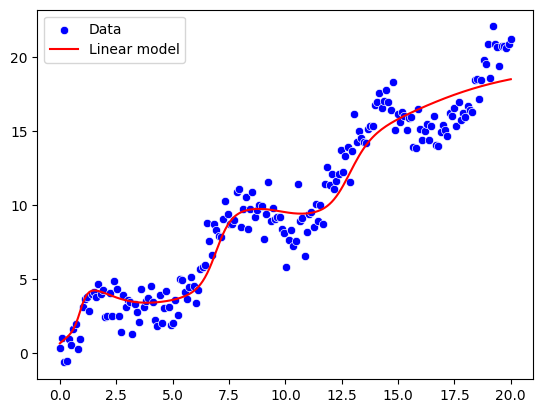

In [29]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
